In [124]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

pd.set_option("display.max_columns", None)

# Oil and Gas Production and Emissions Data on the Norwegian Continental Shelf

## Part 3: Data Processing

---

This notebook is part of a series of notebooks. The series consist of other following parts:

#### Part 1: [Data Collection](https://github.com/percw/Norwegian_oil_gas_decarbonization/blob/main/notebooks/01_data_building/01_production_and_emission_data_building.ipynb)

#### Part 2: [Data Cleaning](https://github.com/percw/Norwegian_oil_gas_decarbonization/blob/main/notebooks/02_data_cleaning/02_production_and_emission_data_cleaning.ipynb)

#### Part 4: [Data Modeling](https://github.com/percw/Norwegian_oil_gas_decarbonization/blob/main/notebooks/04_data_modeling/04_data_modelling.ipynb)

---


This notebook aims to process the cleaned data from the previous notebook. It's based on the main dataframe called `fields_prod_emissions_1997_2023.csv`. The data will be processed to create statistics and visualizations that will help to understand the emissions, production and carbon intensity of Norwegian Oil and Gas production better. The dataframe contains over 60 different columns. A description follows.


### Table of Contents

1. [Data Loading](#Data-Loading)
2. [Data Description](#Data-Descritpion)
3. [Conversion Rates](#Conversion-Rates)
4. [Data Processing](#Data-Processing)
5. [Manual Data Registration](#Manual-Data-Registration)
6. [Calculating CO2 Equivalent Emissions](#Calculating-CO2-Equivalent-Emissions)
7. [Emission Intensity](#Emission-Intensity)
8. [Data Analysis: Explorative Data Analysis](#Data-Analysis:-Explorative-Data-Analysis)


### Data Loading


In [4]:
# Importing the dataset from the csv file
url_path = (
    "https://raw.githubusercontent.com/percw/Norwegian_oil_gas_decarbonization/main/"
)
filename = (
    "/data/output/emissions_and_production/cleaned/fields_prod_emissions_1997_2023.csv"
)

# Creating a check if import is successful
try:
    fields_prod_emissions_1997_2023_df = pd.read_csv("".join([url_path, filename]))
    print("Data import successful")
except:
    print("Data import failed")

Data import successful


In [5]:
fields_prod_emissions_1997_2023_df.info()
fields_prod_emissions_1997_2023_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   field                                       1803 non-null   object 
 1   year                                        1803 non-null   int64  
 2   net_oil_prod_yearly_mill_sm3                1803 non-null   float64
 3   net_gas_prod_yearly_bill_sm3                1803 non-null   float64
 4   net_ngl_prod_yearly_mill_sm3                1803 non-null   float64
 5   net_condensate_prod_yearly_mill_sm3         1803 non-null   float64
 6   net_oil_eq_prod_yearly_mill_sm3             1803 non-null   float64
 7   produced_water_yearly_mill_sm3              1803 non-null   float64
 8   field_id                                    1803 non-null   int64  
 9   net_oil_prod_monthly_sm3_volatility         1803 non-null   float64
 10  net_gas_prod

field  year  net_oil_prod_yearly_mill_sm3  \
0  statfjord nord  1997                       3.93531   
1      veslefrikk  1997                       3.47468   
2            frøy  1997                       1.39602   
3             hod  1997                       0.46766   
4      albuskjell  1997                       0.04615   

   net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                       0.17288                       0.09230   
1                       0.13919                       0.08596   
2                       0.28878                       0.00000   
3                       0.09469                       0.02645   
4                       0.19171                       0.02005   

   net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                              0.00000                          4.20051   
1                              0.00000                          3.69981   
2                              0.01732                          1.70211   
3                              0.00000                          0.58879   
4                              0.00000                          0.25789   

   produced_water_yearly_mill_sm3  field_id  \
0                             0.0     43679   
1                             0.0     43618   
2                             0.0     43597   
3                             0.0     43485   
4                             0.0     43437   

   net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
0                             0.053898                             0.000405   
1                             0.052851                             0.008952   
2                             0.026260                             0.005287   
3                             0.003632                             0.001044   
4                             0.000487                             0.001819   

   net_ngl_prod_monthly_sm3_volatility  \
0                             0.000334   
1                             0.005461   
2                             0.000000   
3                             0.000238   
4                             0.000225   

   net_condensate_prod_monthly_sm3_volatility  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000942   
3                                    0.000000   
4                                    0.000000   

   net_oil_eq_prod_monthly_sm3_volatility  produced_water_in_field_volatility  \
0                                0.054005                                 0.0   
1                                0.053418                                 0.0   
2                                0.030860                                 0.0   
3                                0.004729                                 0.0   
4                                0.002297                                 0.0   

      status current_status  field_owner processing_field  field_in_emissions  \
0  Producing      Producing      21084.0        statfjord                True   
1  Producing      Shut down      21212.0       veslefrikk                True   
2  Producing      Shut down    3810636.0            frigg               False   
3  Producing      Producing      21052.0          valhall                True   
4  Producing      Shut down      20900.0       albuskjell               False   

   facilities_lifetime_mean  facilities_lifetime_std  \
0                      27.5                     15.0   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                      30.0                      0.0   
4                       NaN                      NaN   

   facilities_water_depth_mean  facilities_water_depth_std  \
0                       241.75                   65.030121   
1                          NaN                         NaN   
2                       

### Data Description


#### Field Information

| Field              | Description                     | Unit    | Note |
| ------------------ | ------------------------------- | ------- | ---- |
| field              | Name of the field               | string  | -    |
| year               | Year of data                    | numeric | -    |
| field_id           | Unique identifier for the field | numeric | -    |
| status             | Status of the field             | string  | -    |
| current_status     | Current status of the field     | string  | -    |
| field_owner        | Owner of the field              | string  | -    |
| processing_field   | Processing field                | string  | -    |
| field_in_emissions | Field emissions status          | boolean | -    |

#### Production Data

| Field                               | Description                          | Unit           | Note |
| ----------------------------------- | ------------------------------------ | -------------- | ---- |
| net_oil_prod_yearly_mill_sm3        | Net oil production yearly            | million $sm^3$ | -    |
| net_gas_prod_yearly_bill_sm3        | Net gas production yearly            | billion $sm^3$ | -    |
| net_ngl_prod_yearly_mill_sm3        | Net NGL production yearly            | million $sm^3$ | -    |
| net_condensate_prod_yearly_mill_sm3 | Net condensate production yearly     | million $sm^3$ | -    |
| net_oil_eq_prod_yearly_mill_sm3     | Net oil equivalent production yearly | million $sm^3$ | -    |
| produced_water_yearly_mill_sm3      | Produced water yearly                | million $sm^3$ | -    |

#### Production Volatility

| Field                                      | Description                                      | Unit   | Note |
| ------------------------------------------ | ------------------------------------------------ | ------ | ---- |
| net_oil_prod_monthly_sm3_volatility        | Net oil production monthly volatility            | $sm^3$ | -    |
| net_gas_prod_monthly_sm3_volatility        | Net gas production monthly volatility            | $sm^3$ | -    |
| net_ngl_prod_monthly_sm3_volatility        | Net NGL production monthly volatility            | $sm^3$ | -    |
| net_condensate_prod_monthly_sm3_volatility | Net condensate production monthly volatility     | $sm^3$ | -    |
| net_oil_eq_prod_monthly_sm3_volatility     | Net oil equivalent production monthly volatility | $sm^3$ | -    |
| produced_water_in_field_volatility         | Produced water in field volatility               | $sm^3$ | -    |

#### Facilities Information

| Field                       | Description                                  | Unit   | Note |
| --------------------------- | -------------------------------------------- | ------ | ---- |
| facilities_lifetime_mean    | Mean lifetime of facilities                  | years  | -    |
| facilities_lifetime_std     | Standard deviation of facilities lifetime    | years  | -    |
| facilities_water_depth_mean | Mean water depth of facilities               | meters | -    |
| facilities_water_depth_std  | Standard deviation of facilities water depth | meters | -    |

#### Facilities Status

| Field                        | Description                             | Unit    | Note |
| ---------------------------- | --------------------------------------- | ------- | ---- |
| subsea_facilites_shut_down   | Number of subsea facilities shut down   | numeric | -    |
| surface_facilites_shut_down  | Number of surface facilities shut down  | numeric | -    |
| subsea_facilites_in_service  | Number of subsea facilities in service  | numeric | -    |
| surface_facilites_in_service | Number of surface facilities in service | numeric | -    |

#### Facility Types

| Field                               | Description                          | Unit    | Note |
| ----------------------------------- | ------------------------------------ | ------- | ---- |
| facility_kind_multi well template   | Facility type: multi well template   | numeric | -    |
| facility_kind_single well template  | Facility type: single well template  | numeric | -    |
| facility_kind_offshore wind turbine | Facility type: offshore wind turbine | numeric | -    |
| facility_kind_subsea structure      | Facility type: subsea structure      | numeric | -    |
| facility_kind_fpso                  | Facility type: FPSO                  | numeric | -    |
| facility_kind_jacket 8 legs         | Facility type: jacket with 8 legs    | numeric | -    |
| facility_kind_condeep monoshaft     | Facility type: condeep monoshaft     | numeric | -    |
| facility_kind_loading system        | Facility type: loading system        | numeric | -    |
| facility_kind_jacket 4 legs         | Facility type: jacket with 4 legs    | numeric | -    |
| facility_kind_jacket tripod         | Facility type: jacket tripod         | numeric | -    |
| facility_kind_fsu                   | Facility type: FSU                   | numeric | -    |
| facility_kind_semisub steel         | Facility type: semisub steel         | numeric | -    |
| facility_kind_condeep 4 shafts      | Facility type: condeep with 4 shafts | numeric | -    |
| facility_kind_landfall              | Facility type: landfall              | numeric | -    |
| facility_kind_tlp concrete          | Facility type: TLP concrete          | numeric | -    |
| facility_kind_jack-up 3 legs        | Facility type: jack-up with 3 legs   | numeric | -    |
| facility_kind_jacket 6 legs         | Facility type: jacket with 6 legs    | numeric | -    |
| facility_kind_tlp steel             | Facility type: TLP steel             | numeric | -    |
| facility_kind_semisub concrete      | Facility type: semisub concrete      | numeric | -    |
| facility_kind_mopustor              | Facility type: mopustor              | numeric | -    |
| facility_kind_spar                  | Facility type: spar                  | numeric | -    |

#### Well Status

| Field                          | Description                              | Unit    | Note                     |
| ------------------------------ | ---------------------------------------- | ------- | ------------------------ |
| well_status_closed             | Well status: closed                      | numeric | total accumulated yearly |
| well_status_drilling           | Well status: drilling                    | numeric | total accumulated yearly |
| well_status_injecting          | Well status: injecting                   | numeric | total accumulated yearly |
| well_status_junked             | Well status: junked                      | numeric | total accumulated yearly |
| well_status_online/operational | Well status: online/operational          | numeric | total accumulated yearly |
| well_status_p&a                | Well status: P&A (plugged and abandoned) | numeric | total accumulated yearly |
| well_status_plugged            | Well status: plugged                     | numeric | total accumulated yearly |
| well_status_producing          | Well status: producing                   | numeric | total accumulated yearly |
| well_status_suspended          | Well status: suspended                   | numeric | total accumulated yearly |

#### Well Purpose

| Field                    | Description               | Unit    | Note |
| ------------------------ | ------------------------- | ------- | ---- |
| well_purpose_injection   | Well purpose: injection   | numeric | -    |
| well_purpose_observation | Well purpose: observation | numeric | -    |
| well_purpose_production  | Well purpose: production  | numeric | -    |

#### Well Information

| Field                          | Description                                         | Unit    | Note                         |
| ------------------------------ | --------------------------------------------------- | ------- | ---------------------------- |
| well_subsea_no                 | Well subsea: no                                     | boolean |                              |
| well_subsea_yes                | Well subsea: yes                                    | boolean |                              |
| well_final_vertical_depth_mean | Mean final vertical depth of wells                  | meters  | average for field            |
| well_final_vertical_depth_std  | Standard deviation of final vertical depth of wells | meters  | standard deviation for field |
| well_water_depth_mean          | Mean water depth of wells                           | meters  | average for field            |
| well_water_depth_std           | Standard deviation of water depth of wells          | meters  | standard deviation for field |

#### Financial and Environmental Data

| Field                            | Description                                       | Unit              | Note |
| -------------------------------- | ------------------------------------------------- | ----------------- | ---- |
| investments_mill_nok             | Investments                                       | million NOK       | -    |
| future_investments_mill_nok      | Future investments                                | million NOK       | -    |
| yearly_co2_emissions_1000_tonnes | Yearly CO2 emissions                              | 1000 tonnes       | -    |
| yearly_ch4_emissions_tons        | Yearly CH4 emissions                              | tons              | -    |
| yearly_nox_emissions_tons        | Yearly emissions                                  | tons              | -    |
| yearly_oil_spill_emissions_tons  | Yearly oil spill emissions                        | tons              | -    |
| yearly_water_emissions_m3        | Yearly water emissions                            | cubic meters (m3) | -    |
| org_number                       | Organization number                               | numeric           | -    |
| operator                         | Operator of the field                             | string            | -    |
| ownership_original               | Ownership structure, as reported                  | object            | -    |
| ownership_new_name               | Ownership structure, cleaned (mostly due to M&As) | object            | -    |

#### Remaining Recoverable Reserves

| Field                             | Description                   | Unit           | Note |
| --------------------------------- | ----------------------------- | -------------- | ---- |
| current_remaining_recoverable_oil | As of 2023                    | million $sm^3$ | -    |
| current_remaining_recoverable_gas | As of 2023                    | billion $sm^3$ | -    |
| current_remaining_recoverable_ngl | As of 2023                    | million $sm^3$ | -    |
| current_remaining_recoverable_oe  | As of 2023                    | million $sm^3$ | -    |
| original_recoverable_oil          | Original total reserve volume | million $sm^3$ | -    |
| original_recoverable_gas          | Original total reserve volume | billion $sm^3$ | -    |
| original_recoverable_ngl          | Original total reserve volume | million $sm^3$ | -    |
| original_recoverable_oe           | Original total reserve volume | million $sm^3$ | -    |


### Conversion Rates

#### NGL, Oil, Gas, and Condensate to Oil Equivalent


To accurately compare and aggregate different types of petroleum products such as Natural Gas Liquids (NGL), crude oil, natural gas, and condensate, we use a common unit of measurement called the oil equivalent (o.e.). We'll explain the conversion rates typically used to convert these substances into oil equivalents, based on sources from the Norwegian Petroleum Directorate and the International Energy Agency (IEA).

#### Conversion Factors

According to the Norwegian Petroleum Directorate, the following conversion factors are used:

1. **Crude Oil:**
   $
   1 \text{ Sm}^3 \text{ oil} = 1 \text{ Sm}^3 \text{ o.e.}
   $

2. **Condensate:**
   $
   1 \text{ Sm}^3 \text{ condensate} = 1 \text{ Sm}^3 \text{ o.e.}
   $

3. **Natural Gas:**
   $
   1000 \text{ Sm}^3 \text{ gas} = 1 \text{ Sm}^3 \text{ o.e.}
   $

4. **NGL:**
   $
   1 \text{ Sm}^3 \text{ NGL} = 1 \text{ Sm}^3 \text{ o.e.}
   $
   $
   1 \text{ tonne NGL} = 1.9 \text{ Sm}^3 \text{ o.e.}
   $

#### Additional Conversions

For other conversions between units typically used in the energy sector, the IEA provides these factors:

- **Standard Cubic Meters (Sm³) to Barrels:**
  $
  1 \text{ Sm}^3 = 6.2898 \text{ barrels} (\text{bbl})
  $
  $
  1 \text{ bbl} = 0.1590 \text{ Sm}^3
  $

- **Energy Content:**
  $
  1 \text{ Sm}^3 \text{ natural gas} \approx 40 \text{ MJ}
  $
  $
  1 \text{ Sm}^3 \text{ crude oil} \approx 36,000 \text{ MJ}
  $

#### Practical Application

Using these conversion factors, we can convert the quantities of NGL, oil, gas, and condensate into a single unit of measurement, facilitating easier comparison and aggregation for analysis and reporting purposes.

$
\text{Oil Equivalent} (\text{Sm}^3 \text{ o.e.}) = \begin{cases} 
\text{Volume of Oil} (\text{Sm}^3) \\
\text{Volume of Condensate} (\text{Sm}^3) \\
\frac{\text{Volume of Gas} (\text{Sm}^3)}{1000} \\
\text{Volume of NGL} (\text{Sm}^3) \\
1.9 \times \text{Mass of NGL (tonnes)}
\end{cases}
$

#### Other Useful Conversions

$1Sm_3 	 ≈ 	40 MJ = 11.111 kWh$

$1Sm_3 	 ≈ 	37913 \text{ BTU (British Thermal Units)}$

$1Sm_3 	 ≈ 	6.2898 \text{ bbl (barrels)}$

$1Sm_3 	 ≈ 	0.84 \text{ toe (tonne of oil eq)}$

#### Further Reading

For more detailed information, you can visit the sources:

- [Norwegian Petroleum Directorate](https://www.norskpetroleum.no/en/calculator/about-energy-calculator/)
- [IEA Unit Converter](https://www.iea.org/data-and-statistics/data-tools/unit-converter)


### Data Processing


For some fields, we need to estimate the emissions based on production. This is due to the fact that some facilites transport their production directly and hence do not have emissions.


In [6]:
# Fields where emissions in NaN

field_without_emissions = fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["field_in_emissions"] == False
].field.unique()

# Checking which of the fields without emissions have processing_field set

fields_without_emissions_and_processing_field = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["field_in_emissions"] == False)
    & (fields_prod_emissions_1997_2023_df["processing_field"].isna())
].field.unique()
fields_without_emissions_and_processing_field

array(['cod', 'edda', 'murchison'], dtype=object)

In [7]:
# Removing cod, edda and murchison from the the dataframe

fields_prod_emissions_1997_2023_df = fields_prod_emissions_1997_2023_df[
    ~fields_prod_emissions_1997_2023_df["field"].isin(["cod", "edda", "murchison"])
]

In [8]:
# Checking which fields are their own processing field and is not in the emission data

fields_own_processing_field = fields_prod_emissions_1997_2023_df[
    (
        fields_prod_emissions_1997_2023_df["field"]
        == fields_prod_emissions_1997_2023_df["processing_field"]
    )
    & (fields_prod_emissions_1997_2023_df["field_in_emissions"] == False)
]

fields_own_processing_field

field  year  net_oil_prod_yearly_mill_sm3  \
4    albuskjell  1997                       0.04615   
18        frigg  1997                       0.00000   
53   albuskjell  1998                       0.02955   
73        frigg  1998                       0.00000   
115       frigg  1999                       0.00000   
144       frigg  2000                       0.00000   
199       frigg  2001                       0.00000   
208       frigg  2002                       0.00000   
263       frigg  2003                       0.00000   
337       frigg  2004                       0.00000   

     net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
4                         0.19171                       0.02005   
18                        0.47991                       0.00000   
53                        0.10564                       0.01160   
73                        0.60081                       0.00000   
115                       0.33227                       0.00000   
144                       0.60258                       0.00000   
199                       0.73724                       0.00000   
208                       0.71699                       0.00000   
263                       0.70768                       0.00000   
337                       0.86317                       0.00000   

     net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
4                                0.00000                          0.25789   
18                               0.00023                          0.48016   
53                               0.00000                          0.14678   
73                               0.00059                          0.60143   
115                              0.00030                          0.33257   
144                              0.00051                          0.60310   
199                              0.00232                          0.73957   
208                              0.00130                          0.71831   
263                              0.00116                          0.70882   
337                              0.00118                          0.86433   

     produced_water_yearly_mill_sm3  field_id  \
4                           0.00000     43437   
18                          0.00000     43555   
53                          0.00000     43437   
73                          0.00000     43555   
115                         0.00000     43555   
144                         0.00545     43555   
199                         0.00508     43555   
208                         0.00377     43555   
263                         0.00178     43555   
337                         0.04884     43555   

     net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
4                               0.000487                             0.001819   
18                              0.000000                             0.026888   
53                              0.000205                             0.000837   
73                              0.000000                             0.026859   
115                             0.000000                             0.023888   
144                             0.000000                             0.017307   
199                             0.000000                             0.016395   
208                             0.000000                             0.010989   
263                             0.000000                             0.007793   
337                             0.000000                             0.040042   

     net_ngl_prod_monthly_sm3_volatility  \
4                               0.000225   
18                              0.000000   
53                              0.000161   
73                              0.000000   
115                             0.000000   
144                             0.000000   
199                             0.000000   
208                             0.

In [9]:
# Removing frigg and albuskjell from the main df

fields_prod_emissions_1997_2023_df = fields_prod_emissions_1997_2023_df[
    ~fields_prod_emissions_1997_2023_df["field"].isin(["frigg", "albuskjell"])
]

### Electrification


#### Manual Data Registration


Adding electrification data to the dataframe.

Fields directly connected to shore grid:

- Troll A: Electrified in 1996, 195-218 MW.
- Johan Sverdrup: Electrified in 2019, 100-300 MW. Includes other fields at “utsirahøyden”:
  - Edvard Grieg electrified in 2022
    - Solveig electrified in 2022
    - Ivar Aasen electrified in 2022
  - Gina Krog electrified in 2022
  - Sleipner Øst
- Nyhamna /Ormen Lange (ocean floor field)/: Electrified in 2007, 300 MW
- Gjøa: Electrified in 2010, 65 MW. Gjøa is host power facility for:
  - Vega electrified in 2010
  - Duva electrified in 2021
  - Nova electrified in 2022
- Martin Linge: Electrified in 2018, 55 MW
- Goliat: Electrified in 2016, 70 MW
- Valhall, electrified in 2010, 78 MW. Valhall is host power facility for:
  - Hod electrified in 2012
- Gullfaks: Partly electrified in 2023 with power from Haywind Tampen
- Snorre: Partly electrified in 2023 with power from Haywind Tampen

Further data can be found on [Offshore Norge's](https://www.offshorenorge.no/rapporter/klima-og-miljo/feltspesifikke-utslipp-2023/) website.


In [10]:
fields_electricity_data = [
    {
        "field": "troll",
        "year_electrified": 1996,
        "power_capacity_MW": 200,
        "imported_power_2023_gwh/y": 1282,
    },
    {
        "field": "gullfaks",
        "year_electrified": 2023,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 108,
    },
    {
        "field": "snorre",
        "year_electrified": 2023,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 75,
    },
    {
        "field": "johan sverdrup",
        "year_electrified": 2019,
        "power_capacity_MW": 200,
        "imported_power_2023_gwh/y": 632,
    },
    {
        "field": "edvard grieg",
        "year_electrified": 2022,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 328,
    },
    {
        "field": "solveig",
        "year_electrified": 2022,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "ivar aasen",
        "year_electrified": 2007,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 146,
    },
    {
        "field": "gina krog",
        "year_electrified": 2022,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 1.97,
    },
    {
        "field": "sleipner øst",
        "year_electrified": 2007,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 0,
    },
    {
        "field": "ormen lange",
        "year_electrified": 2007,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "vega",
        "year_electrified": 2010,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "duva",
        "year_electrified": 2021,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "nova",
        "year_electrified": 2022,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "gjøa",
        "year_electrified": 2010,
        "power_capacity_MW": 65,
        "imported_power_2023_gwh/y": 357,
    },
    {
        "field": "martin linge",
        "year_electrified": 2018,
        "power_capacity_MW": 55,
        "imported_power_2023_gwh/y": 224,
    },
    {
        "field": "goliat",
        "year_electrified": 2016,
        "power_capacity_MW": 70,
        "imported_power_2023_gwh/y": 414,
    },
    {
        "field": "valhall",
        "year_electrified": 2010,
        "power_capacity_MW": 78,
        "imported_power_2023_gwh/y": 388,
    },
    {
        "field": "hod",
        "year_electrified": 2010,
        "power_capacity_MW": 78,
        "imported_power_2023_gwh/y": None,
    },
]

# Valhall and Hod are the same field, but the electricity data is split between the two fields

#### Remark on Electrification Data

For statistical tests i propose using the following fields for checking the effect of electrification on emissions:

- Troll
- Gullfaks
- Snorre
- Johan Sverdrup
- Edvard Grieg
- Ivar Aasen
- Gina Krog
- Gjøa
- Martin Linge
- Goliat
- Valhall

We can assume that the power delivered is 100% renewable as Norways electricity mix consists of 98% hydro power.


In [11]:
# Adding electrification data to the fields_prod_emissions_1997_2023_df

# Add new columns with default values
fields_prod_emissions_1997_2023_df["electrified"] = 0
fields_prod_emissions_1997_2023_df["years_electrified"] = 0
fields_prod_emissions_1997_2023_df["electricity_mw"] = 0
fields_prod_emissions_1997_2023_df["imported_power_2023_gwh/y"] = 0

# Loop through fields_electricity_data and update the DataFrame
for field_data in fields_electricity_data:
    field_name = field_data["field"].lower()
    year_electrified = field_data["year_electrified"]
    power_capacity_MW = field_data["power_capacity_MW"]
    imported_power = field_data["imported_power_2023_gwh/y"]

    # Calculate the number of years electrified
    years_electrified = 2023 - year_electrified if year_electrified else 0

    # Update the DataFrame
    # Setting the electrified to 1 for the field from when it was electrified, not for all the years
    fields_prod_emissions_1997_2023_df.loc[
        (fields_prod_emissions_1997_2023_df["field"] == field_name)
        & (fields_prod_emissions_1997_2023_df["year"] >= year_electrified),
        "electrified",
    ] = 1

    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field_name, "years_electrified"
    ] = years_electrified

    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field_name, "electricity_mw"
    ] = power_capacity_MW if power_capacity_MW else 0

    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field_name,
        "imported_power_2023_gwh/y",
    ] = imported_power if imported_power else 0

    # Setting the year_electrified to a new column
    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field_name, "year_electrified"
    ] = year_electrified

# Display the updated DataFrame
fields_prod_emissions_1997_2023_df

field  year  net_oil_prod_yearly_mill_sm3  \
0     statfjord nord  1997                       3.93531   
1         veslefrikk  1997                       3.47468   
2               frøy  1997                       1.39602   
3                hod  1997                       0.46766   
5                yme  1997                       1.97977   
...              ...   ...                           ...   
1798      visund sør  2023                       0.05782   
1799           skuld  2023                       0.02175   
1800         byrding  2023                       0.01183   
1801            hyme  2023                       0.30909   
1802       statfjord  2023                       0.72349   

      net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                          0.17288                       0.09230   
1                          0.13919                       0.08596   
2                          0.28878                       0.00000   
3                          0.09469                       0.02645   
5                          0.00000                       0.00000   
...                            ...                           ...   
1798                       0.11078                       0.02729   
1799                       0.00000                       0.00000   
1800                       0.00000                       0.00000   
1801                       0.05169                       0.03130   
1802                       0.65238                       0.25352   

      net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                                 0.00000                          4.20051   
1                                 0.00000                          3.69981   
2                                 0.01732                          1.70211   
3                                 0.00000                          0.58879   
5                                 0.00000                          1.97977   
...                                   ...                              ...   
1798                              0.00000                          0.19589   
1799                              0.00000                          0.02175   
1800                              0.00000                          0.01183   
1801                              0.00000                          0.39208   
1802                              0.00000                          1.62934   

      produced_water_yearly_mill_sm3  field_id  \
0                            0.00000     43679   
1                            0.00000     43618   
2                            0.00000     43597   
3                            0.00000     43485   
5                            0.00000     43807   
...                              ...       ...   
1798                         0.00596  20461008   
1799                         0.10527  21350124   
1800                         0.00000  28975067   
1801                         0.29335  20474183   
1802                        12.13402     43658   

      net_oil_prod_monthly_sm3_volatility  \
0                                0.053898   
1                                0.052851   
2                                0.026260   
3                                0.003632   
5                                0.056455   
...                                   ...   
1798                             0.008405   
1799                             0.002882   
1800                             0.000421   
1801                             0.018244   
1802                             0.015100   

      net_gas_prod_monthly_sm3_volatility  \
0                                0.000405   
1                                0.008952   
2                                0.005287   
3                                0.001044   
5                                0.000000   
...                                   ...   
1798                             0.019391   
1799                             0.000

In [12]:
display(fields_prod_emissions_1997_2023_df.electrified.unique())
display(fields_prod_emissions_1997_2023_df["imported_power_2023_gwh/y"].unique())
display(fields_prod_emissions_1997_2023_df.years_electrified.unique())

array([0, 1])

array([   0.  ,  388.  , 1282.  ,  108.  ,   75.  ,  357.  ,  328.  ,
        146.  ,  414.  ,    1.97,  632.  ,  224.  ])

array([ 0, 13, 27, 16,  1,  7,  4,  5,  2])

In [13]:
# Electrified fields to plot

electrified_fields_to_plot_df = fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["electrified"] == 1
]

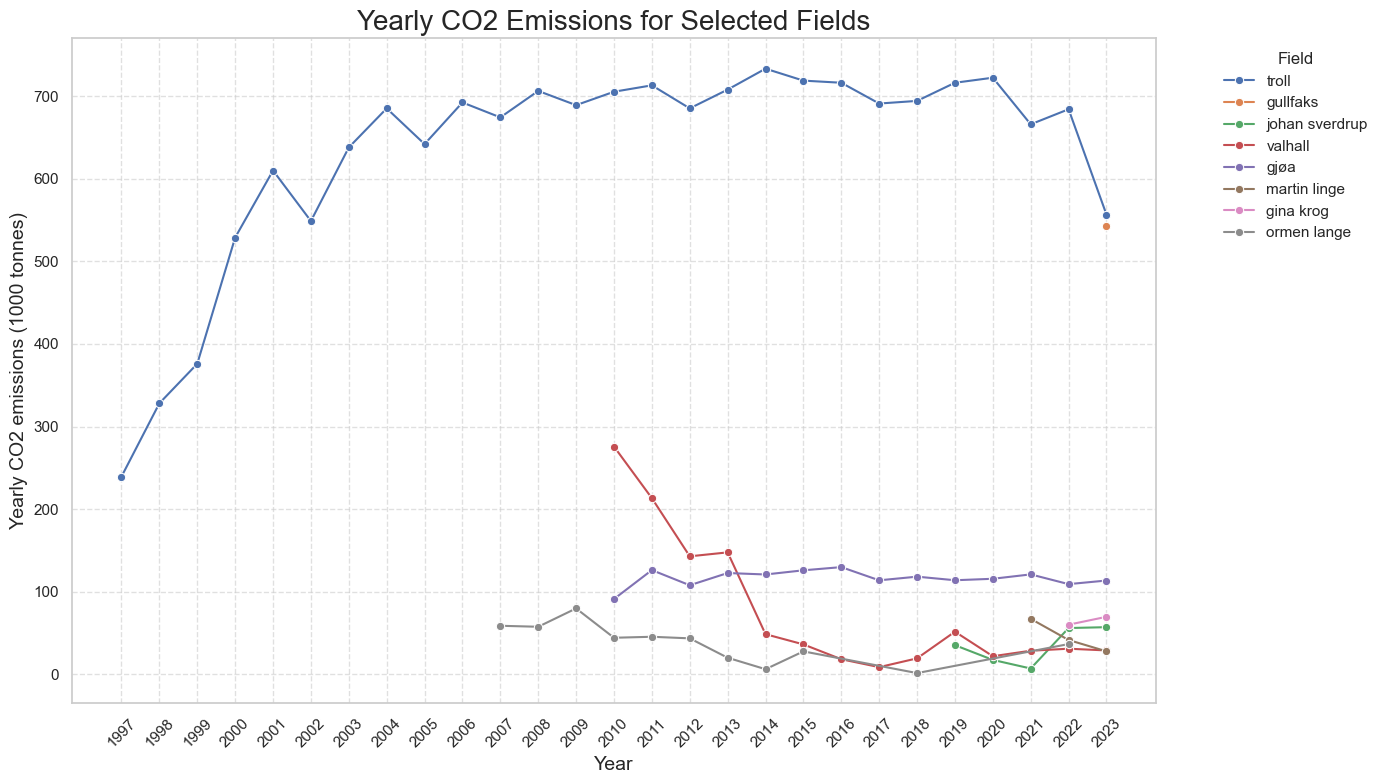

In [14]:
# Set up the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

fields_to_plot = [
    "troll",
    "gullfaks",
    "johan sverdrup",
    "snorre" "goliat",
    "valhall",
    "gjøa",
    "martin linge",
    "gina krog",
    "ormen lange",
]

# Plot each field's data
for field in fields_to_plot:
    field_data = electrified_fields_to_plot_df[
        electrified_fields_to_plot_df["field"] == field
    ]
    sns.lineplot(
        data=field_data,
        x="year",
        y="yearly_co2_emissions_1000_tonnes",
        label=field,
        marker="o",
    )


# Customize the plot
plt.title("Yearly CO2 Emissions for Selected Fields", fontsize=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Yearly CO2 emissions (1000 tonnes)", fontsize=14)
plt.xticks(rotation=45)
plt.xticks(np.arange(1997, 2024, 1))
plt.legend(title="Field", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Check the field_id of troll

fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["field"] == "troll"
].field_id.unique()

array([46437])

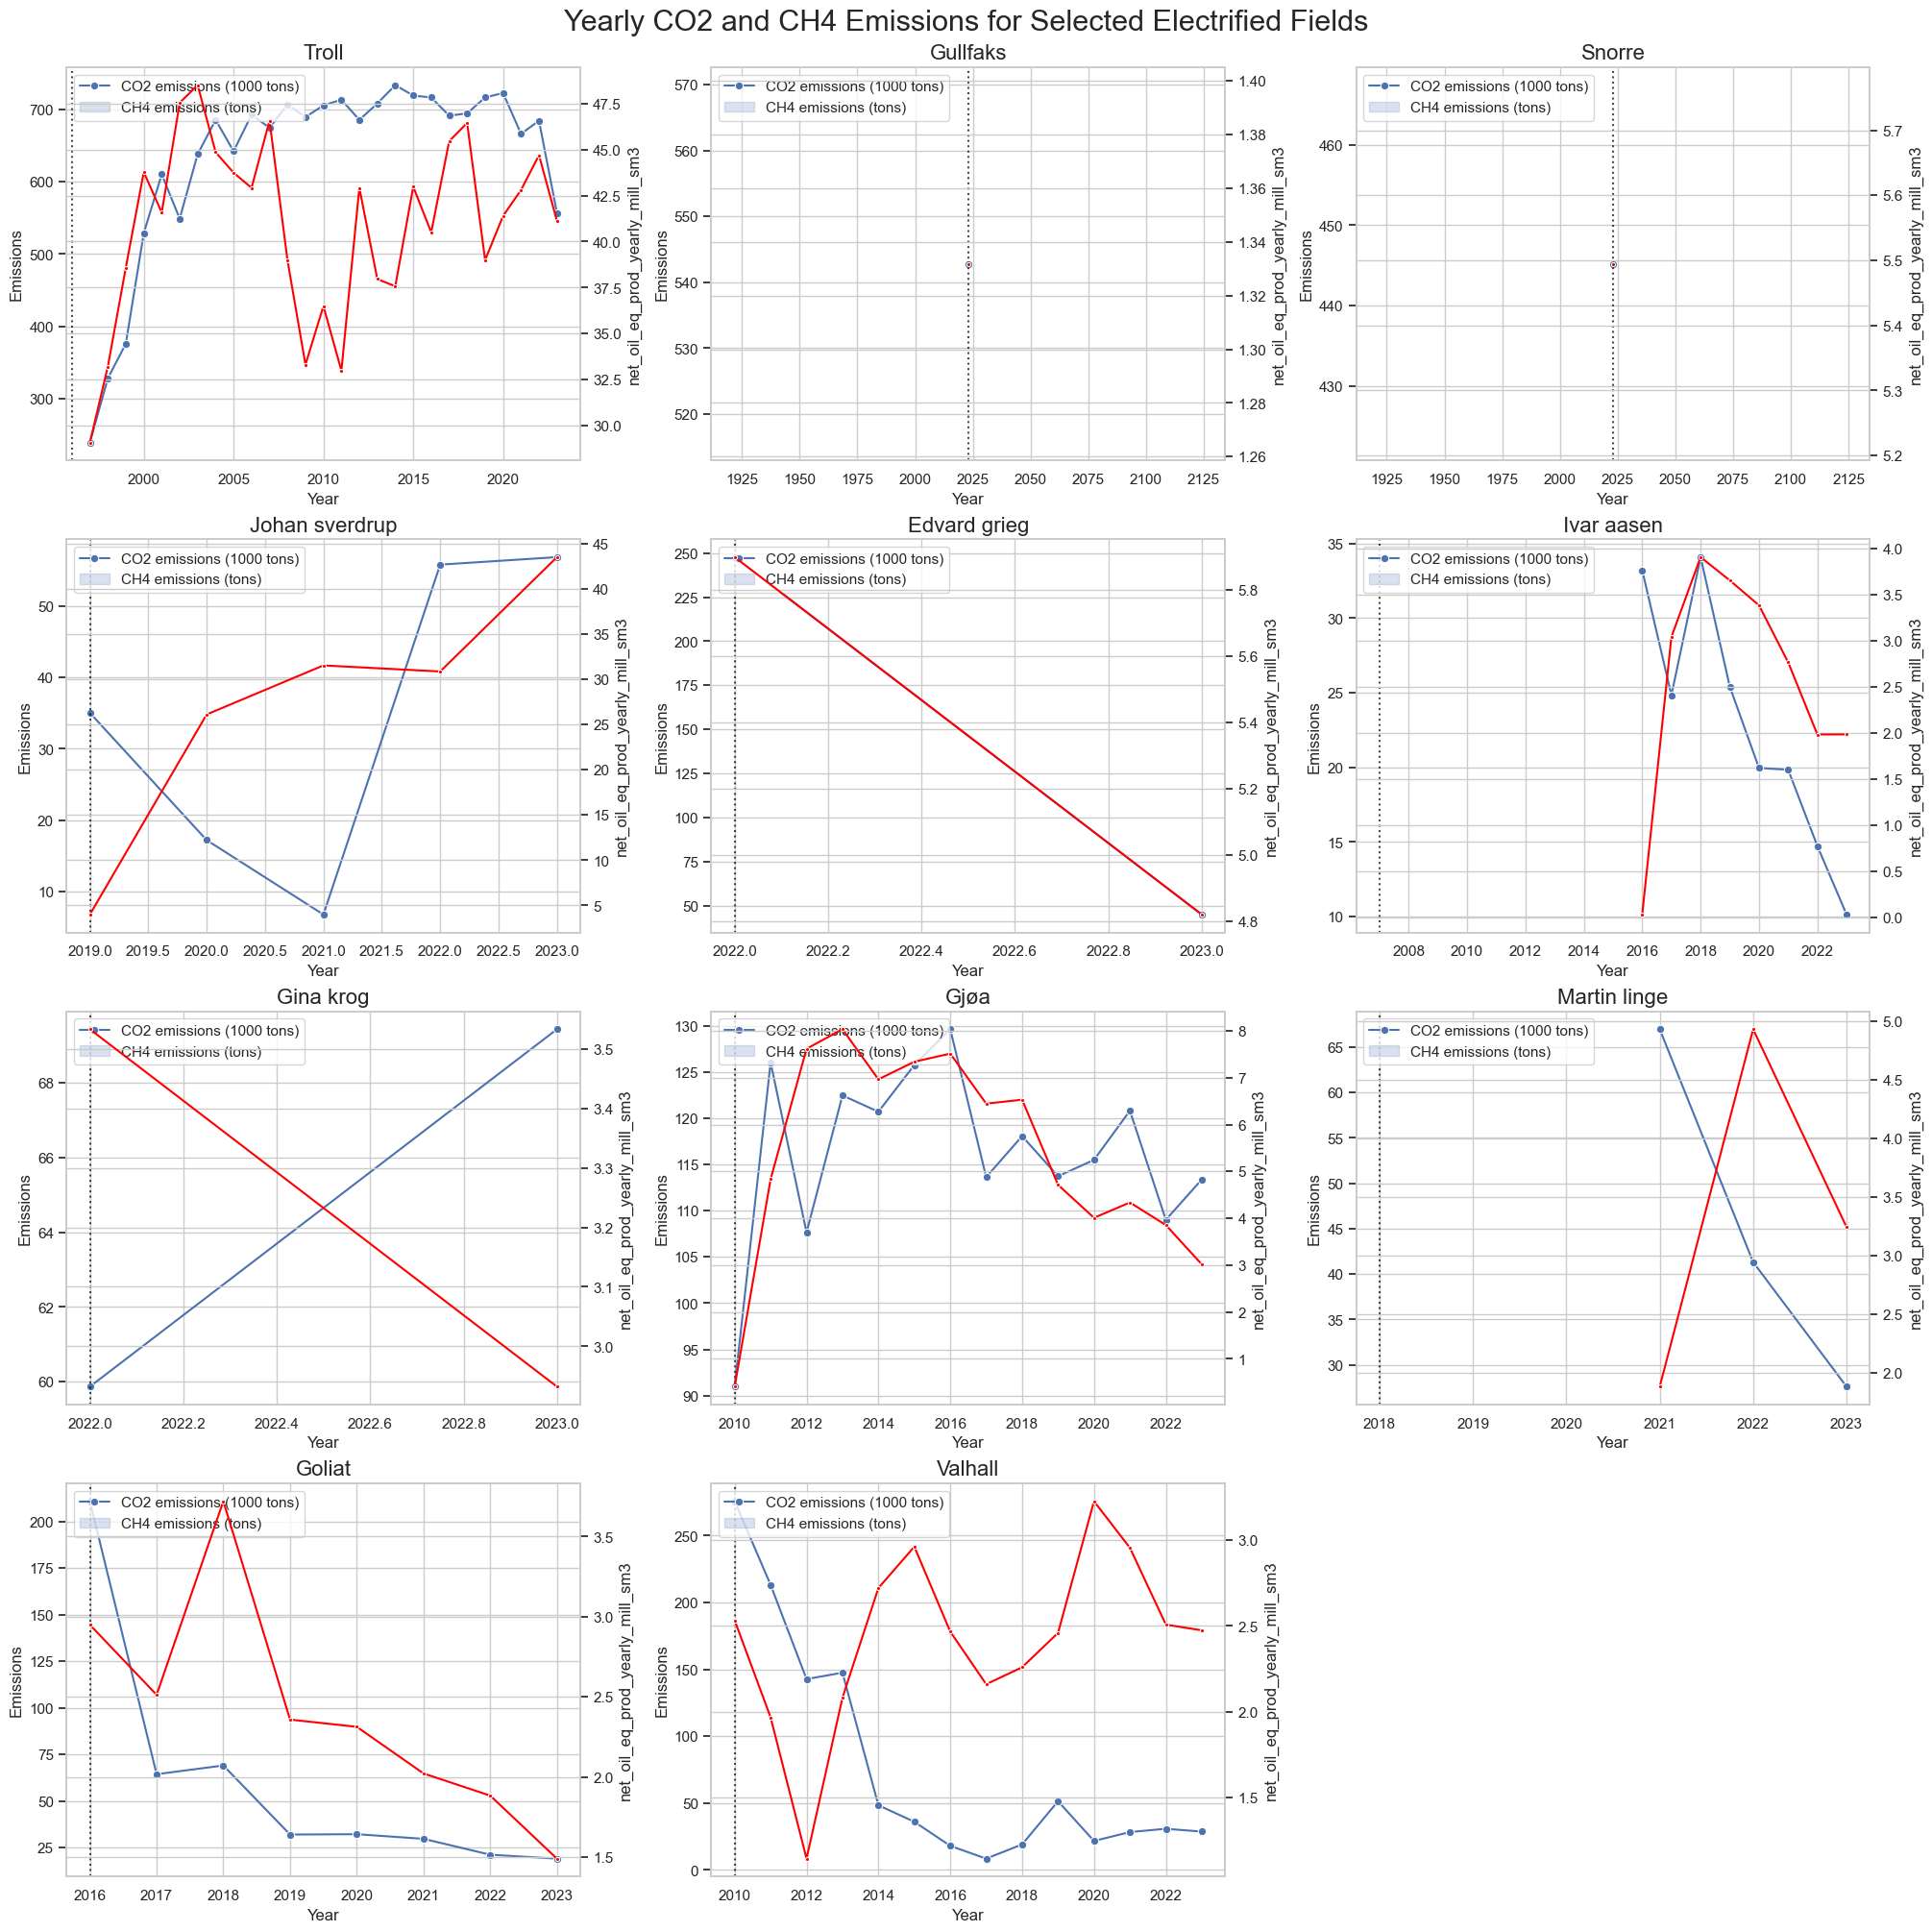

In [16]:
# Fields to plot
fields_to_plot = [
    "troll",
    "gullfaks",
    "snorre",
    "johan sverdrup",
    "edvard grieg",
    "ivar aasen",
    "gina krog",
    "gjøa",
    "martin linge",
    "goliat",
    "valhall",
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20), constrained_layout=True)
axes = axes.flatten()

# Plot each field's data in its own subplot
for i, field in enumerate(fields_to_plot):
    ax = axes[i]
    field_data = electrified_fields_to_plot_df[
        electrified_fields_to_plot_df["field"] == field
    ]
    sns.lineplot(
        data=field_data,
        x="year",
        y="yearly_co2_emissions_1000_tonnes",
        ax=ax,
        marker="o",
    )

    # sns.lineplot(
    #    data=field_data,
    #    x="year",
    #    y="yearly_ch4_emissions_tons",
    #    ax=ax,
    #    marker=".",
    #    # color = navy blue
    #    color="#001f3f",
    # )

    # plot production data as a secondary y-axis
    ax2 = ax.twinx()
    sns.lineplot(
        data=field_data,
        x="year",
        y="net_oil_eq_prod_yearly_mill_sm3",
        ax=ax2,
        marker=".",
        color="red",
    )

    field_title = field.capitalize()
    ax.set_title(f"{field_title}", fontsize=16)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Emissions", fontsize=12)
    ax.grid(True)

    # Adding a legend
    ax.legend(["CO2 emissions (1000 tons)", "CH4 emissions (tons)"], loc="upper left")

    # Add a vertical line for the electrification year
    for field_data in fields_electricity_data:
        if field_data["field"] == field:
            year_electrified = field_data["year_electrified"]
            ax.axvline(x=year_electrified, color="black", linestyle=":", alpha=0.7)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title
plt.suptitle(
    "Yearly CO2 and CH4 Emissions for Selected Electrified Fields", fontsize=22
)
plt.show()

In [17]:
# Calculating average emission intensity for electrified fields

# Filter the DataFrame for electrified fields
electrified_fields_df = fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["electrified"] == 1
]

# Calculate the average emission intensity for each field
electrified_fields_int = (
    electrified_fields_df["yearly_co2_emissions_1000_tonnes"].sum()
    / electrified_fields_df["net_oil_eq_prod_yearly_mill_sm3"].sum()
)

print(electrified_fields_int)

# Calculating average emission intensity for non-electrified fields

# Filter the DataFrame for non-electrified fields
non_electrified_fields_df = fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["electrified"] == 0
]

# Calculate the average emission intensity for each field
non_electrified_fields_int = (
    non_electrified_fields_df["yearly_co2_emissions_1000_tonnes"].sum()
    / non_electrified_fields_df["net_oil_eq_prod_yearly_mill_sm3"].sum()
)

print(non_electrified_fields_int)

17.192950875194896
54.29107484611378


In [18]:
fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["electrified"] == 1
]

field  year  net_oil_prod_yearly_mill_sm3  \
24             troll  1997                      14.76705   
59             troll  1998                      13.25389   
114            troll  1999                      12.90877   
130            troll  2000                      18.36151   
196            troll  2001                      19.50288   
...              ...   ...                           ...   
1775    sleipner øst  2023                       0.01610   
1779  johan sverdrup  2023                      41.28919   
1780    edvard grieg  2023                       4.14002   
1785            vega  2023                       0.38256   
1791         valhall  2023                       2.00528   

      net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
24                        14.31718                       0.00000   
59                        19.95431                       0.00000   
114                       25.46137                       0.00000   
130                       24.66589                       0.00000   
196                       21.43322                       0.00000   
...                            ...                           ...   
1775                       0.08822                       0.00528   
1779                       1.38139                       0.82222   
1780                       0.42522                       0.25418   
1785                       1.62195                       0.44182   
1791                       0.34347                       0.12560   

      net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
24                                0.00000                         29.08419   
59                                0.00000                         33.20822   
114                               0.21754                         38.58770   
130                               0.75031                         43.77769   
196                               0.63947                         41.57560   
...                                   ...                              ...   
1775                              0.00000                          0.10958   
1779                              0.00000                         43.49277   
1780                              0.00000                          4.81942   
1785                              0.00000                          2.44633   
1791                              0.00000                          2.47432   

      produced_water_yearly_mill_sm3  field_id  \
24                           0.00000     46437   
59                           0.00000     46437   
114                          0.00000     46437   
130                         15.81369     46437   
196                         18.49151     46437   
...                              ...       ...   
1775                         0.01414     43478   
1779                         3.46195  26376286   
1780                         3.04165  21675433   
1785                         0.02702   4467595   
1791                         0.66691     43548   

      net_oil_prod_monthly_sm3_volatility  \
24                               0.113838   
59                               0.062934   
114                              0.104175   
130                              0.085937   
196                              0.175973   
...                                   ...   
1775                             0.000484   
1779                             0.268379   
1780                             0.048319   
1785                             0.008115   
1791                             0.031634   

      net_gas_prod_monthly_sm3_volatility  \
24                               0.497360   
59                               0.582215   
114                              0.434179   
130                              0.554190   
196                              0.496897   
...                                   ...   
1775                             0.001789   
1779                             0.020

In [19]:
# Calculating the average emission intensity for electrified fields only during the years they are electrified, and make sure that the year is greater than 2023-years_electrified

# Filter the DataFrame for electrified fields
electrified_intra_fields_df = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["electrified"] == 1)
]

electrified_intra_fields_df.head(10)

field  year  net_oil_prod_yearly_mill_sm3  net_gas_prod_yearly_bill_sm3  \
24   troll  1997                      14.76705                      14.31718   
59   troll  1998                      13.25389                      19.95431   
114  troll  1999                      12.90877                      25.46137   
130  troll  2000                      18.36151                      24.66589   
196  troll  2001                      19.50288                      21.43322   
216  troll  2002                      21.19424                      25.58142   
286  troll  2003                      20.82079                      26.16905   
307  troll  2004                      17.76382                      26.36164   
359  troll  2005                      14.09268                      28.33958   
402  troll  2006                      10.81995                      30.70055   

     net_ngl_prod_yearly_mill_sm3  net_condensate_prod_yearly_mill_sm3  \
24                        0.00000                              0.00000   
59                        0.00000                              0.00000   
114                       0.00000                              0.21754   
130                       0.00000                              0.75031   
196                       0.00000                              0.63947   
216                       0.00000                              0.76771   
286                       0.00000                              1.51227   
307                       0.28164                              0.44972   
359                       1.30975                              0.00000   
402                       1.40021                              0.00000   

     net_oil_eq_prod_yearly_mill_sm3  produced_water_yearly_mill_sm3  \
24                          29.08419                         0.00000   
59                          33.20822                         0.00000   
114                         38.58770                         0.00000   
130                         43.77769                        15.81369   
196                         41.57560                        18.49151   
216                         47.54338                        18.91939   
286                         48.50212                        21.91749   
307                         44.85681                        23.63560   
359                         43.74200                        22.59443   
402                         42.92068                        21.25846   

     field_id  net_oil_prod_monthly_sm3_volatility  \
24      46437                             0.113838   
59      46437                             0.062934   
114     46437                             0.104175   
130     46437                             0.085937   
196     46437                             0.175973   
216     46437                             0.201756   
286     46437                             0.351269   
307     46437                             0.102662   
359     46437                             0.121033   
402     46437                             0.099496   

     net_gas_prod_monthly_sm3_volatility  net_ngl_prod_monthly_sm3_volatility  \
24                              0.497360                             0.000000   
59                              0.582215                             0.000000   
114                             0.434179                             0.000000   
130                             0.554190                             0.000000   
196                             0.496897                             0.000000   
216                             0.511553                             0.000000   
286                             0.718465                             0.000000   
307                             0.697135                             0.043945   
359                             0.554644                             0.024682   
402                             0.441607                             0.017361   

     net_condensate_prod_mont

In [20]:
# Calculate the average emission intensity for electrified_intra_fields_df

electrified_intra_fields_int = (
    electrified_intra_fields_df["yearly_co2_emissions_1000_tonnes"].sum()
    / electrified_intra_fields_df["net_oil_eq_prod_yearly_mill_sm3"].sum()
)

print(
    f"The average emission intensity for the elctrified fields during electrified years are: {electrified_intra_fields_int.round(2)}kgCO2/Sm3oe"
)

# printing the toe eq
print(
    f"The average emission intensity for the elctrified fields during electrified years are: {(electrified_intra_fields_int/0.84).round(2)}kgCO2/toe"
)

# in boe
print(
    f"The average emission intensity for the elctrified fields during electrified years are: {(electrified_intra_fields_int/6.2898).round(2)}kgCO2/boe"
)

The average emission intensity for the elctrified fields during electrified years are: 17.19kgCO2/Sm3oe
The average emission intensity for the elctrified fields during electrified years are: 20.47kgCO2/toe
The average emission intensity for the elctrified fields during electrified years are: 2.73kgCO2/boe


In [21]:
# Calculating the average emission intensity for non-electrified

# Filter the DataFrame for non-electrified fields
non_electrified_intra_fields_df = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["electrified"] == 0)
]

# Calculate the average emission intensity for non-electrified_intra_fields_df
non_electrified_intra_fields_int = (
    non_electrified_intra_fields_df["yearly_co2_emissions_1000_tonnes"].sum()
    / non_electrified_intra_fields_df["net_oil_eq_prod_yearly_mill_sm3"].sum()
)

print(
    f"The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: {non_electrified_intra_fields_int.round(2)}kgCO2/Sm3oe"
)

# toe
print(
    f"The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: {(non_electrified_intra_fields_int/0.84).round(2)}kgCO2/toe"
)

# boe
print(
    f"The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: {(non_electrified_intra_fields_int/6.2898).round(2)}kgCO2/boe"
)

# Calc the % diff in emission intensity between electrified and non-electrified fields

diff_in_int = (
    (electrified_intra_fields_int - non_electrified_intra_fields_int)
    / non_electrified_intra_fields_int
    * 100
)

print(
    f"\nThe electrified fields have an average emission intensity that is {diff_in_int.round(2)}% lower than the non-electrified fields."
)

The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: 54.29kgCO2/Sm3oe
The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: 64.63kgCO2/toe
The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: 8.63kgCO2/boe

The electrified fields have an average emission intensity that is -68.33% lower than the non-electrified fields.


##### Emission Intensities based on reported emissions

The norwegian directorate on petroleum are reporting the emissions where they happen. This is called the "point source" emissions. We will now use those reported emissions to calculate the emission intensity for each field. The emission intensity is calculated as the emissions per unit of production. The unit of production is the oil equivalent (o.e.). The emissions are reported in tonnes of CO2 equivalent.


In [22]:
#
# Electrified fields
#
emissions_from_electrified_fields = electrified_intra_fields_df.groupby(["year"])[
    "yearly_co2_emissions_1000_tonnes"
].sum()

production_from_electrified_fields = electrified_intra_fields_df.groupby(["year"])[
    "net_oil_eq_prod_yearly_mill_sm3"
].sum()

#
# Non-electrified fields
#
emissions_from_non_electrified_fields = non_electrified_intra_fields_df.groupby(
    ["year"]
)["yearly_co2_emissions_1000_tonnes"].sum()

production_from_non_electrified_fields = non_electrified_intra_fields_df.groupby(
    ["year"]
)["net_oil_eq_prod_yearly_mill_sm3"].sum()

In [23]:
# Electrified intensity to get /toe
electrified_intensity = (
    emissions_from_electrified_fields / production_from_electrified_fields
) / 0.84


# Non-electrified intensity to get /toe
non_electrified_intensity = (
    emissions_from_non_electrified_fields / production_from_non_electrified_fields
) / 0.84

In [46]:
text_color = "#EBEBEB"
background_color = "#002244"
# Plot line colors
line_1_color = "#F68B1E"  # Orange
line_2_color = "#66B2FF"  # Light Blue
line_3_color = "#D49DB1"  # Light purple
line_4_color = "#FFD700"  # Gold
line_colors = [line_1_color, line_2_color, line_3_color, line_4_color]


def create_line_plot(x: [], y: [], title, y_label, x_label, legend=False, x_ticks=1):
    # Defining colors
    text_color = "#EBEBEB"
    background_color = "#002244"
    # Plot line colors
    line_1_color = "#F68B1E"  # Orange
    line_2_color = "#66B2FF"  # Light Blue
    line_3_color = "#D49DB1"  # Light purple
    line_4_color = "#FFD700"  # Gold

    line_colors = [line_1_color, line_2_color, line_3_color, line_4_color]

    # Defining max y to set y limit
    max_y = 0
    year_min = 1997
    year_max = 2023

    plt.figure(figsize=(6, 6))

    for i in range(len(x)):
        plt.plot(x[i], y[i], linewidth=2, color=line_colors[i])
        if max(y[i]) > max_y:
            max_y = max(y[i])
        if min(x[i]) < year_min:
            year_min = min(x[i])
        if max(x[i]) > year_max:
            year_max = max(x[i])

    # Titles and labels
    plt.title(
        title,
        fontsize=16,
        fontweight="bold",
        color=text_color,
    )

    # X axis show every year
    plt.xticks(np.arange(year_min, year_max, x_ticks))

    # Customizing ticks
    plt.xticks(fontsize=12, color=text_color, rotation=30)
    plt.yticks(fontsize=11, color=text_color)

    plt.xlabel(x_label, fontsize=10, color=text_color)
    plt.ylabel(y_label, fontsize=14, color=text_color)

    if legend:
        plt.legend(legend, loc="upper right")

    # Grid and layout
    plt.grid(True, which="both", linestyle=":", linewidth=0.25)
    plt.tight_layout()

    plt.ylim(0, int(max_y) * 1.2)

    # Dark blue background
    plt.gca().patch.set_facecolor(background_color)
    plt.gcf().patch.set_facecolor(background_color)

    return plt

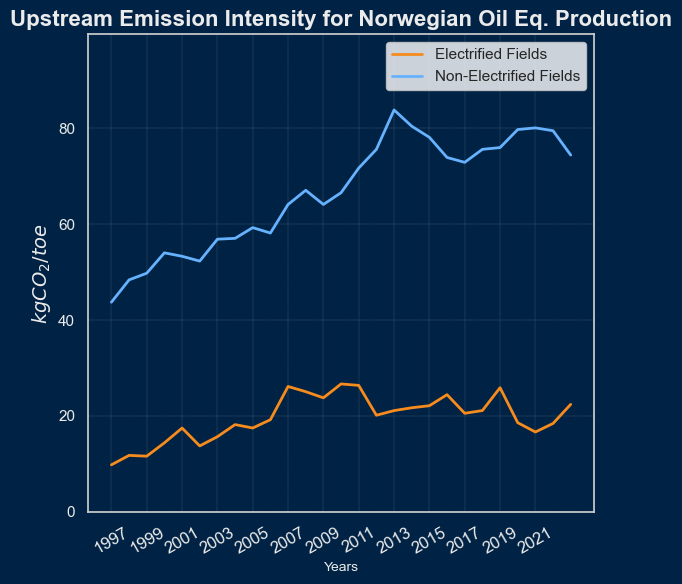

In [47]:
# Plotting the Annual Carbon Emission Intensity for Norwegian Oil Eq. Production (kgCO2/toe):

title = "Upstream Emission Intensity for Norwegian Oil Eq. Production"
x_label = "Years"
y_label = "$kgCO_2/toe$"
legend = ["Electrified Fields", "Non-Electrified Fields"]

x = [electrified_intensity.index, non_electrified_intensity.index]
y = [electrified_intensity, non_electrified_intensity]

create_line_plot(x, y, title, y_label, x_label, legend, 2)
plt.show()

In [48]:
# Plotting the Annual Carbon Emission Intensity for Norwegian Oil Eq. Production (kgCO2/toe), but adding the LC GHG emissions:
# Only ~2% of emissions are from extraction, ~98% comes from burning the fossil fuel. Add that to the intensity
# sm3 to toe : 1 sm3 = 0.84 toe
# 5.80 mmbtu/barrel × 20.31 kg C/mmbtu × 44 kg CO2/12 kg C × 1 metric ton/1,000 kg = 0.43 metric tons CO2/barrel =  0.43 x 7.49 = 3.2 metric tons CO2/toe = 3200 kgCO2/toe

lifecycle_elect_intensities = (
    emissions_from_electrified_fields
    + (production_from_electrified_fields * 1000 * 3.2 * 0.84)
) / (production_from_electrified_fields * 0.84)

lifecycle_non_elect_intensities = (
    emissions_from_non_electrified_fields
    + (production_from_non_electrified_fields * 1000 * 3.2 * 0.84)
) / (production_from_non_electrified_fields * 0.84)

In [49]:
# Printing the Lifetime Emission Intensity for Electrified Fields

# toe
print(
    f"The average lifetime emission intensity for the electrified fields during electrified years are: {np.round(lifecycle_elect_intensities.mean(),2)}kgCO2/toe"
)
# boe
print(
    f"The average lifetime emission intensity for the electrified fields during electrified years are: {np.round(lifecycle_elect_intensities.mean()/6.2898, 2)}kgCO2/boe"
)

# Printing the Lifetime Emission Intensity for Non-Electrified Fields
# toe
print(
    "The average lifetime emission intensity for the non-electrified fields and electrified during non-electrified years are: ",
    round(np.round(lifecycle_non_elect_intensities.mean(), 2)),
    "kgCO2/toe",
)
# boe
print(
    "The average lifetime emission intensity for the non-electrified fields and electrified during non-electrified years are: ",
    round(np.round(lifecycle_non_elect_intensities.mean() / 6.2898, 2)),
    "kgCO2/boe",
)

# The percentage diff for /toe

percentage_diff = (
    (lifecycle_elect_intensities.mean() - lifecycle_non_elect_intensities.mean())
    / lifecycle_non_elect_intensities.mean()
) * 100

print(
    f"\nThe electrified fields have a {np.round(percentage_diff,2)}% lower lifetime emission intensity than the non-electrified fields"
)

The average lifetime emission intensity for the electrified fields during electrified years are: 3219.65kgCO2/toe
The average lifetime emission intensity for the electrified fields during electrified years are: 511.88kgCO2/boe
The average lifetime emission intensity for the non-electrified fields and electrified during non-electrified years are:  3267 kgCO2/toe
The average lifetime emission intensity for the non-electrified fields and electrified during non-electrified years are:  519 kgCO2/boe

The electrified fields have a -1.44% lower lifetime emission intensity than the non-electrified fields


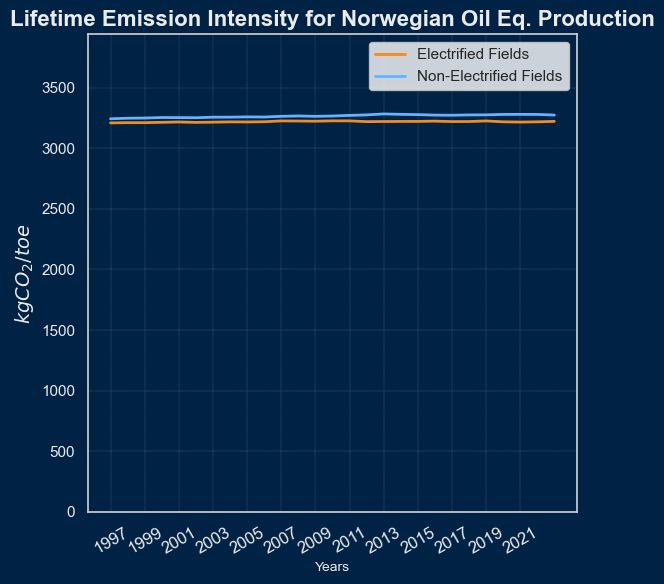

In [50]:
# Plotting Lifetime Emission Intensity for Norwegian Oil Eq. Extraction $(kgCO_2/toe)$

title = "Lifetime Emission Intensity for Norwegian Oil Eq. Production"
x_label = "Years"
y_label = "$kgCO_2/toe$"
legend = ["Electrified Fields", "Non-Electrified Fields"]

x = [lifecycle_elect_intensities.index, lifecycle_non_elect_intensities.index]
y = [lifecycle_elect_intensities, lifecycle_non_elect_intensities]

create_line_plot(x, y, title, y_label, x_label, legend, 2)
plt.show()

### CO2 Equivalent Emissions

Until now, we have only operated with reported CO2 emissions. For a more nuanced picture we need to introduce other potent GHG emissions. We will use the following conversion factors:

On a 100 years perspective (GWP 100):

- $CH_4 \times 30$
- $N_2O \times 296$

On a 20 years perspective (GWP 20):

- $CH_4 \times 84$
- $N_2O \times 296$

Hence we have:

- $ CO_2E \text{(GWP100)} = CO_2 + (CH_4 \times 30) + (N_2O \times 296)$

- $ CO_2E \text{(GWP20)} = CO_2 + (CH_4 \times 84) + (N_2O \times 296)$

Source: [IPCC (for GWP100)](https://www.ipcc.ch/site/assets/uploads/2018/03/TAR-04.pdf), [IEA (for GWP20)](https://www.iea.org/reports/methane-tracker-2021/methane-and-climate-change)


In [51]:
# Computing the co2e per field
# GWP100
fields_prod_emissions_1997_2023_df["yearly_tco2e_gwp100"] = (
    fields_prod_emissions_1997_2023_df["yearly_co2_emissions_1000_tonnes"] * 1000
    + fields_prod_emissions_1997_2023_df["yearly_ch4_emissions_tons"] * 30
    + fields_prod_emissions_1997_2023_df["yearly_nox_emissions_tons"] * 296
)

# GWP20
fields_prod_emissions_1997_2023_df["yearly_tco2e_gwp20"] = (
    fields_prod_emissions_1997_2023_df["yearly_co2_emissions_1000_tonnes"] * 1000
    + fields_prod_emissions_1997_2023_df["yearly_ch4_emissions_tons"] * 84
    + fields_prod_emissions_1997_2023_df["yearly_nox_emissions_tons"] * 296
)

fields_prod_emissions_1997_2023_df.head(5)

field  year  net_oil_prod_yearly_mill_sm3  \
0  statfjord nord  1997                       3.93531   
1      veslefrikk  1997                       3.47468   
2            frøy  1997                       1.39602   
3             hod  1997                       0.46766   
5             yme  1997                       1.97977   

   net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                       0.17288                       0.09230   
1                       0.13919                       0.08596   
2                       0.28878                       0.00000   
3                       0.09469                       0.02645   
5                       0.00000                       0.00000   

   net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                              0.00000                          4.20051   
1                              0.00000                          3.69981   
2                              0.01732                          1.70211   
3                              0.00000                          0.58879   
5                              0.00000                          1.97977   

   produced_water_yearly_mill_sm3  field_id  \
0                             0.0     43679   
1                             0.0     43618   
2                             0.0     43597   
3                             0.0     43485   
5                             0.0     43807   

   net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
0                             0.053898                             0.000405   
1                             0.052851                             0.008952   
2                             0.026260                             0.005287   
3                             0.003632                             0.001044   
5                             0.056455                             0.000000   

   net_ngl_prod_monthly_sm3_volatility  \
0                             0.000334   
1                             0.005461   
2                             0.000000   
3                             0.000238   
5                             0.000000   

   net_condensate_prod_monthly_sm3_volatility  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000942   
3                                    0.000000   
5                                    0.000000   

   net_oil_eq_prod_monthly_sm3_volatility  produced_water_in_field_volatility  \
0                                0.054005                                 0.0   
1                                0.053418                                 0.0   
2                                0.030860                                 0.0   
3                                0.004729                                 0.0   
5                                0.056455                                 0.0   

      status current_status  field_owner processing_field  field_in_emissions  \
0  Producing      Producing      21084.0        statfjord                True   
1  Producing      Shut down      21212.0       veslefrikk                True   
2  Producing      Shut down    3810636.0            frigg               False   
3  Producing      Producing      21052.0          valhall                True   
5  Producing      Producing    2786469.0              yme                True   

   facilities_lifetime_mean  facilities_lifetime_std  \
0                      27.5                15.000000   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                      30.0                 0.000000   
5                      20.0                 7.071068   

   facilities_water_depth_mean  facilities_water_depth_std  \
0                       241.75                   65.030121   
1                          NaN                         NaN   
2                       

In [52]:
non_electrified_intra_fields_df = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["electrified"] == 0)
]

electrified_intra_fields_df = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["electrified"] == 1)
]

#
# GWP100 intensity : electrified
#
emissions_from_electrified_fields_gwp100 = electrified_intra_fields_df.groupby(
    ["year"]
)["yearly_tco2e_gwp100"].sum()

production_from_electrified_fields = electrified_intra_fields_df.groupby(["year"])[
    "net_oil_eq_prod_yearly_mill_sm3"
].sum()

electrified_intensity_gwp_100 = (
    (emissions_from_electrified_fields_gwp100 / 1000)
    / (production_from_electrified_fields)
) / 0.84

#
# GWP 100 : non-electrified
#
emissions_from_non_electrified_fields_gwp100 = non_electrified_intra_fields_df.groupby(
    ["year"]
)["yearly_tco2e_gwp100"].sum()

production_from_non_electrified_fields = non_electrified_intra_fields_df.groupby(
    ["year"]
)["net_oil_eq_prod_yearly_mill_sm3"].sum()

non_electrified_intensity_gwp_100 = (
    (emissions_from_non_electrified_fields_gwp100 / 1000)
    / (production_from_non_electrified_fields)
) / 0.84

In [53]:
print("GWP100 - electrified")

# Printing the average CO2e intensity of electrified fields GWP100
print(
    f"The average CO2e intensity of electrified fields is: {np.round(electrified_intensity_gwp_100.mean(), 2)}kgCO2e/toe"
)

# boe
print(
    f"The average CO2e intensity of electrified fields is: {np.round(electrified_intensity_gwp_100.mean()/6.2898, 2)}kgCO2e/boe"
)

GWP100 - electrified
The average CO2e intensity of electrified fields is: 54.83kgCO2e/toe
The average CO2e intensity of electrified fields is: 8.72kgCO2e/boe


In [54]:
print("GWP100 - non-electrified")

# Printing the average CO2e intensity of non-electrified fields
print(
    f"The average CO2e intensity of non-electrified fields is: {np.round(non_electrified_intensity_gwp_100.mean(), 2)}kgCO2e/toe"
)

# boe
print(
    f"The average CO2e intensity of non-electrified fields is: {np.round(non_electrified_intensity_gwp_100.mean()/6.2898, 2)}kgCO2e/boe"
)

GWP100 - non-electrified
The average CO2e intensity of non-electrified fields is: 146.42kgCO2e/toe
The average CO2e intensity of non-electrified fields is: 23.28kgCO2e/boe


In [55]:
#
# GWP 20
#
# electrified
electrified_intensity_gwp_20 = (
    (electrified_intra_fields_df.groupby(["year"])["yearly_tco2e_gwp20"].sum() / 1000)
    / (
        electrified_intra_fields_df.groupby(["year"])[
            "net_oil_eq_prod_yearly_mill_sm3"
        ].sum()
    )
    / 0.84
)

# non-electrified
non_electrified_intensity_gwp_20 = (
    (
        non_electrified_intra_fields_df.groupby(["year"])["yearly_tco2e_gwp20"].sum()
        / 1000
    )
    / (
        non_electrified_intra_fields_df.groupby(["year"])[
            "net_oil_eq_prod_yearly_mill_sm3"
        ].sum()
    )
    / 0.84
)

In [56]:
# Printing the average CO2e intensity of electrified fields GWP20

print("GWP20 - electrified")
print(
    f"The average CO2e intensity of electrified fields is: {np.round(electrified_intensity_gwp_20.mean(), 2)}kgCO2e/toe"
)

# boe
print(
    f"The average CO2e intensity of electrified fields is: {np.round(electrified_intensity_gwp_20.mean()/6.2898, 2)}kgCO2e/boe"
)

GWP20 - electrified
The average CO2e intensity of electrified fields is: 56.43kgCO2e/toe
The average CO2e intensity of electrified fields is: 8.97kgCO2e/boe


In [57]:
print("GWP20 - non-electrified")

# Printing the average CO2e intensity of non-electrified fields
print(
    f"The average CO2e intensity of non-electrified fields is: {np.round(non_electrified_intensity_gwp_20.mean(), 2)}kgCO2e/toe"
)

# boe
print(
    f"The average CO2e intensity of non-electrified fields is: {np.round(non_electrified_intensity_gwp_20.mean()/6.2898, 2)}kgCO2e/boe"
)

GWP20 - non-electrified
The average CO2e intensity of non-electrified fields is: 154.23kgCO2e/toe
The average CO2e intensity of non-electrified fields is: 24.52kgCO2e/boe


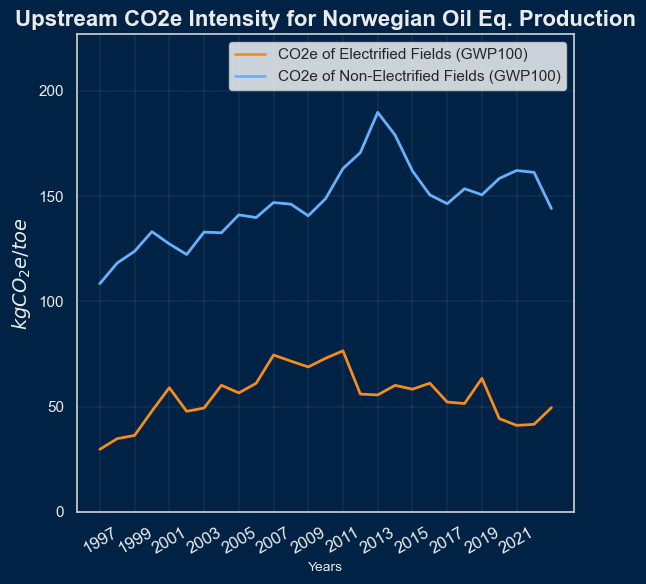

In [58]:
# Plotting the annual CO2e intensity for elect and non-elect fields GWP100

title = "Upstream CO2e Intensity for Norwegian Oil Eq. Production"
x_label = "Years"
y_label = "$kgCO_2e/toe$"
legend = [
    "CO2e of Electrified Fields (GWP100)",
    "CO2e of Non-Electrified Fields (GWP100)",
    # "Elect. (GWP 20)",
    # "Non-Elect. (GWP 20)",
]

x = [
    electrified_intensity_gwp_100.index,
    non_electrified_intensity_gwp_100.index,
    # electrified_intensity_gwp_20.index,
    # non_electrified_intensity_gwp_20.index,
]
y = [
    electrified_intensity_gwp_100,
    non_electrified_intensity_gwp_100,
    # electrified_intensity_gwp_20,
    # non_electrified_intensity_gwp_20,
]

create_line_plot(x, y, title, y_label, x_label, legend, 2)
plt.show()

In [59]:
# Lifecyle intensity for electrified fields and non-electrified fields
# Calculating the lifecycle emission intensity for electrified and non-electrified fields
# Done as follows:
# lifecycle_emission  = (emissions_from_field + (production_from_field * 1000 * 3.200 * 0.84)) / (production_from_field * 0.84

lifecycle_elect_intensities_gwp100 = (
    emissions_from_electrified_fields_gwp100 / 1000
    + (production_from_electrified_fields * 1000 * 3.2 * 0.84)
) / (production_from_electrified_fields * 0.84)

lifecycle_non_elect_intensities_gwp100 = (
    emissions_from_non_electrified_fields_gwp100 / 1000
    + (production_from_non_electrified_fields * 1000 * 3.2 * 0.84)
) / (production_from_non_electrified_fields * 0.84)

In [60]:
# Printing the Lifetime Emission Intensity for Electrified Fields GWP100

# toe
print(
    f"The average lifetime emission intensity for the electrified fields during electrified years are: {np.round(lifecycle_elect_intensities_gwp100.mean(),2)}kgCO2e/toe"
)

# boe
print(
    f"The average lifetime emission intensity for the electrified fields during electrified years are: {np.round(lifecycle_elect_intensities_gwp100.mean()/6.2898, 2)}kgCO2e/boe"
)

The average lifetime emission intensity for the electrified fields during electrified years are: 3254.83kgCO2e/toe
The average lifetime emission intensity for the electrified fields during electrified years are: 517.48kgCO2e/boe


In [61]:
# Printing the Lifetime Emission Intensity for Non-Electrified Fields GWP100

# toe
print(
    f"The average lifetime emission intensity for the non-electrified fields and electrified during non-electrified years are: {np.round(lifecycle_non_elect_intensities_gwp100.mean(),2)}kgCO2e/toe"
)

# boe
print(
    f"The average lifetime emission intensity for the non-electrified fields and electrified during non-electrified years are: {np.round(lifecycle_non_elect_intensities_gwp100.mean()/6.2898,2)}kgCO2e/boe"
)

The average lifetime emission intensity for the non-electrified fields and electrified during non-electrified years are: 3346.42kgCO2e/toe
The average lifetime emission intensity for the non-electrified fields and electrified during non-electrified years are: 532.04kgCO2e/boe


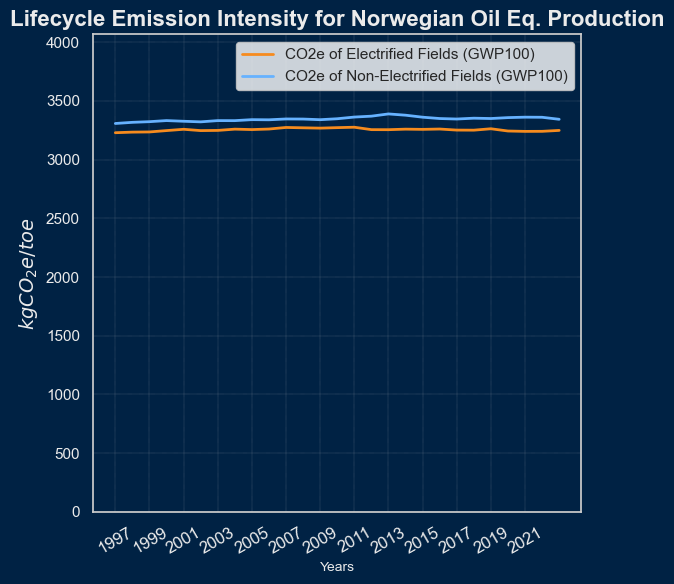

In [62]:
# Titles and labels
title = "Lifecycle Emission Intensity for Norwegian Oil Eq. Production"
x_label = "Years"
y_label = "$kgCO_2e/toe$"
legend = [
    "CO2e of Electrified Fields (GWP100)",
    "CO2e of Non-Electrified Fields (GWP100)",
]

x = [
    lifecycle_elect_intensities_gwp100.index,
    lifecycle_non_elect_intensities_gwp100.index,
]
y = [lifecycle_elect_intensities_gwp100, lifecycle_non_elect_intensities_gwp100]

# Call plot function

plot = create_line_plot(
    x,
    y,
    title,
    y_label,
    x_label,
    legend,
    x_ticks=2,
)

plot.show()

In [63]:
# Setting a new column to hold the emission GWP100 intensity for each field for each year

fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"] = (
    (fields_prod_emissions_1997_2023_df["yearly_tco2e_gwp100"])
    / 1000
    / fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"]
) / 0.84

# Replacing inf with 0
fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"] = (
    fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"].replace(np.inf, 0)
)

fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"] = (
    fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"].replace(np.nan, 0)
)

In [64]:
# Counting number of 0s

fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"].value_counts()

0.000000       590
122.227317       1
34.560243        1
35.645069        1
19.991592        1
              ... 
54.029116        1
38.469817        1
444.817772       1
47.974025        1
1030.063123      1
Name: kgco2e/toe_int_gwp100, Length: 1182, dtype: int64

In [65]:
fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"].describe()

count    1.771000e+03
mean     2.032073e+03
std      4.297819e+04
min      0.000000e+00
25%      0.000000e+00
50%      4.776384e+01
75%      2.268685e+02
max      1.270215e+06
Name: kgco2e/toe_int_gwp100, dtype: float64

In [66]:
# Create function to plot the distribution of a dataset


def plot_distribution(
    data,
    title,
    x_label,
    y_label,
    xmin,
    xmax,
    bins=50,
):
    plt.hist(
        data,
        bins=50,
        color=line_1_color,
    )

    plt.title(
        title,
        fontsize=16,
        color=text_color,
    )
    plt.xlabel(x_label, fontsize=16, color=text_color)
    plt.ylabel(y_label, fontsize=12, color=text_color)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlim(0, 1000)

    # text color: white
    plt.xticks(fontsize=10, color=text_color)
    plt.yticks(fontsize=10, color=text_color)

    # background
    plt.gca().patch.set_facecolor(background_color)
    plt.gcf().patch.set_facecolor(background_color)

    return plt

In [67]:
# Plotting histofram for the kgco2e/toe_int_gwp100
# data = kgco2e/toe_int_gwp100 between 0 and 1000

data = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"] > 0)
    & (fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"] < 1000)
]

# Call hist function
plot = plot_distribution(
    data["kgco2e/toe_int_gwp100"],
    "Distribution of Emission Intensity for Norwegian Oil Eq. Production",
    "CO2e Intensity $(kgCO2_e/toe)$",
    "Number of Fields",
    0,
    1000,
)

plot.show()

### Calculating Production rate

Production rate as of share of peak production rate. This is calculated as:

$ \text{Share peak production share}_{\text{field i}} = \frac{\text{Current production}_{\text{field i}}}{\text{Peak production}\_{\text{field i}}} \times \text{100} $


In [68]:
fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"].describe()

count    1771.000000
mean        3.601358
std         6.458177
min         0.000000
25%         0.326260
50%         1.320840
75%         4.065360
max        48.502120
Name: net_oil_eq_prod_yearly_mill_sm3, dtype: float64

In [69]:
# Max production for each field

max_production = fields_prod_emissions_1997_2023_df.groupby(["field"])[
    "net_oil_eq_prod_yearly_mill_sm3"
].max()

fields_prod_emissions_1997_2023_df["share_peak_prod"] = (
    fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"]
    / fields_prod_emissions_1997_2023_df["field"].map(max_production)
) * 100

In [70]:
# creating function to plot scatterplot


def plot_scatter(data, x, y, title, x_label, y_label, x_min=0, x_max=100):
    # Set up the plot
    plt.figure(figsize=(12, 8))

    # Plot the data
    plt.scatter(
        data=data,
        x=x,
        y=y,
        linewidth=0.2,
        s=40,
        color=line_1_color,
        edgecolor="black",
    )

    plt.title(title, fontsize=20, color=text_color)
    plt.xlabel(x_label, fontsize=14, color=text_color)
    plt.ylabel(y_label, fontsize=14, color=text_color)

    # white ticks
    plt.xticks(fontsize=12, color=text_color)
    plt.yticks(fontsize=12, color=text_color)

    # starting at 0
    plt.xlim(x_min, x_max)

    plt.gca().patch.set_facecolor(background_color)
    plt.gcf().patch.set_facecolor(background_color)

    return plt

In [71]:
# Creating scatter plot for the share of peak production and the CO2 intensity

plot = plot_scatter(
    data=fields_prod_emissions_1997_2023_df,
    x="share_peak_prod",
    y="yearly_tco2e_gwp100",
    title="Share of Peak Production vs CO2e Emissions",
    x_label="Share of Peak Production (%)",
    y_label="Yearly CO2 Emissions (tCO2e)",
)

plot.show()

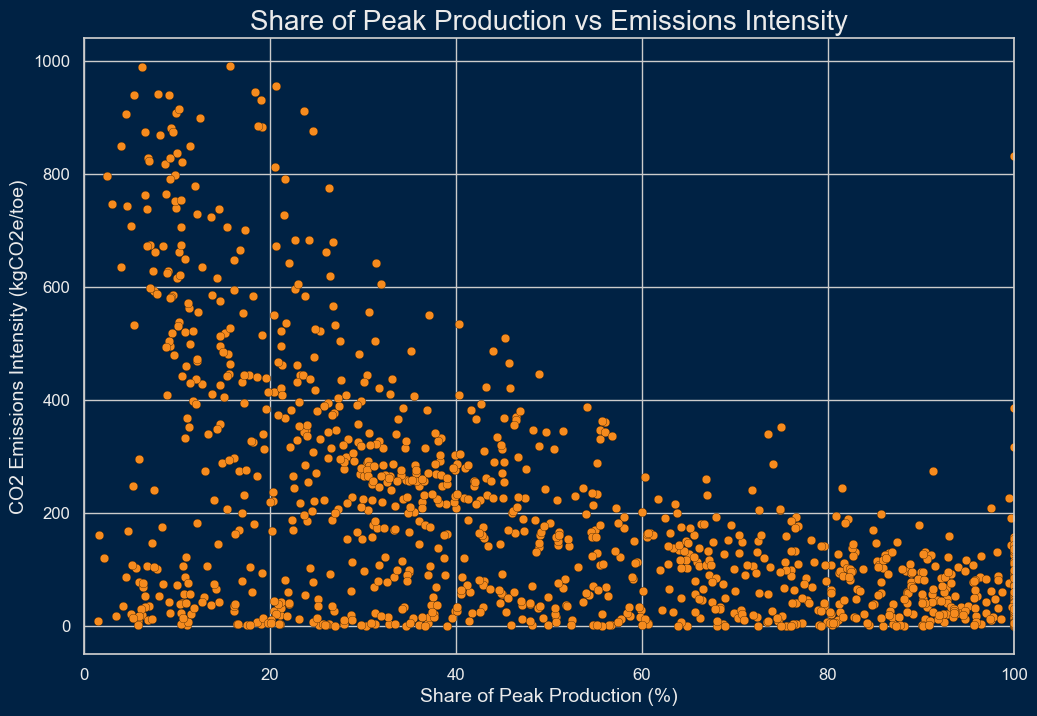

In [72]:
# Creating scatter plot for the share of peak production and the CO2 intensity

data = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"] > 0)
    & (fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"] < 1000)
]

plot = plot_scatter(
    data=data,
    x="share_peak_prod",
    y="kgco2e/toe_int_gwp100",
    title="Share of Peak Production vs Emissions Intensity",
    x_label="Share of Peak Production (%)",
    y_label="CO2 Emissions Intensity (kgCO2e/toe)",
)

plot.show()

### Calculating share of remaining reserves

Share of remaining reserves as of each year.

First we need to calculate the share of remaining reserves for each year. We will use the cum. sum of o.e. production and subtract that from the original reserve.


In [73]:
# Cum sum for the production for each field, subtracting that from the original reserve
fields_prod_emissions_1997_2023_df["oe_cum_sum_prod"] = (
    fields_prod_emissions_1997_2023_df.groupby(
        "field_id"
    )["net_oil_eq_prod_yearly_mill_sm3"].cumsum()
)

fields_prod_emissions_1997_2023_df["share_reserve_of_original_reserve"] = (
    100
    - (
        fields_prod_emissions_1997_2023_df["oe_cum_sum_prod"]
        / fields_prod_emissions_1997_2023_df["original_recoverable_oe"]
    )
    * 100
)

fields_prod_emissions_1997_2023_df["share_reserve_of_original_reserve"].describe()

count    1764.000000
mean       51.049371
std        31.515277
min       -77.390398
25%        27.543943
50%        53.750205
75%        76.986439
max       100.000000
Name: share_reserve_of_original_reserve, dtype: float64

Higher than 100% means that the field has produced more than the original reserve. This is possible due to new technology and increased recovery rates.


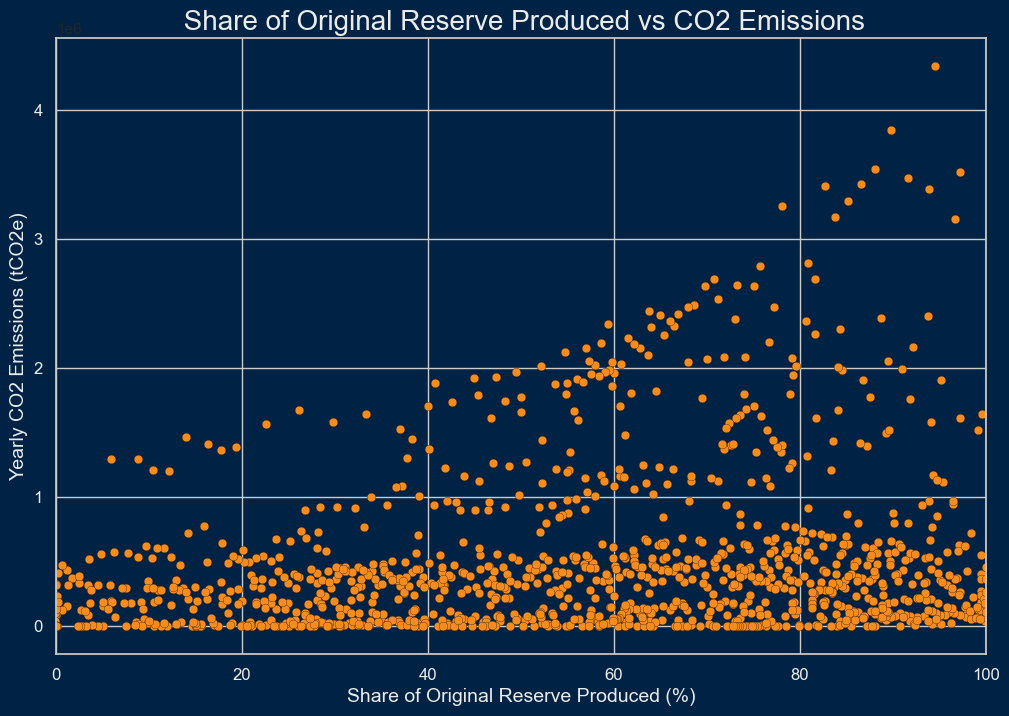

In [74]:
# Creating scatter plot for the share of original reserve produced and the CO2 intensity

# Todo: add field_id as color hue
plot = plot_scatter(
    data=fields_prod_emissions_1997_2023_df,
    x="share_reserve_of_original_reserve",
    y="yearly_tco2e_gwp100",
    title=" Share of Original Reserve Produced vs CO2 Emissions",
    x_label="Share of Original Reserve Produced (%)",
    y_label="Yearly CO2 Emissions (tCO2e)",
)

plot.show()

In [75]:
# Creating scatter plot for the share of original reserve produced and the CO2 intensity

data = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"] > 0)
    & (fields_prod_emissions_1997_2023_df["kgco2e/toe_int_gwp100"] < 1000)
]

plot = plot_scatter(
    data=data,
    x="share_reserve_of_original_reserve",
    y="kgco2e/toe_int_gwp100",
    title="Share of Original Reserve Produced vs Emission Intensity",
    x_label="Share of Original Reserve Produced (%)",
    y_label="Yearly Emissions Intensity (kgCO2e/toe)",
)

plot.show()

In [76]:
# describing the reserve columns

reserve_cols = [
    "current_remaining_recoverable_oil",
    "current_remaining_recoverable_gas",
    "current_remaining_recoverable_ngl",
    "current_remaining_recoverable_condensate",
    "current_remaining_recoverable_oe",
    "original_recoverable_oil",
    "original_recoverable_gas",
    "original_recoverable_ngl",
    "original_recoverable_condensate",
    "original_recoverable_oe",
]

fields_prod_emissions_1997_2023_df[reserve_cols].describe()

current_remaining_recoverable_oil  current_remaining_recoverable_gas  \
count                        1764.000000                        1764.000000   
mean                            6.517387                          15.735142   
std                            18.065827                          75.599257   
min                             0.000000                           0.000000   
25%                             0.030000                           0.000000   
50%                             1.300000                           0.320000   
75%                             5.230000                           6.080000   
max                           262.210000                         606.030000   

       current_remaining_recoverable_ngl  \
count                        1764.000000   
mean                            0.670845   
std                             1.446996   
min                             0.000000   
25%                             0.000000   
50%                             0.040000   
75%                             0.640000   
max                             8.050000   

       current_remaining_recoverable_condensate  \
count                               1764.000000   
mean                                   0.140102   
std                                    1.177490   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                   11.820000   

       current_remaining_recoverable_oe  original_recoverable_oil  \
count                       1764.000000               1764.000000   
mean                          23.668186                 73.151559   
std                           79.540068                124.951587   
min                            0.000000                  0.000000   
25%                            0.330000                  4.940000   
50%                            4.110000                 23.140000   
75%                           16.660000                 72.260000   
max                          624.220000                582.980000   

       original_recoverable_gas  original_recoverable_ngl  \
count               1764.000000               1764.000000   
mean                  53.250669                  4.093963   
std                  181.502769                  7.053995   
min                    0.000000                  0.000000   
25%                    1.710000                  0.030000   
50%                    6.200000                  1.390000   
75%                   32.210000                  5.520000   
max                 1436.560000                 42.970000   

       original_recoverable_condensate  original_recoverable_oe  
count                      1764.000000              1764.000000  
mean                          1.737806               135.919461  
std                           5.928955               258.266374  
min                           0.000000                 0.080000  
25%                           0.000000                14.970000  
50%                           0.000000                51.070000  
75%                           0.000000               129.420000  
max                          29.740000              1774.730000

In [77]:
# Total yearly oe production in million sm3

total_oe_production = fields_prod_emissions_1997_2023_df.groupby("year")[
    "net_oil_eq_prod_yearly_mill_sm3"
].sum()

# Calculating the total original original_recoverable_oe by counting each field once
total_original_recoverable_oe = (
    fields_prod_emissions_1997_2023_df[["field", "original_recoverable_oe"]]
    .drop_duplicates()["original_recoverable_oe"]
    .sum()
)


display(total_oe_production)
display(total_original_recoverable_oe)

# Cumaulative sum the production from total_oe_production and for each year subtract it from the total_original_recoverable_oe
# to get the remaining recoverable oe for each year

remaining_recoverable_oe = total_original_recoverable_oe - total_oe_production.cumsum()
display(remaining_recoverable_oe)

year
1997    230.97278
1998    224.16673
1999    229.07148
2000    242.83643
2001    250.68153
2002    257.54044
2003    260.87922
2004    263.45022
2005    257.65464
2006    249.47683
2007    238.26251
2008    243.50755
2009    240.53778
2010    231.06839
2011    219.55010
2012    226.23598
2013    215.35521
2014    217.76438
2015    229.93709
2016    232.94279
2017    239.04505
2018    229.53861
2019    215.88070
2020    229.68001
2021    232.93925
2022    234.53928
2023    234.49092
Name: net_oil_eq_prod_yearly_mill_sm3, dtype: float64

10433.9

year
1997    10202.92722
1998     9978.76049
1999     9749.68901
2000     9506.85258
2001     9256.17105
2002     8998.63061
2003     8737.75139
2004     8474.30117
2005     8216.64653
2006     7967.16970
2007     7728.90719
2008     7485.39964
2009     7244.86186
2010     7013.79347
2011     6794.24337
2012     6568.00739
2013     6352.65218
2014     6134.88780
2015     5904.95071
2016     5672.00792
2017     5432.96287
2018     5203.42426
2019     4987.54356
2020     4757.86355
2021     4524.92430
2022     4290.38502
2023     4055.89410
Name: net_oil_eq_prod_yearly_mill_sm3, dtype: float64

In [78]:
# Sum of current remaining recoverable oe

# Calculating the total original original_recoverable_oe by counting each field once
total_remaining_recoverable_oe = (
    fields_prod_emissions_1997_2023_df[["field", "current_remaining_recoverable_oe"]]
    .drop_duplicates()["current_remaining_recoverable_oe"]
    .sum()
)

# sm3 to toe : 1 sm3 = 0.84 toe
print(
    f"Remaining Recoverable Oil Eq.: {np.round(total_remaining_recoverable_oe*0.84)} million toe"
)


# 5.80 mmbtu/barrel × 20.31 kg C/mmbtu × 44 kg CO2/12 kg C × 1 metric ton/1,000 kg = 0.43 metric tons CO2/barrel =  0.43 x 7.49 = 0.36 metric tons CO2/toe
# Using this conversion rate, calculate th amount of CO2 the remaining recoverable oe can produce

remaining_recoverable_oe_co2 = total_remaining_recoverable_oe * 1000000 * 0.36 * 0.84

print(
    f"CO2 Potential by burning remaining recoverable reserves: {(remaining_recoverable_oe_co2/1000000000).round(2)} GtCO2"
)

Remaining Recoverable Oil Eq.: 1814.0 million toe
CO2 Potential by burning remaining recoverable reserves: 0.65 GtCO2


In [79]:
# Remaining recoverable gas
# Calculating the total original original_recoverable_gas by counting each field once
total_original_recoverable_gas = (
    fields_prod_emissions_1997_2023_df[["field", "original_recoverable_gas"]]
    .drop_duplicates()["original_recoverable_gas"]
    .sum()
)

# Calculating the total original original_recoverable_gas by counting each field once
total_remaining_recoverable_gas = (
    fields_prod_emissions_1997_2023_df[["field", "current_remaining_recoverable_gas"]]
    .drop_duplicates()["current_remaining_recoverable_gas"]
    .sum()
)

print("Remaining Recoverable Gas")
print(
    f"Original Recoverable Gas: {np.round(total_original_recoverable_gas, 2)} billion sm3"
)
print(
    f"Remaining Recoverable Gas: {np.round(total_remaining_recoverable_gas, 2)} billion sm3"
)

Remaining Recoverable Gas
Original Recoverable Gas: 4120.06 billion sm3
Remaining Recoverable Gas: 1258.31 billion sm3


In [80]:
# Remaining recoverable NGL
# Calculating the total original original_recoverable_ngl by counting each field once
total_original_recoverable_ngl = (
    fields_prod_emissions_1997_2023_df[["field", "original_recoverable_ngl"]]
    .drop_duplicates()["original_recoverable_ngl"]
    .sum()
)

# Calculating the total original original_recoverable_ngl by counting each field once
total_remaining_recoverable_ngl = (
    fields_prod_emissions_1997_2023_df[["field", "current_remaining_recoverable_ngl"]]
    .drop_duplicates()["current_remaining_recoverable_ngl"]
    .sum()
)

print("Remaining Recoverable NGL")
print(
    f"Original Recoverable NGL: {np.round(total_original_recoverable_ngl, 2)} million sm3"
)
print(
    f"Remaining Recoverable NGL: {np.round(total_remaining_recoverable_ngl, 2)} million sm3"
)

Remaining Recoverable NGL
Original Recoverable NGL: 316.79 million sm3
Remaining Recoverable NGL: 59.26 million sm3


In [81]:
# Remaining recoverable oil
# Calculating the total original original_recoverable_oil by counting each field once
total_original_recoverable_oil = (
    fields_prod_emissions_1997_2023_df[["field", "original_recoverable_oil"]]
    .drop_duplicates()["original_recoverable_oil"]
    .sum()
)

# Calculating the total original original_recoverable_oil by counting each field once
total_remaining_recoverable_oil = (
    fields_prod_emissions_1997_2023_df[["field", "current_remaining_recoverable_oil"]]
    .drop_duplicates()["current_remaining_recoverable_oil"]
    .sum()
)

print("Remaining Recoverable Oil")
print(
    f"Original Recoverable Oil: {np.round(total_original_recoverable_oil, 2)} million sm3"
)
print(
    f"Remaining Recoverable Oil: {np.round(total_remaining_recoverable_oil, 2)} million sm3"
)

Remaining Recoverable Oil
Original Recoverable Oil: 5577.26 million sm3
Remaining Recoverable Oil: 773.24 million sm3


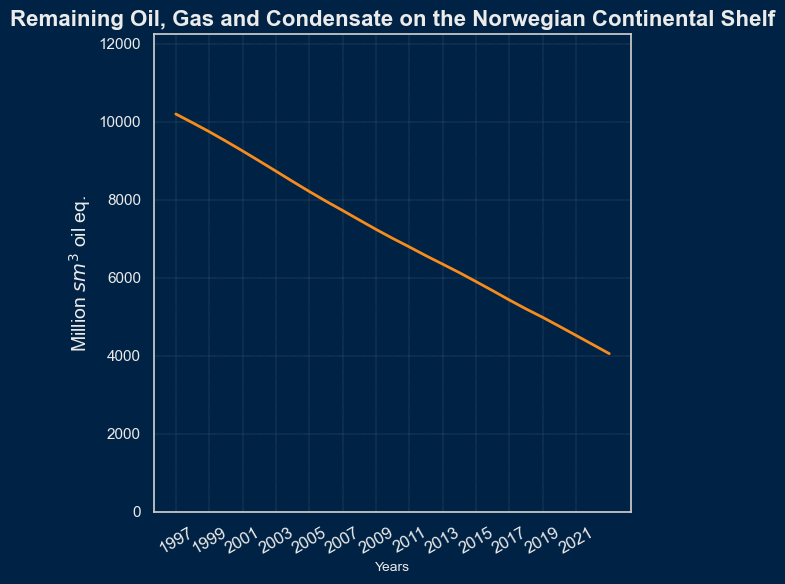

In [82]:
# Plotting the remaining_recoverable_oe over time using plot func

title = "Remaining Oil, Gas and Condensate on the Norwegian Continental Shelf"
x_label = "Years"
y_label = "Million $sm^3$ oil eq."
legend = False
x = [remaining_recoverable_oe.index]
y = [remaining_recoverable_oe]

plot = create_line_plot(x, y, title, y_label, x_label, legend, 2)
plot.show()

In [83]:
# Pie chart showing the current remaining recoverable oe as of total original recoverable oe

# OE
remaining_recoverable_oe_percentage = (
    total_remaining_recoverable_oe / total_original_recoverable_oe
)

# Gas
remaining_recoverable_gas_percentage = (
    total_remaining_recoverable_gas / total_original_recoverable_gas
)

# Oil
remaining_recoverable_oil_percentage = (
    total_remaining_recoverable_oil / total_original_recoverable_oil
)

# NGL
remaining_recoverable_ngl_percentage = (
    total_remaining_recoverable_ngl / total_original_recoverable_ngl
)

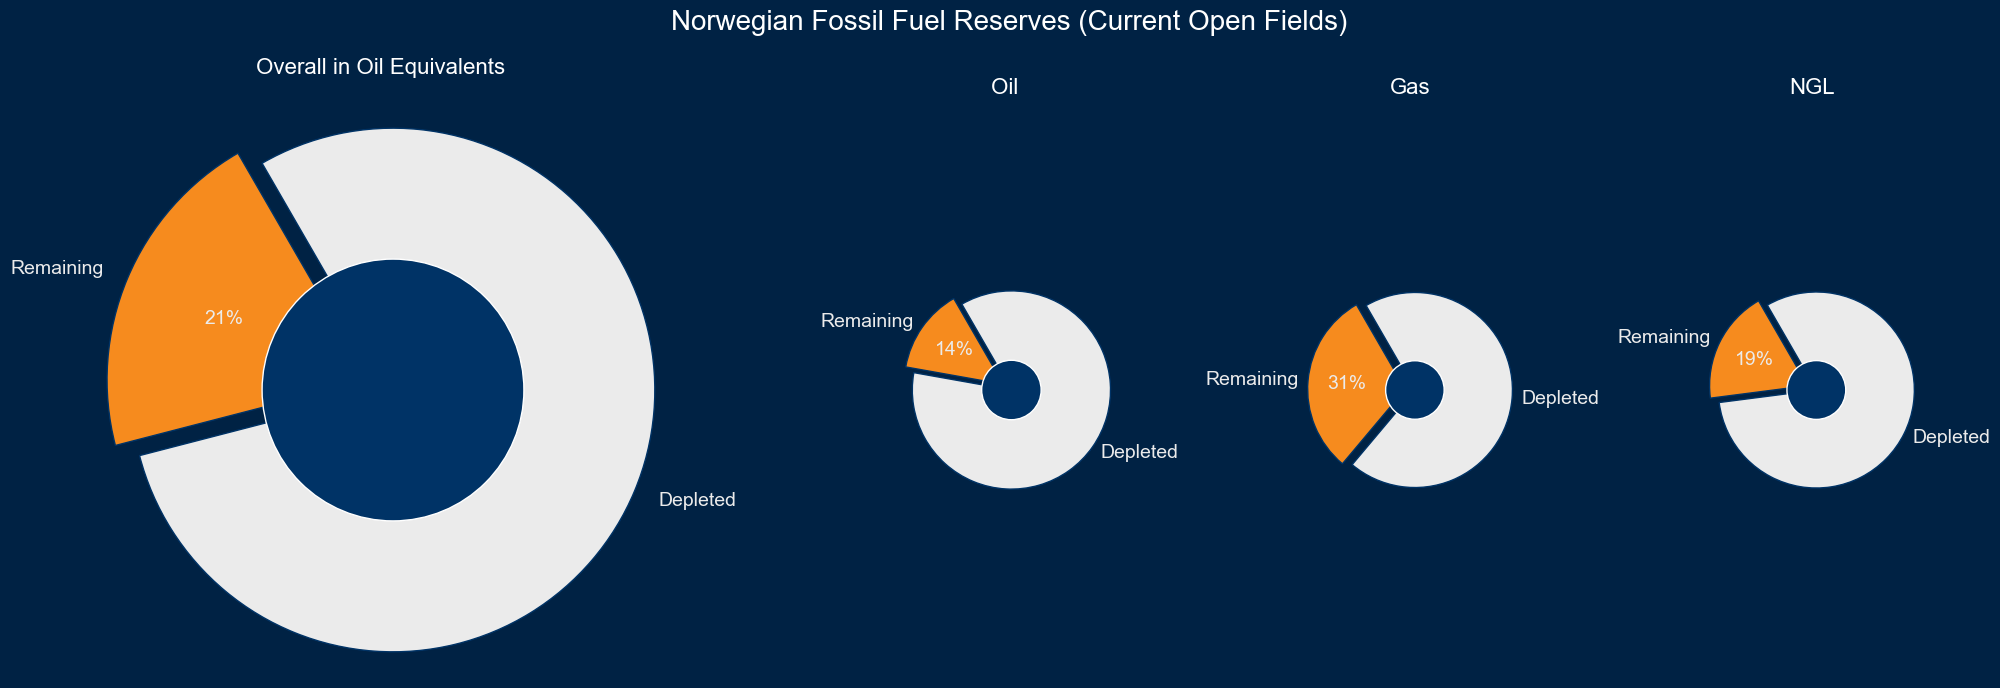

In [84]:
pie_main = [
    remaining_recoverable_oe_percentage * 100,
    100 - 100 * remaining_recoverable_oe_percentage,
]

pie_oil = [
    remaining_recoverable_oil_percentage * 100,
    100 - 100 * remaining_recoverable_oil_percentage,
]
pie_gas = [
    remaining_recoverable_gas_percentage * 100,
    100 - 100 * remaining_recoverable_gas_percentage,
]
pie_ngl = [
    remaining_recoverable_ngl_percentage * 100,
    100 - 100 * remaining_recoverable_ngl_percentage,
]

# Data for the main pie chart
labels_main = ["Remaining", "Depleted"]
colors_main = ["#F68B1E", "#EBEBEB"]  # Professional color palette
explode_main = (0.1, 0)  # Explode the remaining slice

labels_smaller = ["Remaining", "Depleted"]
colors_smaller = ["#F68B1E", "#EBEBEB"]  # Professional color palette
explode_smaller = (0.1, 0)

# Plotting the main pie chart and the smaller ones
fig, axs = plt.subplots(
    1, 4, figsize=(20, 7), gridspec_kw={"width_ratios": [3, 1, 1, 1]}
)

fig.suptitle(
    "Norwegian Fossil Fuel Reserves (Current Open Fields)", fontsize=20, color="white"
)

# Main pie chart
axs[0].pie(
    pie_main,
    explode=explode_main,
    labels=labels_main,
    colors=colors_main,
    autopct="%1.0f%%",
    startangle=120,
    textprops={"color": "#EBEBEB", "fontsize": 14},
    wedgeprops=dict(edgecolor="#003366"),
)
axs[0].add_artist(plt.Circle((0, 0), 0.5, fc="#003366"))
axs[0].set_title("Overall in Oil Equivalents", fontsize=16, color="white", pad=20)
axs[0].axis("equal")

# Smaller pie chart 1
axs[1].pie(
    pie_oil,
    explode=explode_smaller,
    labels=labels_smaller,
    colors=colors_smaller,
    autopct="%1.0f%%",
    startangle=120,
    textprops={"color": "#EBEBEB", "fontsize": 14},
    wedgeprops=dict(edgecolor="#003366"),
)
axs[1].add_artist(plt.Circle((0, 0), 0.3, fc="#003366"))
axs[1].axis("equal")
axs[1].set_title("Oil ", fontsize=16, color="white")

# Smaller pie chart 2
axs[2].pie(
    pie_gas,
    explode=explode_smaller,
    labels=labels_smaller,
    colors=colors_smaller,
    autopct="%1.0f%%",
    startangle=120,
    textprops={"color": "#EBEBEB", "fontsize": 14},
    wedgeprops=dict(edgecolor="#003366"),
)
axs[2].add_artist(plt.Circle((0, 0), 0.3, fc="#003366"))
axs[2].axis("equal")
axs[2].set_title("Gas", fontsize=16, color="white")

# Smaller pie chart 3
axs[3].pie(
    pie_ngl,
    explode=explode_smaller,
    labels=labels_smaller,
    colors=colors_smaller,
    textprops={"color": "#EBEBEB", "fontsize": 14},
    autopct="%1.0f%%",
    startangle=120,
    wedgeprops=dict(edgecolor="#003366"),
)
axs[3].add_artist(plt.Circle((0, 0), 0.30, fc="#003366"))
axs[3].axis("equal")
axs[3].set_title("NGL", fontsize=16, color="white")

# set background for whole visual to dark blue
fig.patch.set_facecolor(background_color)

# Adjust layout
plt.tight_layout()

plt.show()

# mckinsey orange = #F68B1E

### Calculating distributed emissions


Some of the fields don't process their own production. Hence we need to use the share production volume within each processing field `(processing_field)` to estimate the emissions. The emissions are then distributed to the fields based on their production volume.

The emissions are calculated as follows:

$\text{field emissions} = (\frac{\text{production volume for field}}{\text{total production volume for host processing field}} \times \text{host processing emissions})$

The total emissions are calculated as the sum of the emissions of the fields within the processing field each. The total production volume is calculated as the sum of the production volume of the fields within the processing field.


In [85]:
# Checking the dataframe for fields that does not have emissions and does not have a processing field
# fields_without_emissions_and_processing_field = (fields_prod_emissions_1997_2023_df[fields_prod_emissions_1997_2023_df['processing_field'].isna()])
display(
    fields_prod_emissions_1997_2023_df[
        fields_prod_emissions_1997_2023_df["processing_field"].isna()
    ].head()
)

# Setting the fields that does not have a processing field to be their own processing field

fields_prod_emissions_1997_2023_df.loc[
    fields_prod_emissions_1997_2023_df["processing_field"].isna(), "processing_field"
] = fields_prod_emissions_1997_2023_df.loc[
    fields_prod_emissions_1997_2023_df["processing_field"].isna(), "field"
]
display(
    fields_prod_emissions_1997_2023_df[
        fields_prod_emissions_1997_2023_df["processing_field"].isna()
    ].head()
)

field  year  net_oil_prod_yearly_mill_sm3  net_gas_prod_yearly_bill_sm3  \
605   rev  2009                       0.24037                       0.62851   
672   rev  2010                       0.29148                       1.12864   
707   rev  2011                       0.08412                       0.48054   
821   rev  2012                       0.05707                       0.29621   
912   rev  2013                       0.02466                       0.06287   

     net_ngl_prod_yearly_mill_sm3  net_condensate_prod_yearly_mill_sm3  \
605                       0.00000                              0.00000   
672                       0.01900                              0.02453   
707                       0.03324                              0.01957   
821                       0.02173                              0.01226   
912                       0.00781                              0.00285   

     net_oil_eq_prod_yearly_mill_sm3  produced_water_yearly_mill_sm3  \
605                          0.86888                         0.00000   
672                          1.46367                         0.00000   
707                          0.61746                         0.00616   
821                          0.38723                         0.00733   
912                          0.09817                         0.01214   

     field_id  net_oil_prod_monthly_sm3_volatility  \
605   4467554                             0.012385   
672   4467554                             0.007403   
707   4467554                             0.004766   
821   4467554                             0.002037   
912   4467554                             0.001713   

     net_gas_prod_monthly_sm3_volatility  net_ngl_prod_monthly_sm3_volatility  \
605                             0.033015                             0.000000   
672                             0.030383                             0.003186   
707                             0.025951                             0.002499   
821                             0.009701                             0.000960   
912                             0.004285                             0.000697   

     net_condensate_prod_monthly_sm3_volatility  \
605                                    0.000000   
672                                    0.003770   
707                                    0.001139   
821                                    0.000451   
912                                    0.000200   

     net_oil_eq_prod_monthly_sm3_volatility  \
605                                0.045208   
672                                0.039304   
707                                0.033646   
821                                0.012535   
912                                0.006482   

     produced_water_in_field_volatility                   status  \
605                            0.000000  Approved for production   
672                            0.000000                Producing   
707                            0.000613                Producing   
821                            0.000285                Producing   
912                            0.001386                Producing   

    current_status  field_owner processing_field  field_in_emissions  \
605      Producing    4005057.0              NaN                True   
672      Producing    4005057.0              NaN                True   
707      Producing    4005057.0              NaN                True   
821      Producing    4005057.0              NaN                True   
912      Producing    4005057.0              NaN                True   

     facilities_lifetime_mean  facilities_lifetime_std  \
605                       NaN                      NaN   
672                       NaN                      NaN   
707                       NaN                      NaN   
821                       NaN                      NaN   
912                       NaN                      NaN   

     facilities_water_depth_mean  facilities_water_depth_s

Empty DataFrame
Columns: [field, year, net_oil_prod_yearly_mill_sm3, net_gas_prod_yearly_bill_sm3, net_ngl_prod_yearly_mill_sm3, net_condensate_prod_yearly_mill_sm3, net_oil_eq_prod_yearly_mill_sm3, produced_water_yearly_mill_sm3, field_id, net_oil_prod_monthly_sm3_volatility, net_gas_prod_monthly_sm3_volatility, net_ngl_prod_monthly_sm3_volatility, net_condensate_prod_monthly_sm3_volatility, net_oil_eq_prod_monthly_sm3_volatility, produced_water_in_field_volatility, status, current_status, field_owner, processing_field, field_in_emissions, facilities_lifetime_mean, facilities_lifetime_std, facilities_water_depth_mean, facilities_water_depth_std, subsea_facilites_shut_down, surface_facilites_shut_down, subsea_facilites_in_service, surface_facilites_in_service, facility_kind_multi well template, facility_kind_single well template, facility_kind_offshore wind turbine, facility_kind_subsea structure, facility_kind_fpso, facility_kind_jacket 8 legs, facility_kind_condeep monoshaft, facility_kind_loading system, facility_kind_jacket 4 legs, facility_kind_jacket tripod, facility_kind_fsu, facility_kind_semisub steel, facility_kind_condeep 4 shafts, facility_kind_landfall, facility_kind_tlp concrete, facility_kind_jack-up 3 legs, facility_kind_jacket 6 legs, facility_kind_tlp steel, facility_kind_semisub concrete, facility_kind_mopustor, facility_kind_spar, well_status_closed, well_status_drilling, well_status_injecting, well_status_junked, well_status_online/operational, well_status_p&a, well_status_plugged, well_status_producing, well_status_suspended, well_purpose_injection, well_purpose_observation, well_purpose_production, well_subsea_no, well_subsea_yes, well_final_vertical_depth_mean, well_final_vertical_depth_std, well_water_depth_mean, well_water_depth_std, investments_mill_nok, future_investments_mill_nok, yearly_co2_emissions_1000_tonnes, org_number, operator, yearly_ch4_emissions_tons, yearly_nox_emissions_tons, yearly_oil_spill_emissions_tons, yearly_water_emissions_m3, ownership_original, ownership_new_name, current_remaining_recoverable_oil, current_remaining_recoverable_gas, current_remaining_recoverable_ngl, current_remaining_recoverable_condensate, current_remaining_recoverable_oe, original_recoverable_oil, original_recoverable_gas, original_recoverable_ngl, original_recoverable_condensate, original_recoverable_oe, electrified, years_electrified, electricity_mw, imported_power_2023_gwh/y, year_electrified, yearly_tco2e_gwp100, yearly_tco2e_gwp20, kgco2e/toe_int_gwp100, share_peak_prod, oe_cum_sum_prod, share_reserve_of_original_reserve]
Index: []

In [86]:
# Host processing field production in oe, yearly_ch4_emissions_tons	yearly_nox_emissions_tons	yearly_oil_spill_emissions_tons	yearly_water_emissions_m3, grouped by year and processing field on the only the production columns

processing_production = fields_prod_emissions_1997_2023_df.groupby(
    ["year", "processing_field"]
)["net_oil_eq_prod_yearly_mill_sm3", "yearly_tco2e_gwp100"].sum()

# Rename columns to oil_fac_prod, gas_fac_prod, ngl_fac_prod, condensate_fac_prod, oil_eq_fac_prod, produced_water
processing_production = processing_production.rename(
    columns={
        "net_oil_eq_prod_yearly_mill_sm3": "oe_fac_prod_mill_sm3",
        "yearly_tco2e_gwp100": "yearly_fac_tco2e_gwp100",
    }
)

display(processing_production.head())
display(processing_production.describe())

# displaying year 1997

processing_production[processing_production.index.get_level_values("year") == 1997]

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_97842/3397087935.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  processing_production = fields_prod_emissions_1997_2023_df.groupby(


oe_fac_prod_mill_sm3  yearly_fac_tco2e_gwp100
year processing_field                                               
1997 brage                          6.24546             4.371539e+05
     edda                           0.86199             0.000000e+00
     ekofisk                       22.81856             3.783017e+06
     eldfisk                        4.31566             4.279332e+05
     embla                          1.09403             0.000000e+00

oe_fac_prod_mill_sm3  yearly_fac_tco2e_gwp100
count            929.000000             9.290000e+02
mean               6.865453             6.836065e+05
std                9.379687             8.237731e+05
min                0.000000             0.000000e+00
25%                0.681600             9.065223e+04
50%                3.276090             3.866276e+05
75%                9.226600             9.146335e+05
max               49.286680             4.699738e+06

oe_fac_prod_mill_sm3  yearly_fac_tco2e_gwp100
year processing_field                                               
1997 brage                          6.24546             4.371539e+05
     edda                           0.86199             0.000000e+00
     ekofisk                       22.81856             3.783017e+06
     eldfisk                        4.31566             4.279332e+05
     embla                          1.09403             0.000000e+00
     frigg                          2.20524             0.000000e+00
     gullfaks                      30.70376             2.421272e+06
     gyda                           3.39588             2.172469e+05
     heidrun                       13.78288             8.561894e+05
     heimdal                        3.11919             2.148706e+05
     njord                          0.36702             2.716456e+05
     norne                          0.41527             1.644546e+06
     oseberg                       27.26827             1.904104e+06
     sleipner øst                  16.48831             0.000000e+00
     snorre                        13.51233             1.037700e+06
     statfjord                     32.43504             3.153630e+06
     tor                            0.42122             7.096526e+04
     troll                         29.08419             7.251152e+05
     valhall                        6.30728             6.259194e+05
     veslefrikk                     3.69981             4.462805e+05
     yme                            1.97977             5.269726e+05
     åsgard                        10.45162             3.404283e+05

In [87]:
# Merging in the grouped emissions and set it on all the fields, but merge on processing field in main dataframe

fields_prod_emissions_1997_2023_df = fields_prod_emissions_1997_2023_df.merge(
    processing_production,
    how="left",
    left_on=["year", "processing_field"],
    right_on=["year", "processing_field"],
)

fields_prod_emissions_1997_2023_df.head()

field  year  net_oil_prod_yearly_mill_sm3  \
0  statfjord nord  1997                       3.93531   
1      veslefrikk  1997                       3.47468   
2            frøy  1997                       1.39602   
3             hod  1997                       0.46766   
4             yme  1997                       1.97977   

   net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                       0.17288                       0.09230   
1                       0.13919                       0.08596   
2                       0.28878                       0.00000   
3                       0.09469                       0.02645   
4                       0.00000                       0.00000   

   net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                              0.00000                          4.20051   
1                              0.00000                          3.69981   
2                              0.01732                          1.70211   
3                              0.00000                          0.58879   
4                              0.00000                          1.97977   

   produced_water_yearly_mill_sm3  field_id  \
0                             0.0     43679   
1                             0.0     43618   
2                             0.0     43597   
3                             0.0     43485   
4                             0.0     43807   

   net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
0                             0.053898                             0.000405   
1                             0.052851                             0.008952   
2                             0.026260                             0.005287   
3                             0.003632                             0.001044   
4                             0.056455                             0.000000   

   net_ngl_prod_monthly_sm3_volatility  \
0                             0.000334   
1                             0.005461   
2                             0.000000   
3                             0.000238   
4                             0.000000   

   net_condensate_prod_monthly_sm3_volatility  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000942   
3                                    0.000000   
4                                    0.000000   

   net_oil_eq_prod_monthly_sm3_volatility  produced_water_in_field_volatility  \
0                                0.054005                                 0.0   
1                                0.053418                                 0.0   
2                                0.030860                                 0.0   
3                                0.004729                                 0.0   
4                                0.056455                                 0.0   

      status current_status  field_owner processing_field  field_in_emissions  \
0  Producing      Producing      21084.0        statfjord                True   
1  Producing      Shut down      21212.0       veslefrikk                True   
2  Producing      Shut down    3810636.0            frigg               False   
3  Producing      Producing      21052.0          valhall                True   
4  Producing      Producing    2786469.0              yme                True   

   facilities_lifetime_mean  facilities_lifetime_std  \
0                      27.5                15.000000   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                      30.0                 0.000000   
4                      20.0                 7.071068   

   facilities_water_depth_mean  facilities_water_depth_std  \
0                       241.75                   65.030121   
1                          NaN                         NaN   
2                       

In [88]:
# Calculating the share production for each field - production divided by processing field production

# oil eq share production
fields_prod_emissions_1997_2023_df["oe_share_prod"] = (
    fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"]
    / fields_prod_emissions_1997_2023_df["oe_fac_prod_mill_sm3"]
)

# co2 share emissions = field emissions + processing field emissions * share production
fields_prod_emissions_1997_2023_df["yearly_tco2e_prod_share_emissions"] = (
    fields_prod_emissions_1997_2023_df["yearly_fac_tco2e_gwp100"]
    * fields_prod_emissions_1997_2023_df["oe_share_prod"]
)

In [89]:
fields_prod_emissions_1997_2023_df.head()

field  year  net_oil_prod_yearly_mill_sm3  \
0  statfjord nord  1997                       3.93531   
1      veslefrikk  1997                       3.47468   
2            frøy  1997                       1.39602   
3             hod  1997                       0.46766   
4             yme  1997                       1.97977   

   net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                       0.17288                       0.09230   
1                       0.13919                       0.08596   
2                       0.28878                       0.00000   
3                       0.09469                       0.02645   
4                       0.00000                       0.00000   

   net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                              0.00000                          4.20051   
1                              0.00000                          3.69981   
2                              0.01732                          1.70211   
3                              0.00000                          0.58879   
4                              0.00000                          1.97977   

   produced_water_yearly_mill_sm3  field_id  \
0                             0.0     43679   
1                             0.0     43618   
2                             0.0     43597   
3                             0.0     43485   
4                             0.0     43807   

   net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
0                             0.053898                             0.000405   
1                             0.052851                             0.008952   
2                             0.026260                             0.005287   
3                             0.003632                             0.001044   
4                             0.056455                             0.000000   

   net_ngl_prod_monthly_sm3_volatility  \
0                             0.000334   
1                             0.005461   
2                             0.000000   
3                             0.000238   
4                             0.000000   

   net_condensate_prod_monthly_sm3_volatility  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000942   
3                                    0.000000   
4                                    0.000000   

   net_oil_eq_prod_monthly_sm3_volatility  produced_water_in_field_volatility  \
0                                0.054005                                 0.0   
1                                0.053418                                 0.0   
2                                0.030860                                 0.0   
3                                0.004729                                 0.0   
4                                0.056455                                 0.0   

      status current_status  field_owner processing_field  field_in_emissions  \
0  Producing      Producing      21084.0        statfjord                True   
1  Producing      Shut down      21212.0       veslefrikk                True   
2  Producing      Shut down    3810636.0            frigg               False   
3  Producing      Producing      21052.0          valhall                True   
4  Producing      Producing    2786469.0              yme                True   

   facilities_lifetime_mean  facilities_lifetime_std  \
0                      27.5                15.000000   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                      30.0                 0.000000   
4                      20.0                 7.071068   

   facilities_water_depth_mean  facilities_water_depth_std  \
0                       241.75                   65.030121   
1                          NaN                         NaN   
2                       

In [90]:
# Plotting the CO2 eq. emissions for each field

fields_prod_emissions_1997_2023_df["yearly_tco2e_prod_share_emissions"].describe()

# Printing the top 10 rows with the highest CO2 eq. emissions
fields_prod_emissions_1997_2023_df[
    [
        "field",
        "year",
        "yearly_tco2e_gwp100",
        "yearly_co2_emissions_1000_tonnes",
        "yearly_tco2e_prod_share_emissions",
    ]
].sort_values(by="yearly_tco2e_prod_share_emissions", ascending=False).head(10)

field  year  yearly_tco2e_gwp100  yearly_co2_emissions_1000_tonnes  \
58     ekofisk  1998         4.337941e+06                       1860.344868   
11     ekofisk  1997         3.518126e+06                       1217.237623   
42   statfjord  1998         3.386946e+06                       1428.978820   
138  statfjord  2000         3.841285e+06                       1637.032648   
101  statfjord  1999         3.469664e+06                       1599.509551   
15   statfjord  1997         3.153630e+06                       1479.849289   
85     ekofisk  1999         2.160650e+06                        803.838125   
908      troll  2014         2.339720e+06                        733.553458   
378      troll  2006         2.200312e+06                        692.617913   
332  statfjord  2005         3.413081e+06                       1517.315901   

     yearly_tco2e_prod_share_emissions  
58                        4.262262e+06  
11                        3.329677e+06  
42                        2.438546e+06  
138                       2.362307e+06  
101                       2.320929e+06  
15                        2.303533e+06  
85                        2.298332e+06  
908                       2.237121e+06  
378                       2.164263e+06  
332                       2.154412e+06

### Emissions Intensity


In [91]:
# CO2e emission - GWP 100
fields_prod_emissions_1997_2023_df["share_intensity_tco2e/toe_gwp100"] = (
    (fields_prod_emissions_1997_2023_df["yearly_tco2e_prod_share_emissions"] / 1000)
    / (fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"])
) / 0.84

In [92]:
fields_prod_emissions_1997_2023_df["share_intensity_tco2e/toe_gwp100"].describe()

count      1719.000000
mean        427.284445
std        6820.987805
min           0.000000
25%          71.095514
50%         164.416427
75%         256.895334
max      280769.954718
Name: share_intensity_tco2e/toe_gwp100, dtype: float64

In [93]:
# Calculating the mean of tco2e/toe_gwp100 between 1997 and 2022 across fields

mean_share_co2_per_oe = (
    (
        (fields_prod_emissions_1997_2023_df["yearly_tco2e_prod_share_emissions"].sum())
        / 1000
    )
    / fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"].sum()
) / 0.84

print(f"Mean tcCO2e/toe between 1997 and 2022: {np.round(mean_share_co2_per_oe)}")
# Calculating the mean of tco2e/toe_gwp100 between 1997 and 2022 across fields

mean_co2_per_oe = (
    ((fields_prod_emissions_1997_2023_df["yearly_tco2e_gwp100"].sum()) / 1000)
    / (fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"].sum())
) / 0.84

print(f"Mean tCO2/toe between 1997 and 2022: {np.round(mean_co2_per_oe.mean(),2)}")

Mean tcCO2e/toe between 1997 and 2022: 118.0
Mean tCO2/toe between 1997 and 2022: 118.54


In [94]:
# Checking that the sums of emissions are correct
# the distributed emissions of co2e should be equal to the total emissions of co2e

distributed_co2e_total = fields_prod_emissions_1997_2023_df[
    "yearly_tco2e_prod_share_emissions"
].sum()

total_co2e = fields_prod_emissions_1997_2023_df["yearly_tco2e_gwp100"].sum()

print(
    f"Total distributed (share) CO2e emissions: {distributed_co2e_total.round(1)} - Total CO2 emissions: {total_co2e.round(1)}"
)

# Print the diff
print(f"Difference: {np.round(total_co2e - distributed_co2e_total, 1)}")

# % diff
print(
    f"Percentage difference: {np.round((total_co2e - distributed_co2e_total) / total_co2e * 100, 2)}%"
)

Total distributed (share) CO2e emissions: 634131850.6 - Total CO2 emissions: 635070437.8
Difference: 938587.1
Percentage difference: 0.15%


### Plotting the Share Emission Intensities


In [95]:
# Top 5 share_intensity_tco2e/toe_gwp100

fields_prod_emissions_1997_2023_df[
    [
        "field",
        "year",
        "yearly_tco2e_gwp100",
        "yearly_tco2e_prod_share_emissions",
        "yearly_co2_emissions_1000_tonnes",
        "share_intensity_tco2e/toe_gwp100",
        "oe_share_prod",
        "oe_fac_prod_mill_sm3",
        "net_oil_eq_prod_yearly_mill_sm3",
    ]
].sort_values(by="share_intensity_tco2e/toe_gwp100", ascending=False).head(5)

field  year  yearly_tco2e_gwp100  \
1647           njord  2022        128261.425090   
876           glitne  2013         88451.851556   
892         brynhild  2014        118428.353122   
1301  aasta hansteen  2018        367096.552310   
45              varg  1998        110186.291372   

      yearly_tco2e_prod_share_emissions  yearly_co2_emissions_1000_tonnes  \
1647                      240563.697202                         37.026569   
876                        88451.851556                         12.728508   
892                       118428.353122                         22.764700   
1301                      367096.552310                         72.503572   
45                        110186.291372                         18.526162   

      share_intensity_tco2e/toe_gwp100  oe_share_prod  oe_fac_prod_mill_sm3  \
1647                     280769.954718            1.0               0.00102   
876                       17094.127156            1.0               0.00616   
892                       16784.063651            1.0               0.00840   
1301                      15811.132602            1.0               0.02764   
45                        12910.842165            1.0               0.01016   

      net_oil_eq_prod_yearly_mill_sm3  
1647                          0.00102  
876                           0.00616  
892                           0.00840  
1301                          0.02764  
45                            0.01016

In [96]:
# Set a a limit for net_oil_eq_prod_yearly_mill_sm3 > 0.2

fields_prod_emissions_1997_2023_dist_df = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"] > 0.2)
    & (fields_prod_emissions_1997_2023_df["share_intensity_tco2e/toe_gwp100"] < 2000)
]

In [97]:
# Top 10 share_intensity_tco2e/toe_gwp100

fields_prod_emissions_1997_2023_dist_df[
    [
        "field",
        "year",
        "oe_share_prod",
        "oe_fac_prod_mill_sm3",
        "yearly_tco2e_gwp100",
        "yearly_co2_emissions_1000_tonnes",
        "share_intensity_tco2e/toe_gwp100",
        "net_oil_eq_prod_yearly_mill_sm3",
    ]
].sort_values(by="share_intensity_tco2e/toe_gwp100", ascending=False).head(10)

field  year  oe_share_prod  oe_fac_prod_mill_sm3  \
681        jotun  2011       1.000000               0.21799   
159      heimdal  2001       1.000000               0.24045   
640        jotun  2010       1.000000               0.26083   
330      kristin  2005       1.000000               0.46020   
1537  veslefrikk  2021       1.000000               0.26911   
806        jette  2013       0.592724               0.37876   
1586       brage  2022       1.000000               0.41409   
562        jotun  2009       1.000000               0.32629   
725   veslefrikk  2011       1.000000               0.73815   
650   veslefrikk  2010       1.000000               0.76595   

      yearly_tco2e_gwp100  yearly_co2_emissions_1000_tonnes  \
681         331868.557812                        166.426546   
159         311472.024148                         88.451956   
640         319623.344790                        171.263734   
330         549881.613686                        117.843264   
1537        308596.501980                        106.138328   
806                   NaN                               NaN   
1586        434098.418818                        187.488579   
562         317353.132810                        166.170807   
725         637290.962080                        190.895515   
650         614381.683242                        190.662271   

      share_intensity_tco2e/toe_gwp100  net_oil_eq_prod_yearly_mill_sm3  
681                        1812.384130                          0.21799  
159                        1542.108666                          0.24045  
640                        1458.819852                          0.26083  
330                        1422.470597                          0.46020  
1537                       1365.154725                          0.26911  
806                        1360.984576                          0.22450  
1586                       1247.998821                          0.41409  
562                        1157.869835                          0.32629  
725                        1027.812391                          0.73815  
650                         954.901450                          0.76595

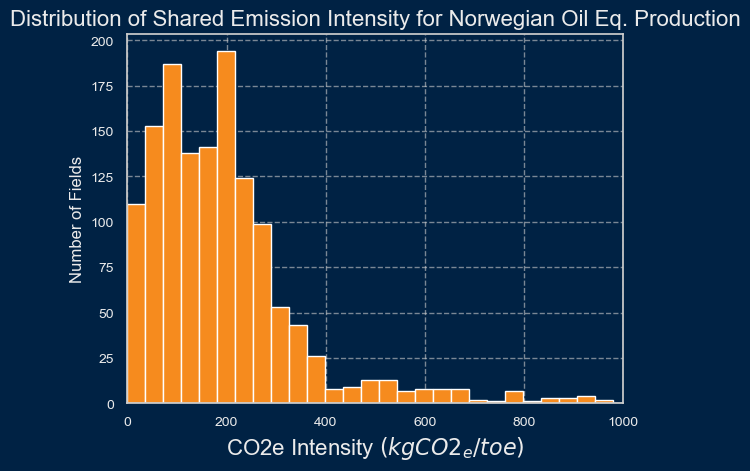

In [98]:
# Plotting the distribution of the share_intensity_tco2e/toe_gwp100

data = fields_prod_emissions_1997_2023_dist_df[
    (fields_prod_emissions_1997_2023_dist_df["share_intensity_tco2e/toe_gwp100"] > 0)
    & (
        fields_prod_emissions_1997_2023_dist_df["share_intensity_tco2e/toe_gwp100"]
        < 2000
    )
]

# Call hist function

plot = plot_distribution(
    data["share_intensity_tco2e/toe_gwp100"],
    "Distribution of Shared Emission Intensity for Norwegian Oil Eq. Production",
    "CO2e Intensity $(kgCO2_e/toe)$",
    "Number of Fields",
    0,
    2000,
)

plot.show()

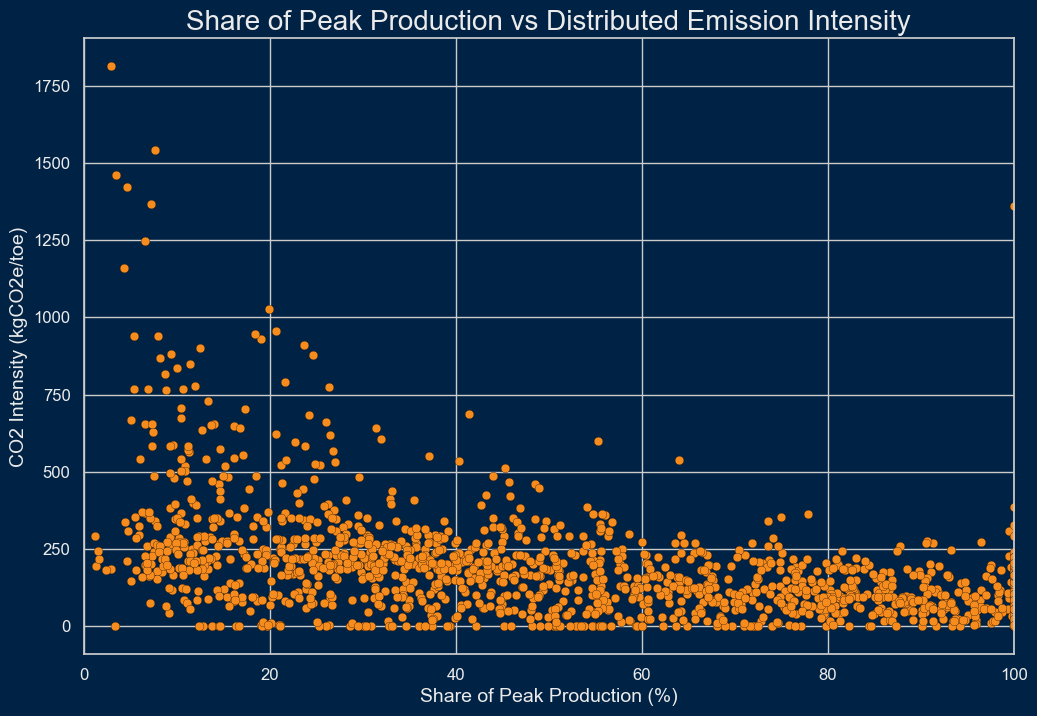

In [99]:
# Scatter plot of the share of production and the share CO2 intensity

plot = plot_scatter(
    fields_prod_emissions_1997_2023_dist_df,
    x="share_peak_prod",
    y="share_intensity_tco2e/toe_gwp100",
    title="Share of Peak Production vs Distributed Emission Intensity",
    x_label="Share of Peak Production (%)",
    y_label="CO2 Intensity (kgCO2e/toe)",
)

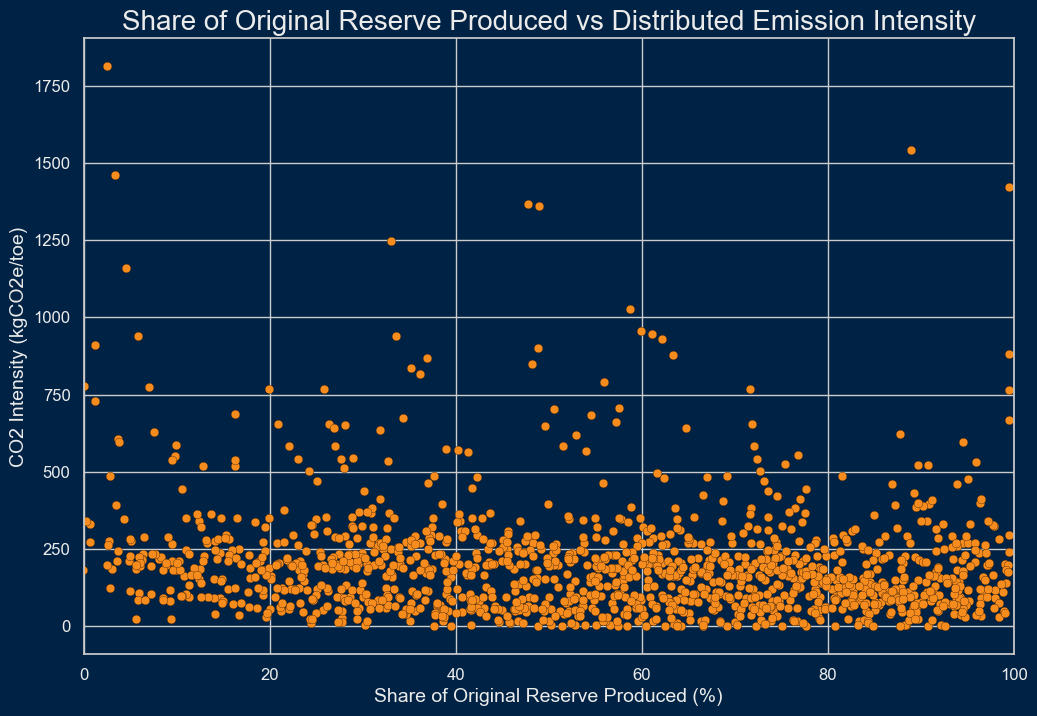

In [100]:
# Plotting the scatter of Share of Original Reserve Produced and the Share CO2 Intensity

plot = plot_scatter(
    data=data,
    x="share_reserve_of_original_reserve",
    y="share_intensity_tco2e/toe_gwp100",
    title="Share of Original Reserve Produced vs Distributed Emission Intensity",
    x_label="Share of Original Reserve Produced (%)",
    y_label="CO2 Intensity (kgCO2e/toe)",
)

### Data Analysis: Explorative Data Analysis


#### Production EDA


##### General Production Statistics


In [101]:
# Ensure all production features are numeric, forcing non-numeric values to NaN
emission_features = [
    "yearly_co2_emissions_1000_tonnes",
    "yearly_tco2e_prod_share_emissions",
    "yearly_tco2e_gwp100",
]

production_features = [
    "net_oil_prod_yearly_mill_sm3",
    "net_gas_prod_yearly_bill_sm3",
    "net_ngl_prod_yearly_mill_sm3",
    "net_condensate_prod_yearly_mill_sm3",
    "net_oil_eq_prod_yearly_mill_sm3",
    "produced_water_yearly_mill_sm3",
]

production_features_volatility = [
    "net_oil_prod_monthly_sm3_volatility",
    "net_gas_prod_monthly_sm3_volatility",
    "net_ngl_prod_monthly_sm3_volatility",
    "net_condensate_prod_monthly_sm3_volatility",
    "net_oil_eq_prod_monthly_sm3_volatility",
    "produced_water_in_field_volatility",
]


# General statistics for production features
production_stats = fields_prod_emissions_1997_2023_df[production_features].describe()
production_stats_volatility = fields_prod_emissions_1997_2023_df[
    production_features_volatility
].describe()
display(production_stats)
display(production_stats_volatility)

net_oil_prod_yearly_mill_sm3  net_gas_prod_yearly_bill_sm3  \
count                   1771.000000                   1771.000000   
mean                       1.884638                      1.426253   
std                        3.413316                      4.326138   
min                        0.000000                      0.000000   
25%                        0.099210                      0.000240   
50%                        0.589360                      0.123530   
75%                        2.164780                      0.798895   
max                       41.289190                     39.784210   

       net_ngl_prod_yearly_mill_sm3  net_condensate_prod_yearly_mill_sm3  \
count                   1771.000000                          1771.000000   
mean                       0.225906                             0.064572   
std                        0.511383                             0.318943   
min                        0.000000                             0.000000   
25%                        0.000000                             0.000000   
50%                        0.022040                             0.000000   
75%                        0.189860                             0.000000   
max                        5.070350                             4.329010   

       net_oil_eq_prod_yearly_mill_sm3  produced_water_yearly_mill_sm3  
count                      1771.000000                     1771.000000  
mean                          3.601358                        2.202234  
std                           6.458177                        4.802091  
min                           0.000000                        0.000000  
25%                           0.326260                        0.007060  
50%                           1.320840                        0.255580  
75%                           4.065360                        2.080305  
max                          48.502120                       38.966800

net_oil_prod_monthly_sm3_volatility  \
count                          1771.000000   
mean                              0.027135   
std                               0.045065   
min                               0.000000   
25%                               0.002671   
50%                               0.011546   
75%                               0.033902   
max                               0.832296   

       net_gas_prod_monthly_sm3_volatility  \
count                          1771.000000   
mean                              0.029570   
std                               0.093216   
min                               0.000000   
25%                               0.000033   
50%                               0.003736   
75%                               0.016356   
max                               1.037163   

       net_ngl_prod_monthly_sm3_volatility  \
count                          1771.000000   
mean                              0.004557   
std                               0.009164   
min                               0.000000   
25%                               0.000000   
50%                               0.000663   
75%                               0.004706   
max                               0.089582   

       net_condensate_prod_monthly_sm3_volatility  \
count                                 1771.000000   
mean                                     0.001435   
std                                      0.007681   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      0.119442   

       net_oil_eq_prod_monthly_sm3_volatility  \
count                             1771.000000   
mean                                 0.058264   
std                                  0.109220   
min                                  0.000000   
25%                                  0.007581   
50%                                  0.023288   
75%                                  0.062769   
max                                  1.108930   

       produced_water_in_field_volatility  
count                         1771.000000  
mean                             0.031877  
std                              0.059563  
min                              0.000000  
25%                              0.000308  
50%                              0.006680  
75%                              0.036770  
max                              0.442994

#### Histograms for Production Data


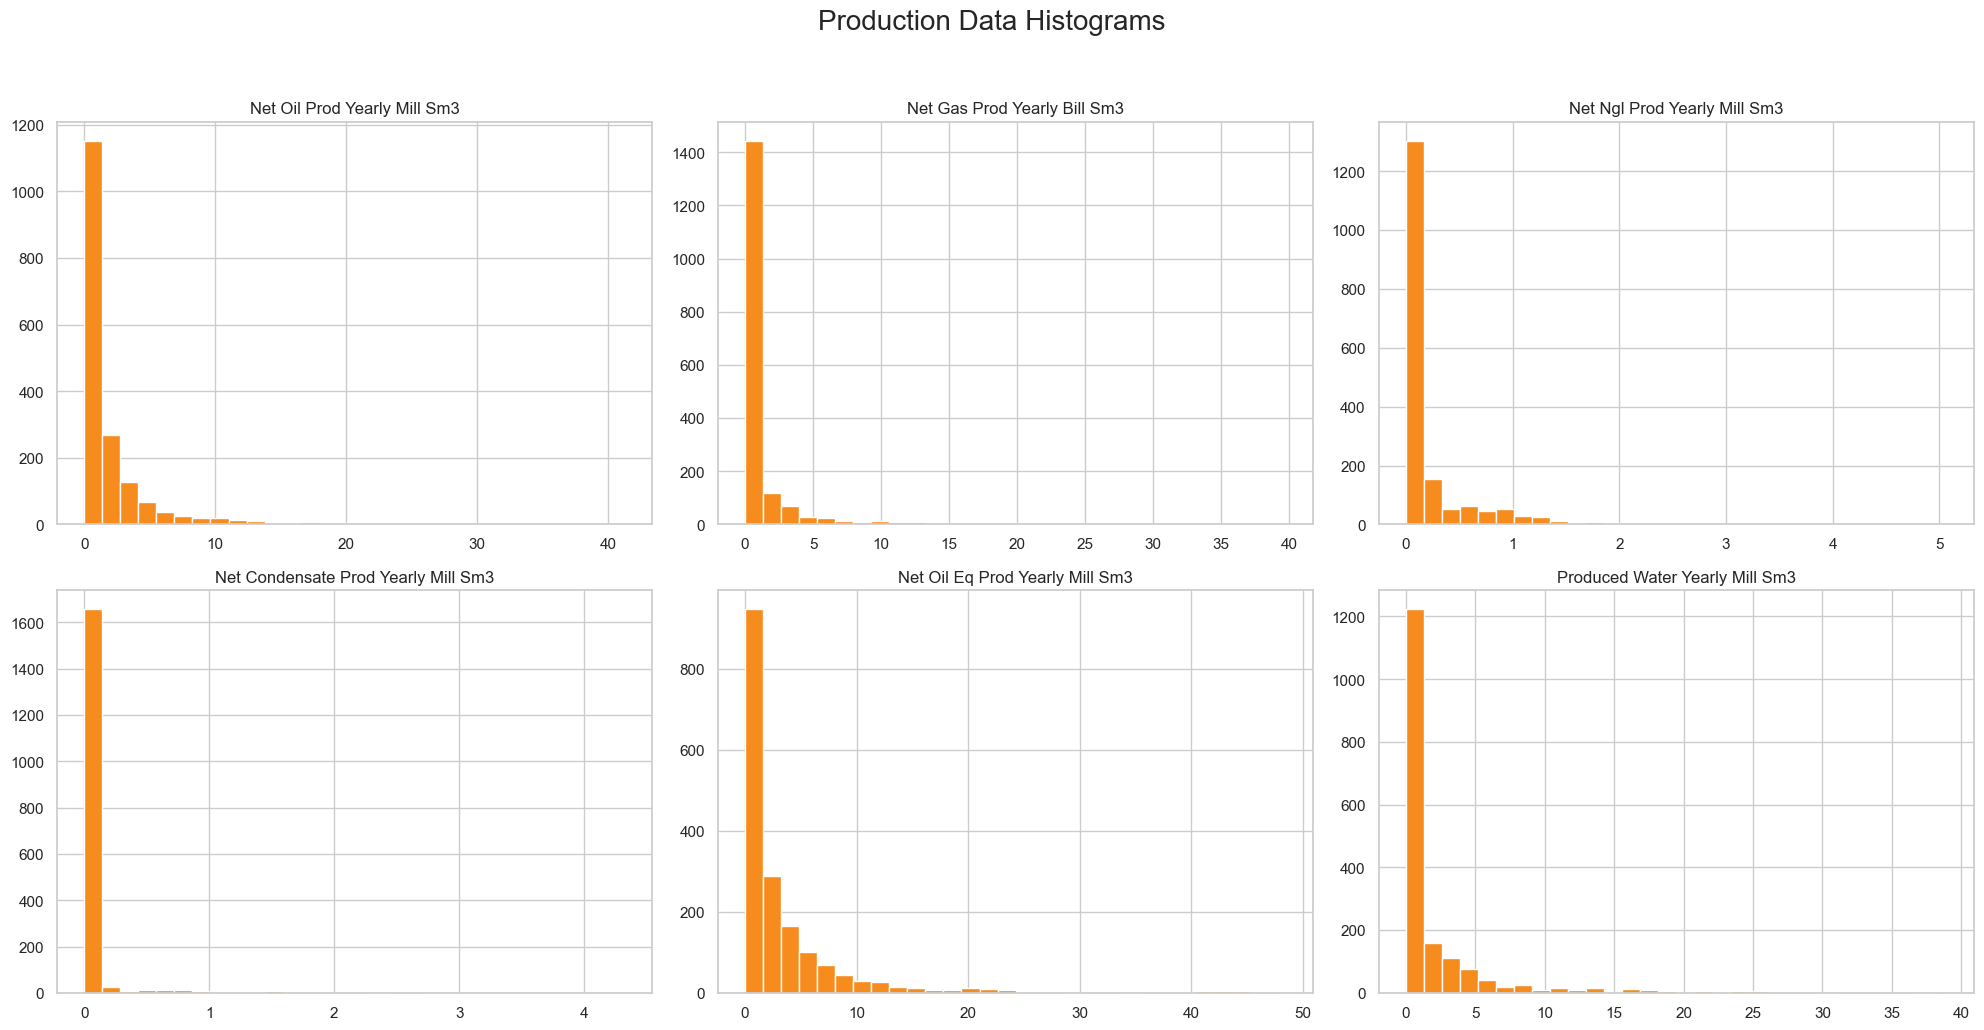

In [102]:
# Function to create a grid of histograms
def plot_histograms(df, features, title, bins=30):
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features, 1):
        # if under 3 features - 1 row, 3 columns
        # if under 6 features - 2 rows, 3 columns
        # if under 9 features - 3 rows, 3 columns
        # if under 12 features - 3 rows, 4 columns
        cols = 3
        rows = 3
        if len(features) < 3:
            rows = 1
            cols = 3
        elif len(features) < 6:
            rows = 2
            cols = 3
        elif len(features) < 9:
            rows = 3
            cols = 3
        else:
            rows = (len(features) + 3) // 4
            cols = 4
        plt.subplot(rows, cols, i)
        df[feature].hist(bins=bins, edgecolor="white", color=line_1_color)
        # Convert title to title case and remove underscores
        feature = feature.replace("_", " ").title()
        plt.title(feature)
        plt.xlabel("")
        plt.ylabel("")

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()


# Plot histograms for production features
plot_histograms(
    fields_prod_emissions_1997_2023_df,
    production_features,
    "Production Data Histograms",
)

In [103]:
# Printing number of observations for each field
fields_prod_emissions_1997_2023_df["field_id"].value_counts().sum()

1771

#### Histograms for Production Volatility Data


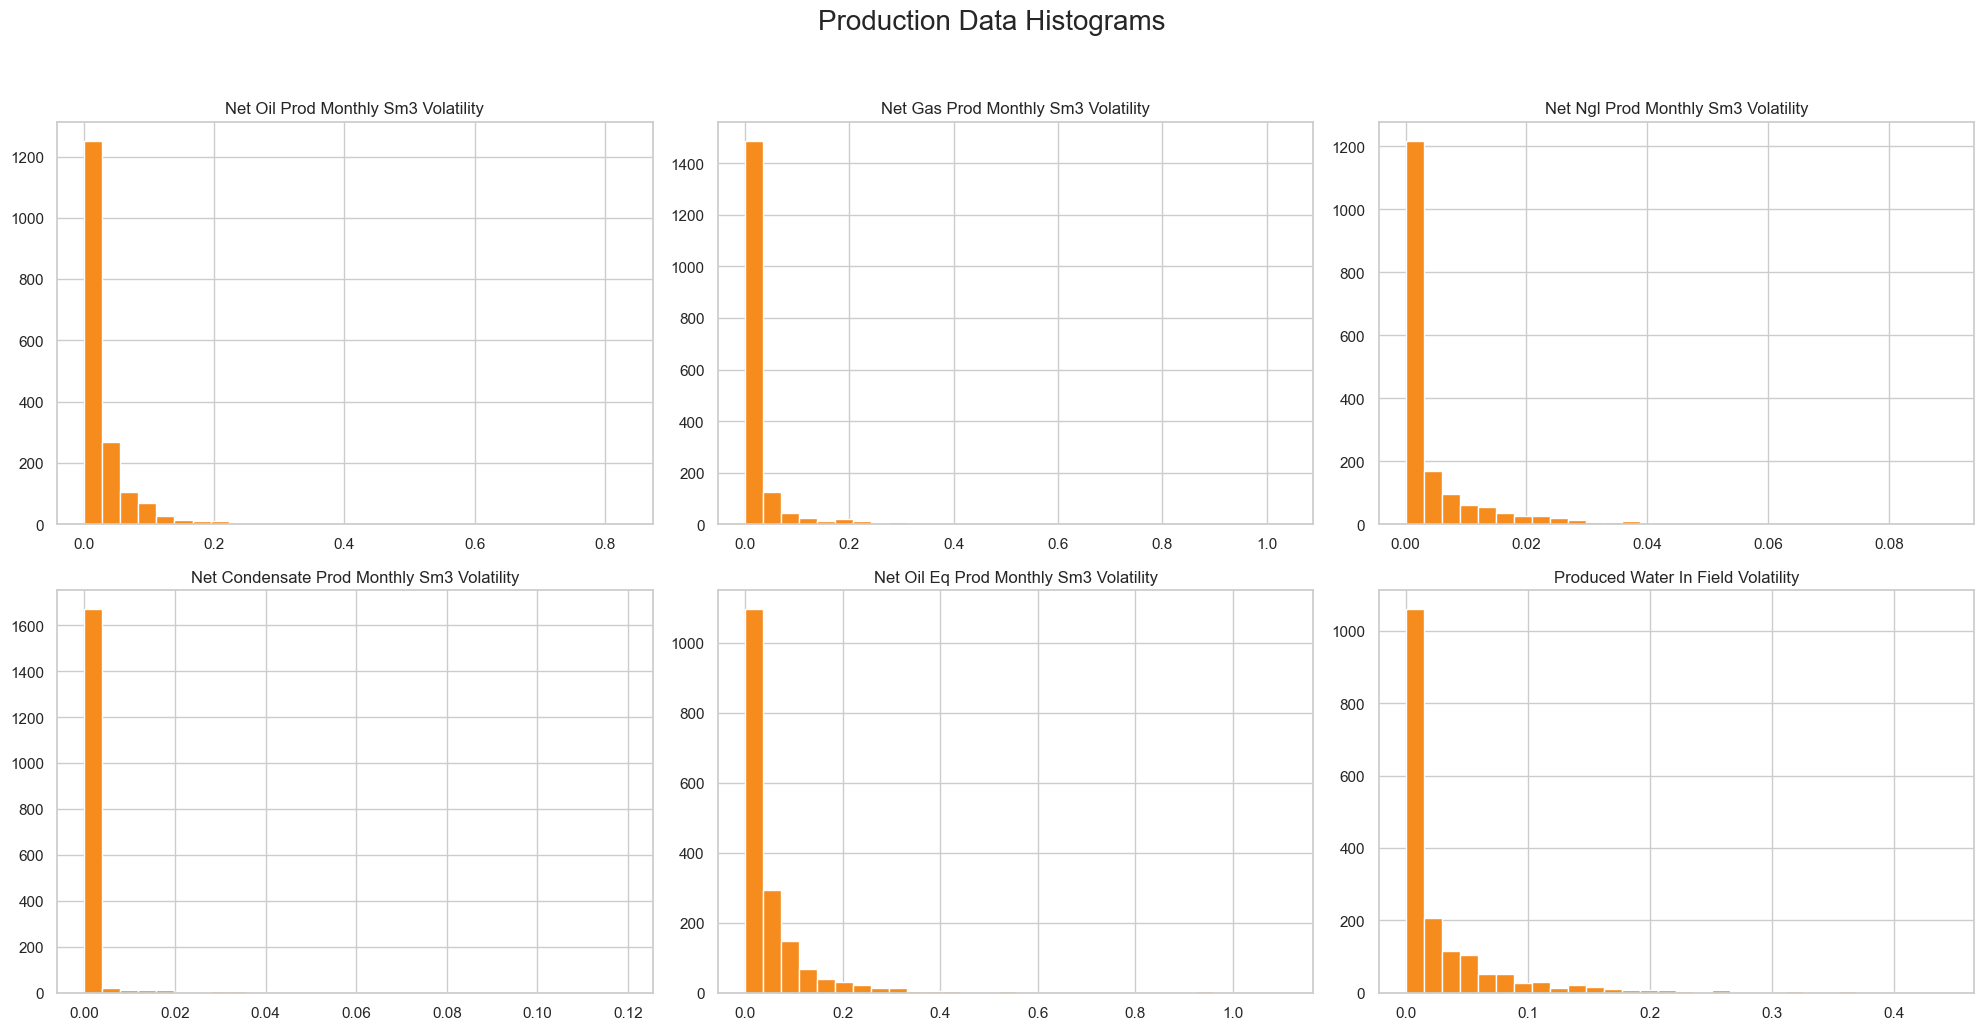

In [104]:
# Plot histograms for production features volatility

# Plot histograms for production features
plot_histograms(
    fields_prod_emissions_1997_2023_df,
    production_features_volatility,
    "Production Data Histograms",
)

#### Scatter Plot and Correlation Matrix of Production Data


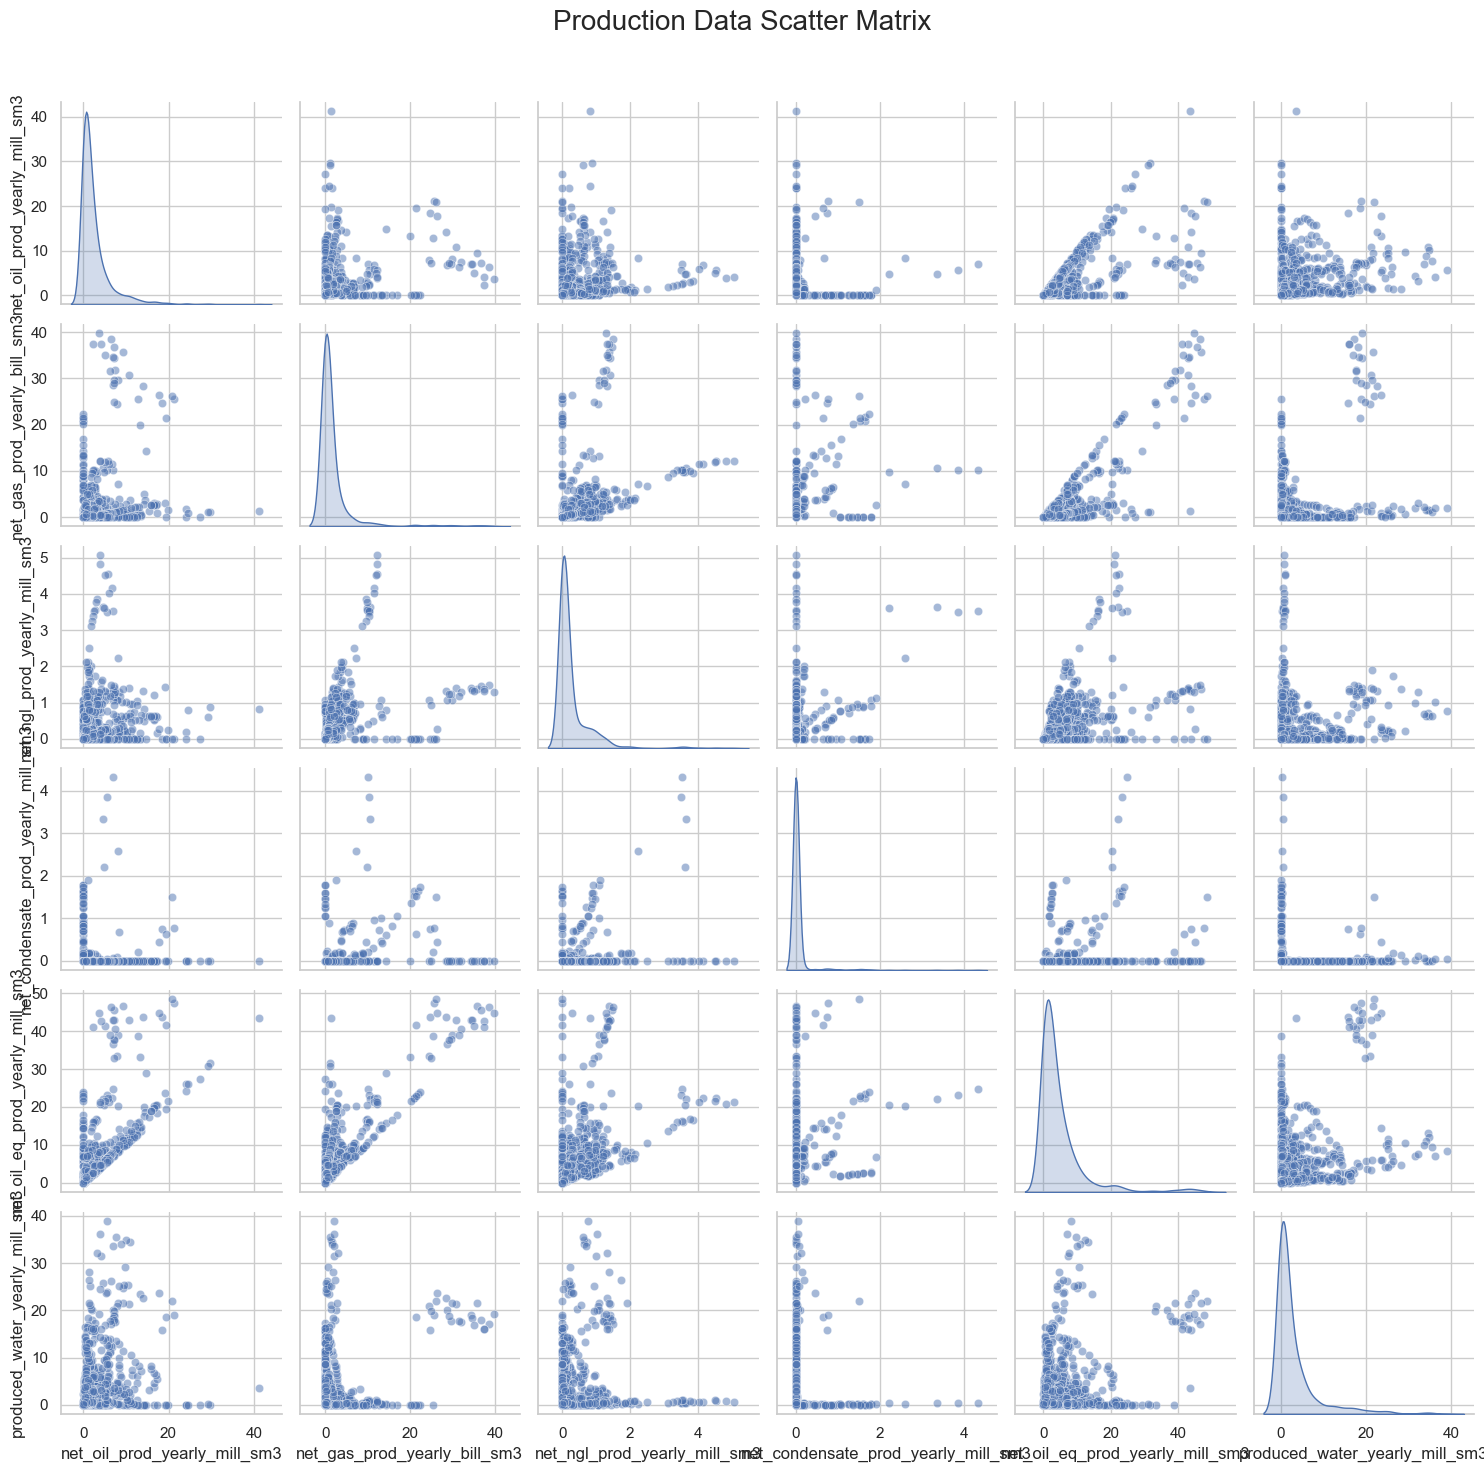

In [105]:
# Drop rows with NaN values in production features
cleaned_production_df = fields_prod_emissions_1997_2023_df[
    production_features + emission_features
].dropna()


# Function to create scatter plot matrix
def plot_scatter_matrix(df, features, title):
    sns.pairplot(df[features], diag_kind="kde", plot_kws={"alpha": 0.5})
    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Plot scatter matrix for production features
plot_scatter_matrix(
    cleaned_production_df, production_features, "Production Data Scatter Matrix"
)

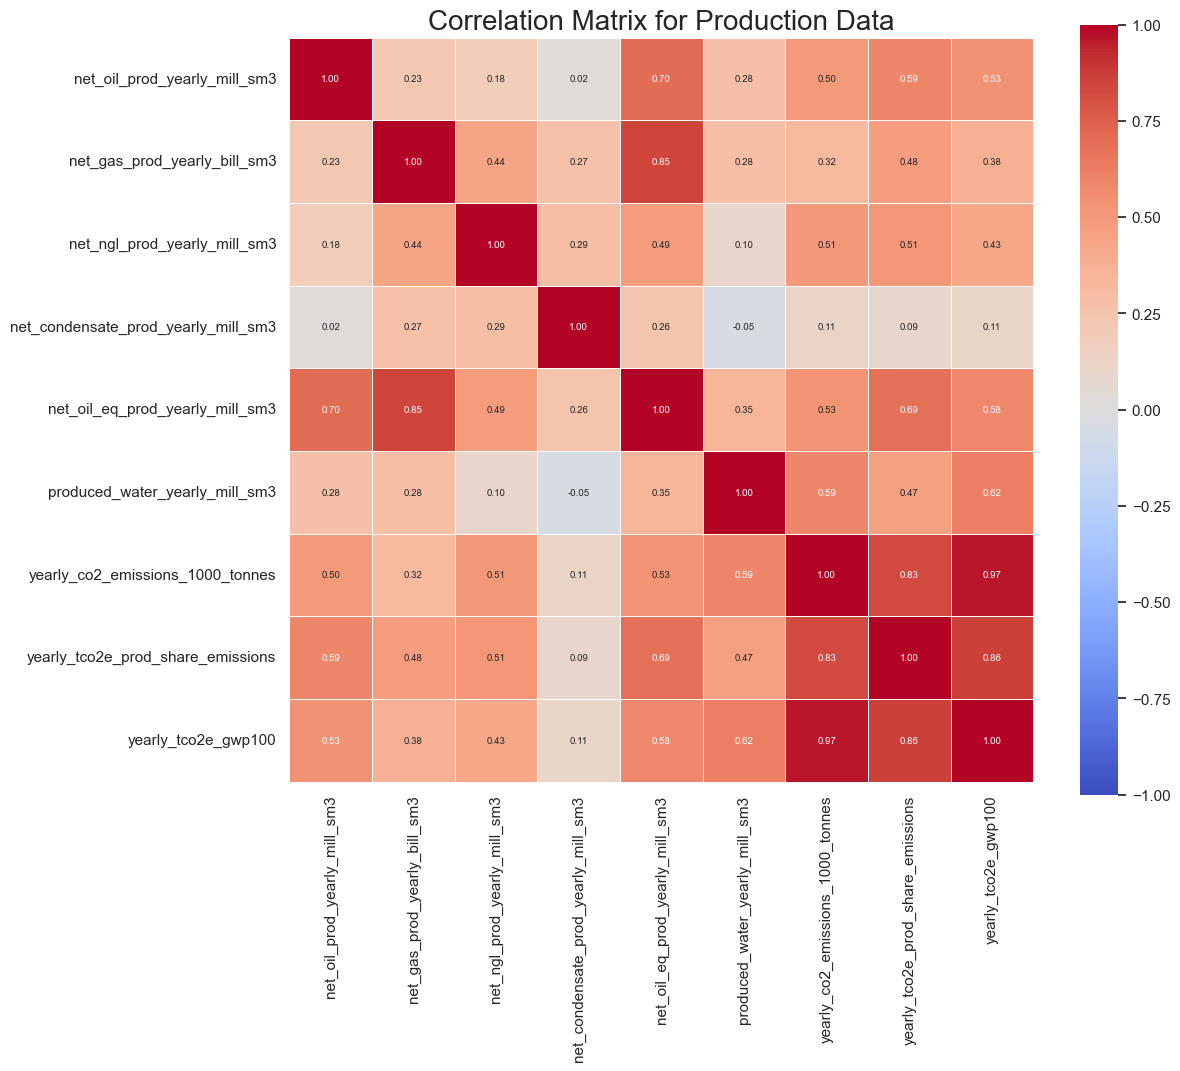

In [106]:
# Compute the correlation matrix for production features
correlation_matrix = cleaned_production_df.corr()


# Function to plot correlation matrix
def plot_correlation_matrix(corr_matrix, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        square=True,
        linewidths=0.5,
        annot_kws={"size": 7},
        fmt=".2f",
    )
    plt.title(title, fontsize=20)
    plt.show()


# Plot the correlation matrix for production features
plot_correlation_matrix(correlation_matrix, "Correlation Matrix for Production Data")

#### Scatter Plot and Correlation Matrix of Production Volatility Data


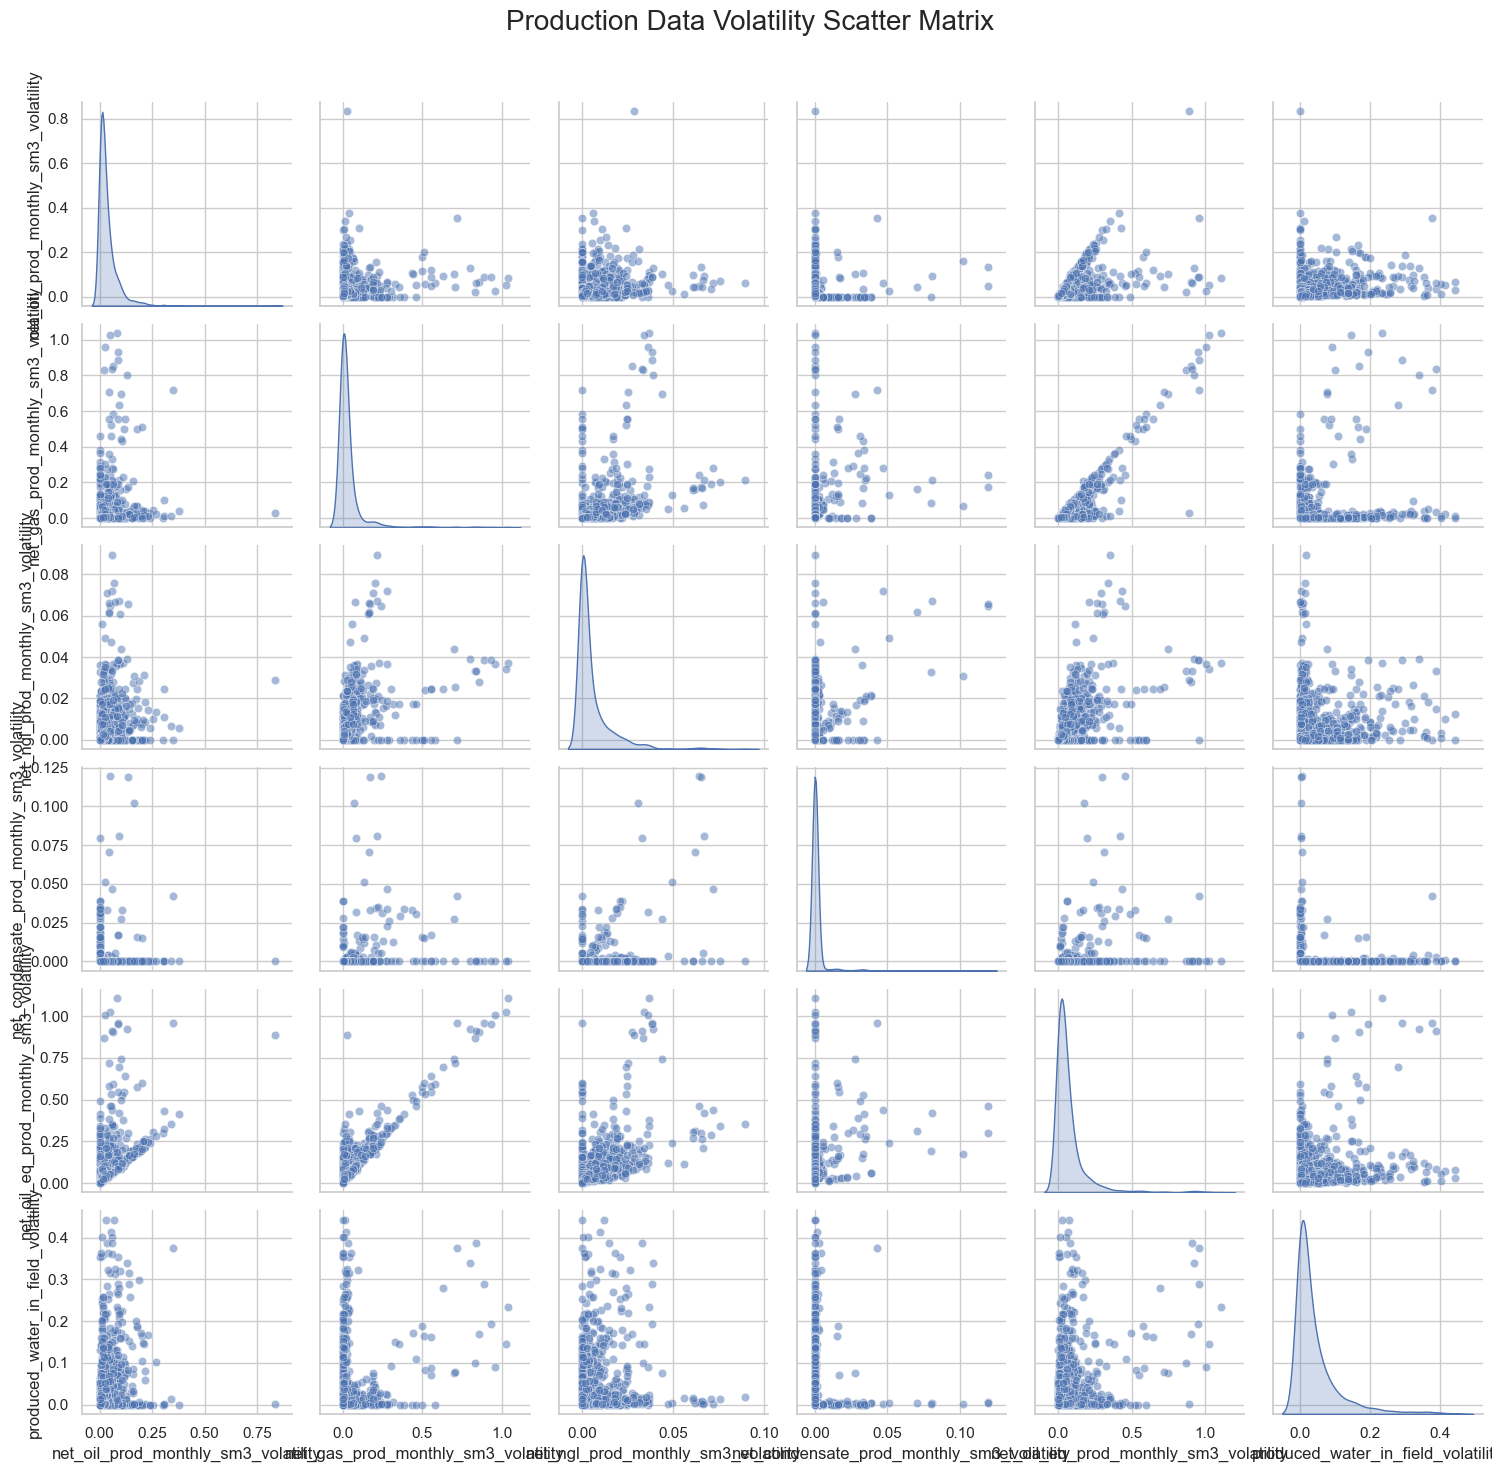

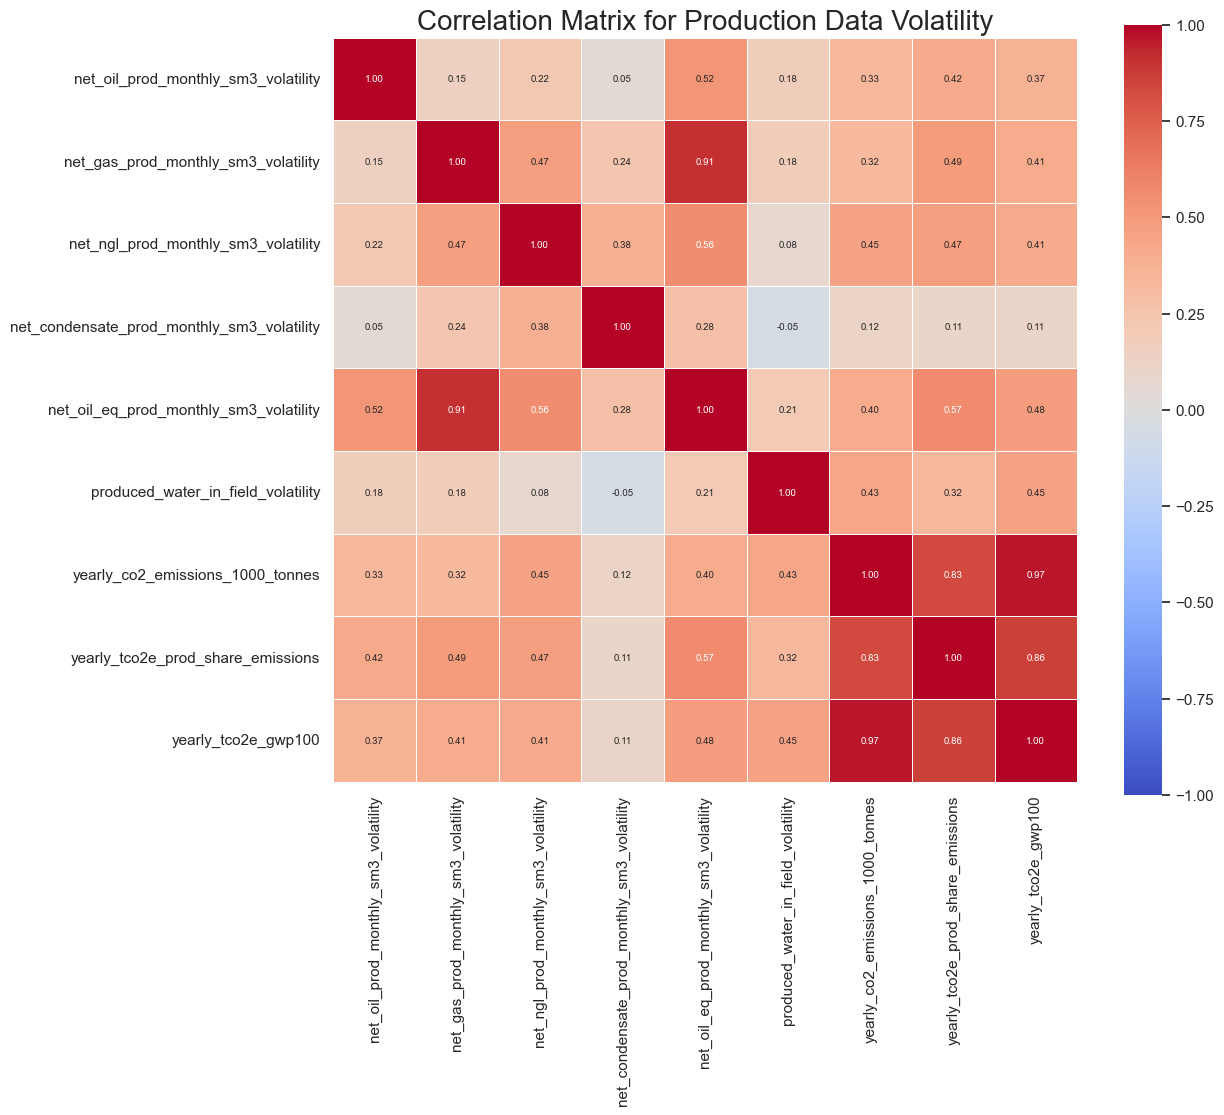

In [107]:
# Plotting the scatter plot and correlation matrix for production features volatility

# Drop rows with NaN values in production features
cleaned_production_volatility_df = fields_prod_emissions_1997_2023_df[
    production_features_volatility + emission_features
].dropna()

# Plot scatter matrix for production features volatility
plot_scatter_matrix(
    cleaned_production_volatility_df,
    production_features_volatility,
    "Production Data Volatility Scatter Matrix",
)

# Compute the correlation matrix for production features volatility
correlation_matrix_volatility = cleaned_production_volatility_df.corr()

# Plot the correlation matrix for production features volatility
plot_correlation_matrix(
    correlation_matrix_volatility,
    "Correlation Matrix for Production Data Volatility",
)

### Emissions EDA


In [109]:
# Define Emission Data features

emission_features = [
    "yearly_tco2e_gwp100",
    "yearly_co2_emissions_1000_tonnes",
    "yearly_tco2e_prod_share_emissions",
    "share_intensity_tco2e/toe_gwp100",
]


# General statistics for emission features
emission_stats = fields_prod_emissions_1997_2023_df[emission_features].describe()
emission_stats

yearly_tco2e_gwp100  yearly_co2_emissions_1000_tonnes  \
count         1.203000e+03                       1203.000000   
mean          5.279056e+05                        231.775728   
std           6.509383e+05                        286.645797   
min           0.000000e+00                          0.000000   
25%           8.457955e+04                         19.830716   
50%           3.307536e+05                        152.977539   
75%           6.114372e+05                        288.002724   
max           4.337941e+06                       1860.344868   

       yearly_tco2e_prod_share_emissions  share_intensity_tco2e/toe_gwp100  
count                       1.740000e+03                       1719.000000  
mean                        3.644436e+05                        427.284445  
std                         4.926170e+05                       6820.987805  
min                         0.000000e+00                          0.000000  
25%                         4.817823e+04                         71.095514  
50%                         1.756212e+05                        164.416427  
75%                         4.512751e+05                        256.895334  
max                         4.262262e+06                     280769.954718

#### Emission Correlation Matrix and Scatter Plot


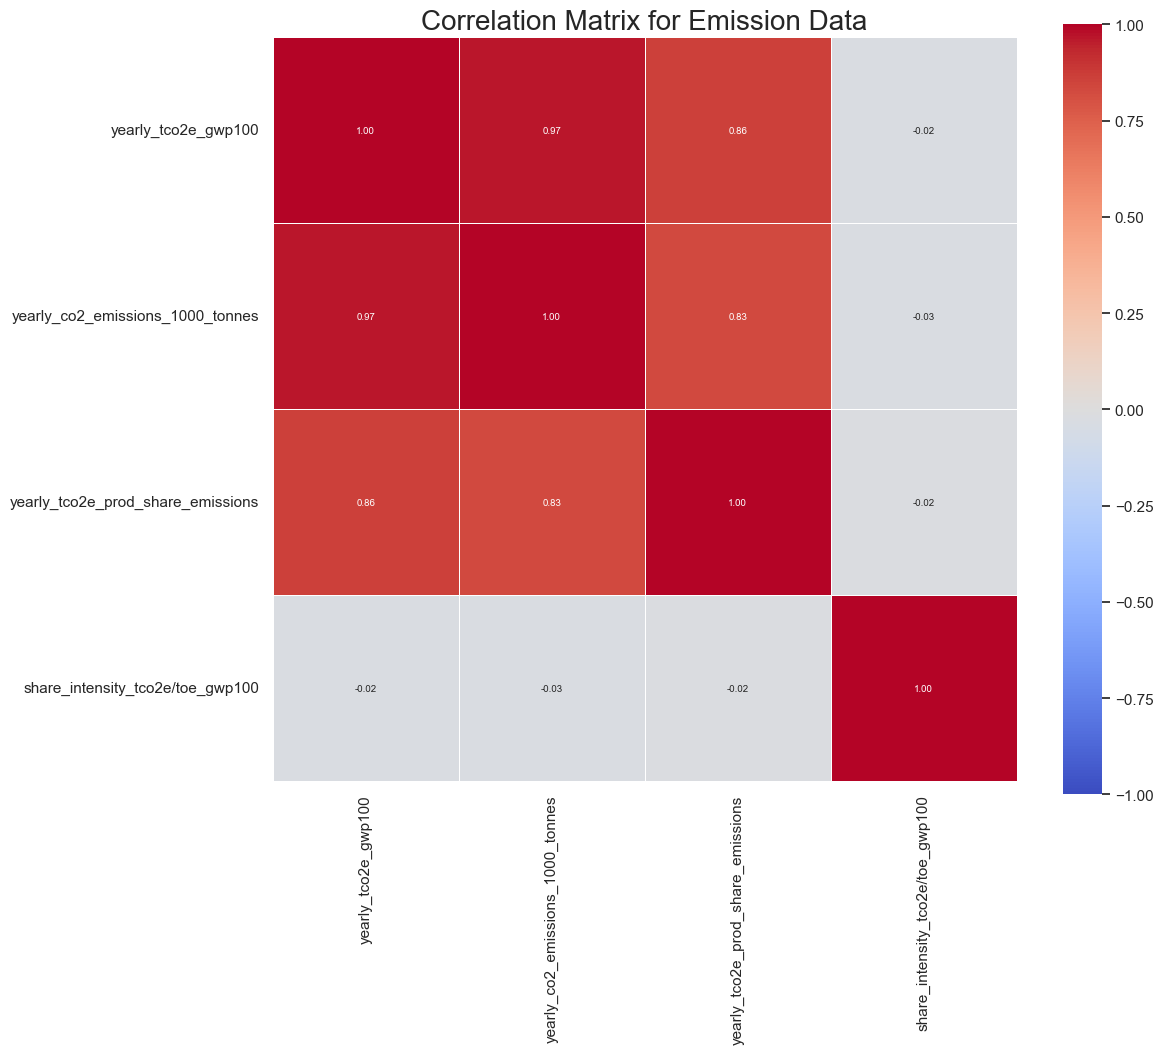

In [110]:
# Drop rows with NaN values in emission features
cleaned_emission_df = fields_prod_emissions_1997_2023_df[emission_features].dropna()

# Compute the correlation matrix for emission features
emission_corr_matrix = cleaned_emission_df.corr()

# Plot the correlation matrix for emission features
plot_correlation_matrix(emission_corr_matrix, "Correlation Matrix for Emission Data")

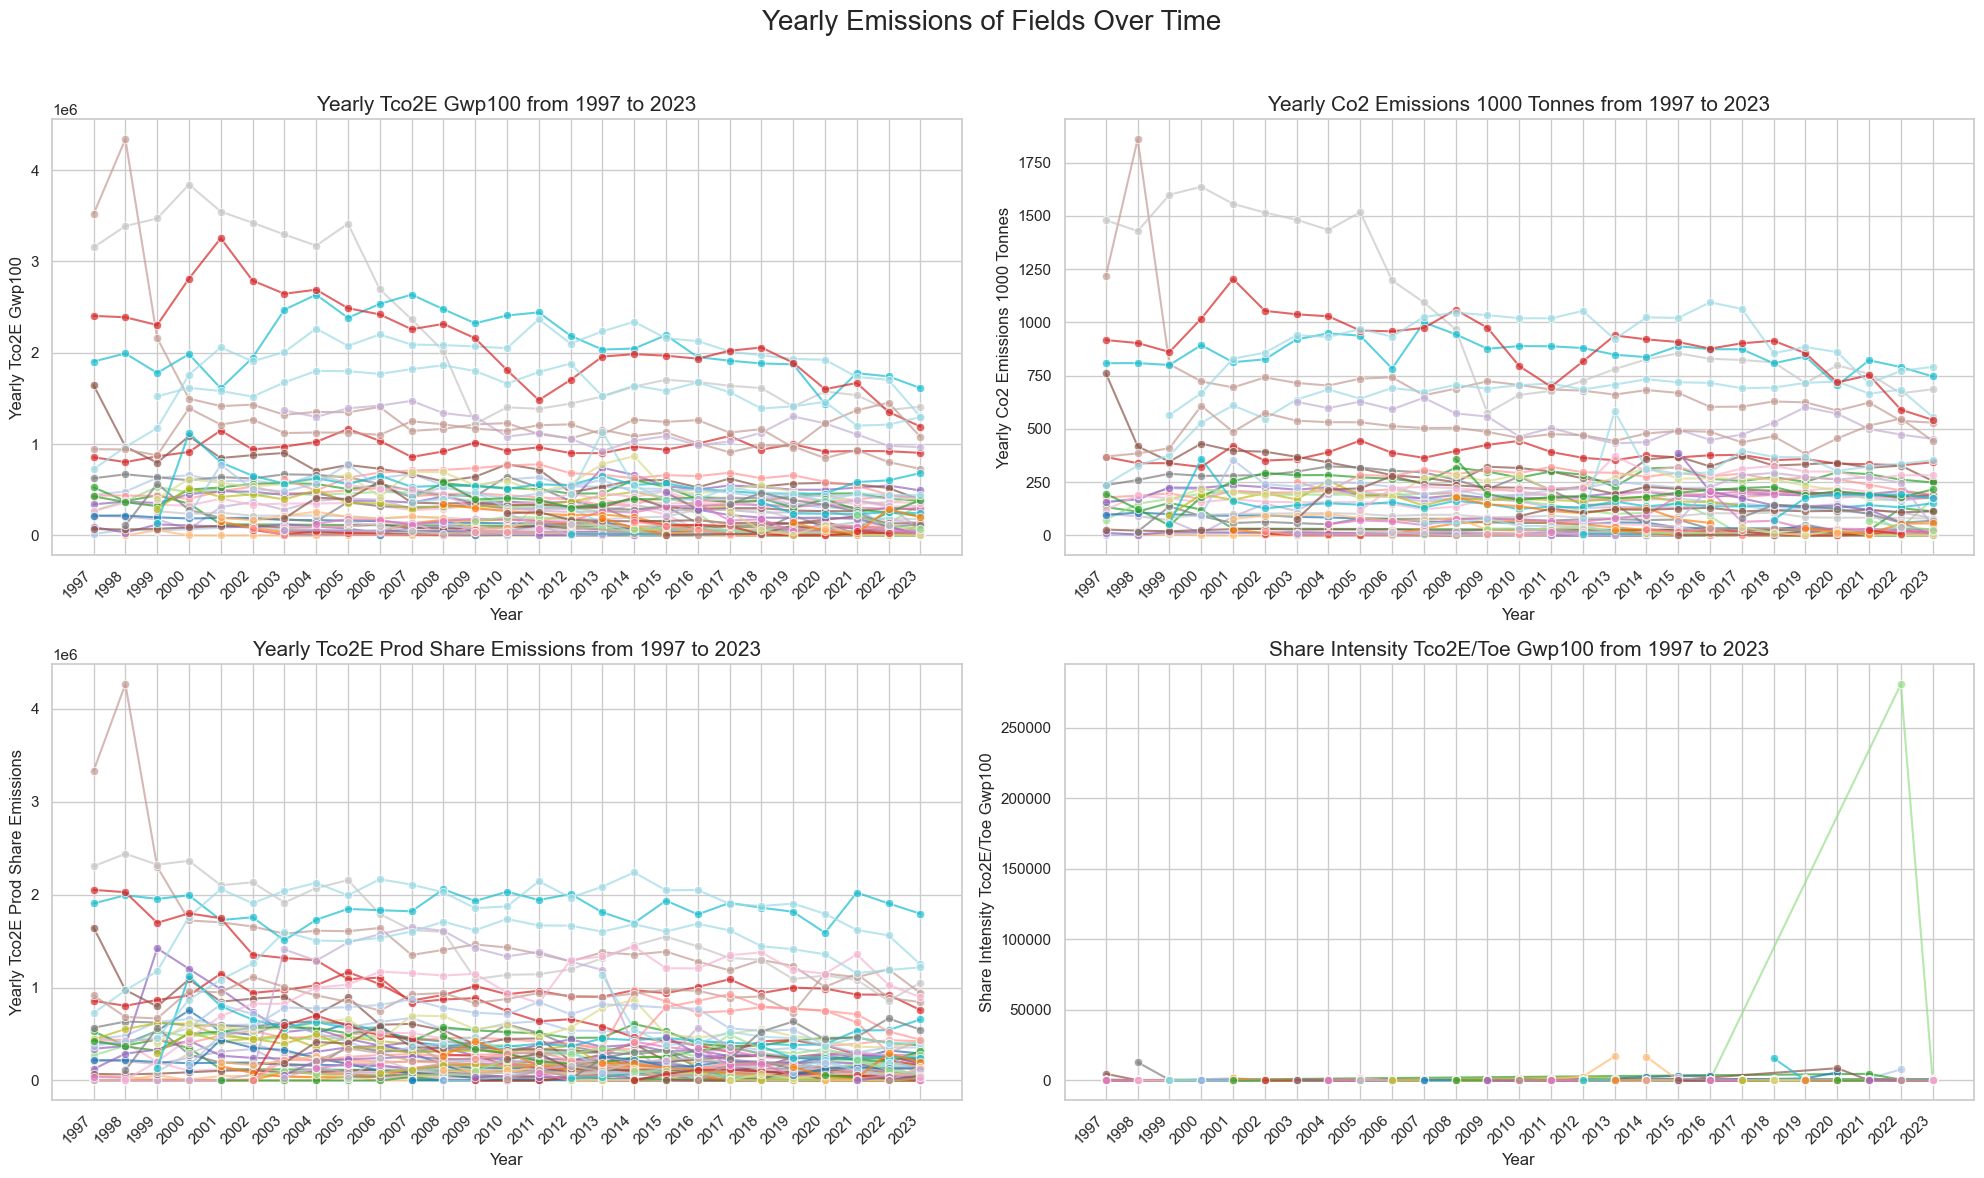

In [111]:
def plot_fields_emissions_over_time(df, features, title="Fields Emissions Over Time"):
    """
    Plots line diagrams for multiple features over time.

    Parameters:
    - df: DataFrame containing the data
    - features: List of features to plot
    - title: Title of the plot
    """
    # Set up the color palette
    num_colors = len(df["field"].unique())
    palette = sns.color_palette("tab20", num_colors)

    num_features = len(features)
    cols = 1 if num_features == 1 else 2
    rows = (num_features + 1) // 2

    plt.figure(figsize=(cols * 10, rows * 6))

    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.lineplot(
            data=df,
            x="year",
            y=feature,
            hue="field",
            palette=palette,
            marker="o",
            alpha=0.7,
            legend=False,
        )
        # Convert title to title case and remove underscores
        feature = feature.replace("_", " ").title()
        plt.title(f"{feature} from 1997 to 2023", fontsize=15)
        # Show every year on the x-axis
        plt.xticks(df["year"].unique())
        plt.xticks(rotation=45, ha="right")
        plt.xlabel("Year", fontsize=12)
        # remove underscore from the feature y label
        plt.ylabel(feature.replace("_", " ").title(), fontsize=12)
        # plt.ylabel("Emissions (1000 tonnes)", fontsize=12)
        plt.grid(True)

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Example usage
plot_fields_emissions_over_time(
    fields_prod_emissions_1997_2023_df,
    emission_features,
    title="Yearly Emissions of Fields Over Time",
)

### Facility and Field Characteristics EDA


In [112]:
# Define Facility and Field Characteristics features
facility_features = [
    "facilities_lifetime_mean",
    "facilities_water_depth_mean",
    "subsea_facilites_shut_down",
    "surface_facilites_shut_down",
    "subsea_facilites_in_service",
    "surface_facilites_in_service",
    "well_final_vertical_depth_mean",
    "well_water_depth_mean",
    "electrified",
    "years_electrified",
    "electricity_mw",
]

cols_with_well_status = [
    col for col in fields_prod_emissions_1997_2023_df if "well_status_" in col
]

cols_with_well_purpose = [
    col for col in fields_prod_emissions_1997_2023_df if "well_purpose_" in col
]

cols_with_facility_kind = [
    col for col in fields_prod_emissions_1997_2023_df if "kind" in col
]

# General statistics for facility features
facility_stats = fields_prod_emissions_1997_2023_df[facility_features].describe()
facility_stats

facilities_lifetime_mean  facilities_water_depth_mean  \
count               1281.000000                  1343.000000   
mean                  23.729261                   217.012067   
std                    6.116829                   151.086901   
min                   13.909091                    65.000000   
25%                   20.000000                   106.444444   
50%                   21.750000                   168.000000   
75%                   27.042857                   322.928571   
max                   50.000000                  1282.666667   

       subsea_facilites_shut_down  surface_facilites_shut_down  \
count                 1771.000000                       1771.0   
mean                     0.012987                          0.0   
std                      0.169248                          0.0   
min                      0.000000                          0.0   
25%                      0.000000                          0.0   
50%                      0.000000                          0.0   
75%                      0.000000                          0.0   
max                      4.000000                          0.0   

       subsea_facilites_in_service  surface_facilites_in_service  \
count                  1771.000000                   1771.000000   
mean                     17.212874                      2.031056   
std                      70.448036                      4.915058   
min                       0.000000                      0.000000   
25%                       0.000000                      0.000000   
50%                       1.000000                      0.000000   
75%                       7.000000                      2.000000   
max                     727.000000                     38.000000   

       well_final_vertical_depth_mean  well_water_depth_mean  electrified  \
count                     1771.000000            1771.000000  1771.000000   
mean                      2953.958933             198.665140     0.086957   
std                        784.444386             142.351240     0.281851   
min                        852.000000              58.150000     0.000000   
25%                       2466.500000             101.000000     0.000000   
50%                       2893.000000             134.571429     0.000000   
75%                       3434.166667             309.000000     0.000000   
max                       4899.000000            1286.500000     1.000000   

       years_electrified  electricity_mw  
count        1771.000000     1771.000000  
mean            1.549972        6.915302  
std             4.939082       30.358213  
min             0.000000        0.000000  
25%             0.000000        0.000000  
50%             0.000000        0.000000  
75%             0.000000        0.000000  
max            27.000000      200.000000

In [113]:
# Printing cols_with_well_status, cols_with_well_purpose, cols_with_facility_kind, facility_features and the list constituents

print("Well Status Columns:")
print(cols_with_well_status)
print("\nWell Purpose Columns:")
print(cols_with_well_purpose)
print("\nFacility Kind Columns:")
print(cols_with_facility_kind)

Well Status Columns:
['well_status_closed', 'well_status_drilling', 'well_status_injecting', 'well_status_junked', 'well_status_online/operational', 'well_status_p&a', 'well_status_plugged', 'well_status_producing', 'well_status_suspended']

Well Purpose Columns:
['well_purpose_injection', 'well_purpose_observation', 'well_purpose_production']

Facility Kind Columns:
['facility_kind_multi well template', 'facility_kind_single well template', 'facility_kind_offshore wind turbine', 'facility_kind_subsea structure', 'facility_kind_fpso', 'facility_kind_jacket 8 legs', 'facility_kind_condeep monoshaft', 'facility_kind_loading system', 'facility_kind_jacket 4 legs', 'facility_kind_jacket tripod', 'facility_kind_fsu', 'facility_kind_semisub steel', 'facility_kind_condeep 4 shafts', 'facility_kind_landfall', 'facility_kind_tlp concrete', 'facility_kind_jack-up 3 legs', 'facility_kind_jacket 6 legs', 'facility_kind_tlp steel', 'facility_kind_semisub concrete', 'facility_kind_mopustor', 'facili

####


In [114]:
# Drop rows with NaN values in facility features
cleaned_facility_with_emissions_df = fields_prod_emissions_1997_2023_df[
    facility_features + emission_features
].dropna()

In [115]:
# Plot scatter matrix for facility features
plot_scatter_matrix(
    cleaned_facility_with_emissions_df,
    facility_features,
    "Facility and Field Characteristics Scatter Matrix",
)

In [116]:
# Plot correlation matrix for facility kind features

corr_df = fields_prod_emissions_1997_2023_df[
    cols_with_facility_kind + emission_features
].dropna()

plot_correlation_matrix(corr_df.corr(), "Correlation Matrix for Facility Kind Features")

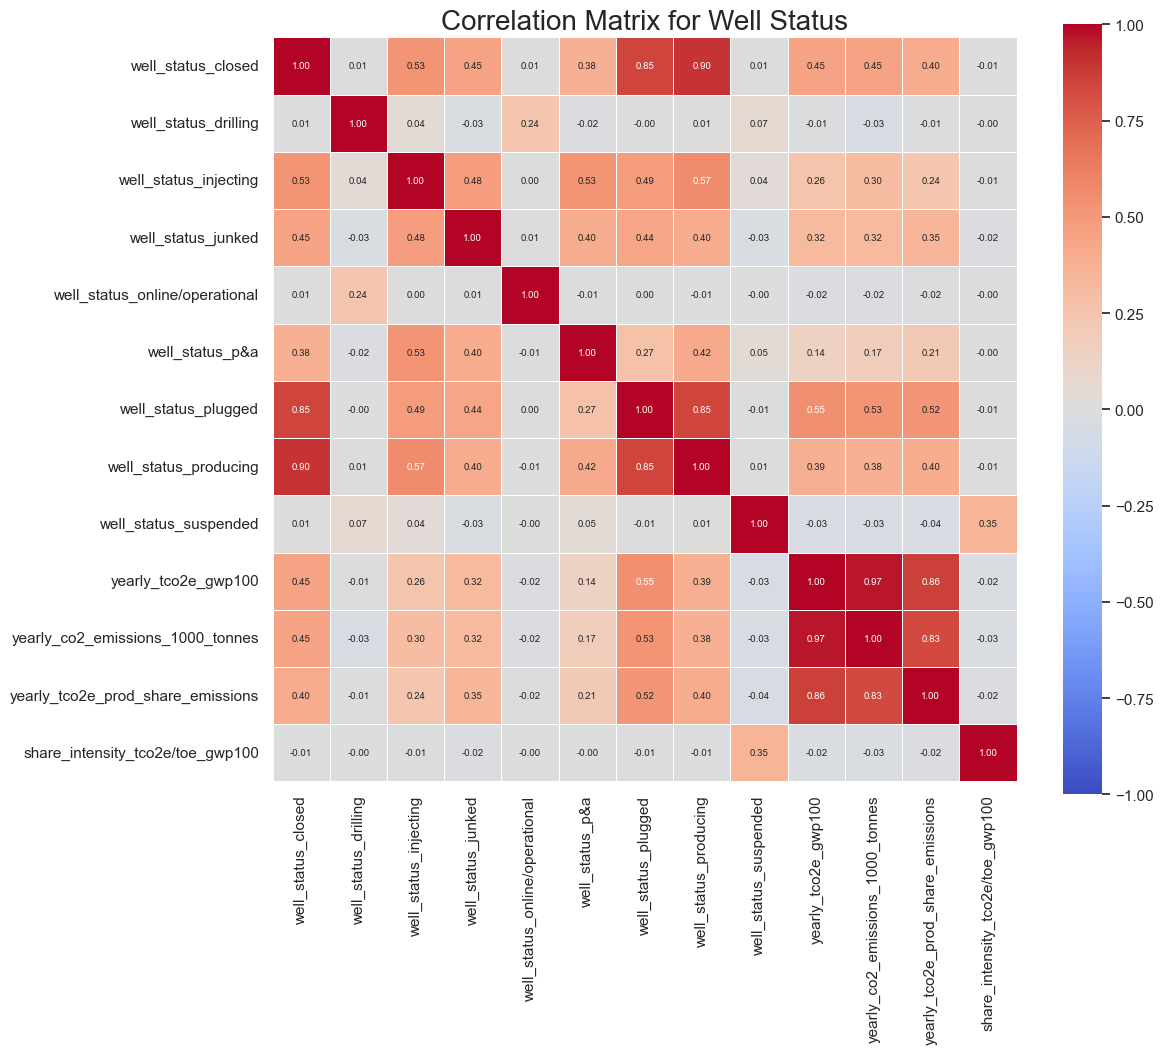

In [117]:
# Plotting well status


corr_df = fields_prod_emissions_1997_2023_df[
    cols_with_well_status + emission_features
].dropna()

plot_correlation_matrix(corr_df.corr(), "Correlation Matrix for Well Status")

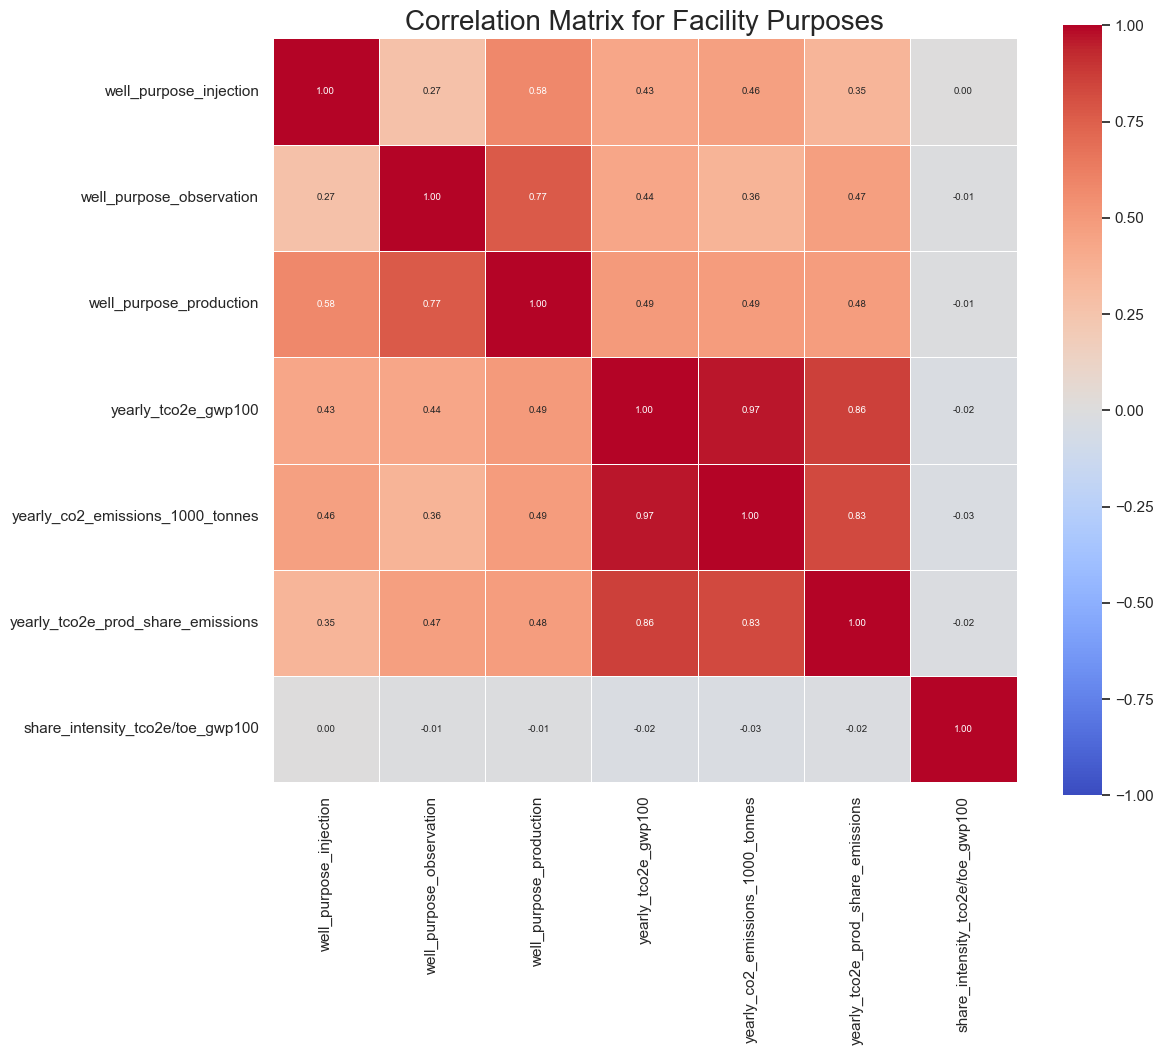

In [118]:
# Plotting well purpose

corr_df = fields_prod_emissions_1997_2023_df[
    cols_with_well_purpose + emission_features
].dropna()

plot_correlation_matrix(corr_df.corr(), "Correlation Matrix for Facility Purposes")

In [119]:
# Plotting corr matrix for facility_features

corr_df = fields_prod_emissions_1997_2023_df[
    facility_features + emission_features
].dropna()

plot_correlation_matrix(corr_df.corr(), "Correlation Matrix, Facility Features")

### Investments EDA


In [120]:
# Define Investments and Recoverables features
investment_features = [
    "investments_mill_nok",
    "future_investments_mill_nok",
    "current_remaining_recoverable_oil",
    "current_remaining_recoverable_gas",
    "current_remaining_recoverable_ngl",
    "current_remaining_recoverable_condensate",
    "current_remaining_recoverable_oe",
    "original_recoverable_oil",
    "original_recoverable_gas",
    "original_recoverable_ngl",
    "original_recoverable_condensate",
    "original_recoverable_oe",
]

# General statistics for investment features
investment_stats = fields_prod_emissions_1997_2023_df[investment_features].describe()
investment_stats

investments_mill_nok  future_investments_mill_nok  \
count           1771.000000                  1771.000000   
mean            1019.337098                  6603.234896   
std             1813.288519                 10827.703840   
min             -171.000000                   -30.000000   
25%                8.500000                     1.000000   
50%              296.000000                   972.000000   
75%             1236.000000                  7447.000000   
max            17537.000000                 48783.000000   

       current_remaining_recoverable_oil  current_remaining_recoverable_gas  \
count                        1764.000000                        1764.000000   
mean                            6.517387                          15.735142   
std                            18.065827                          75.599257   
min                             0.000000                           0.000000   
25%                             0.030000                           0.000000   
50%                             1.300000                           0.320000   
75%                             5.230000                           6.080000   
max                           262.210000                         606.030000   

       current_remaining_recoverable_ngl  \
count                        1764.000000   
mean                            0.670845   
std                             1.446996   
min                             0.000000   
25%                             0.000000   
50%                             0.040000   
75%                             0.640000   
max                             8.050000   

       current_remaining_recoverable_condensate  \
count                               1764.000000   
mean                                   0.140102   
std                                    1.177490   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                   11.820000   

       current_remaining_recoverable_oe  original_recoverable_oil  \
count                       1764.000000               1764.000000   
mean                          23.668186                 73.151559   
std                           79.540068                124.951587   
min                            0.000000                  0.000000   
25%                            0.330000                  4.940000   
50%                            4.110000                 23.140000   
75%                           16.660000                 72.260000   
max                          624.220000                582.980000   

       original_recoverable_gas  original_recoverable_ngl  \
count               1764.000000               1764.000000   
mean                  53.250669                  4.093963   
std                  181.502769                  7.053995   
min                    0.000000                  0.000000   
25%                    1.710000                  0.030000   
50%                    6.200000                  1.390000   
75%                   32.210000                  5.520000   
max                 1436.560000                 42.970000   

       original_recoverable_condensate  original_recoverable_oe  
count                      1764.000000              1764.000000  
mean                          1.737806               135.919461  
std                           5.928955               258.266374  
min                           0.000000                 0.080000  
25%                           0.000000                14.970000  
50%                           0.000000                51.070000  
75%                           0.000000               129.420000  
max                          29.740000              1774.730000

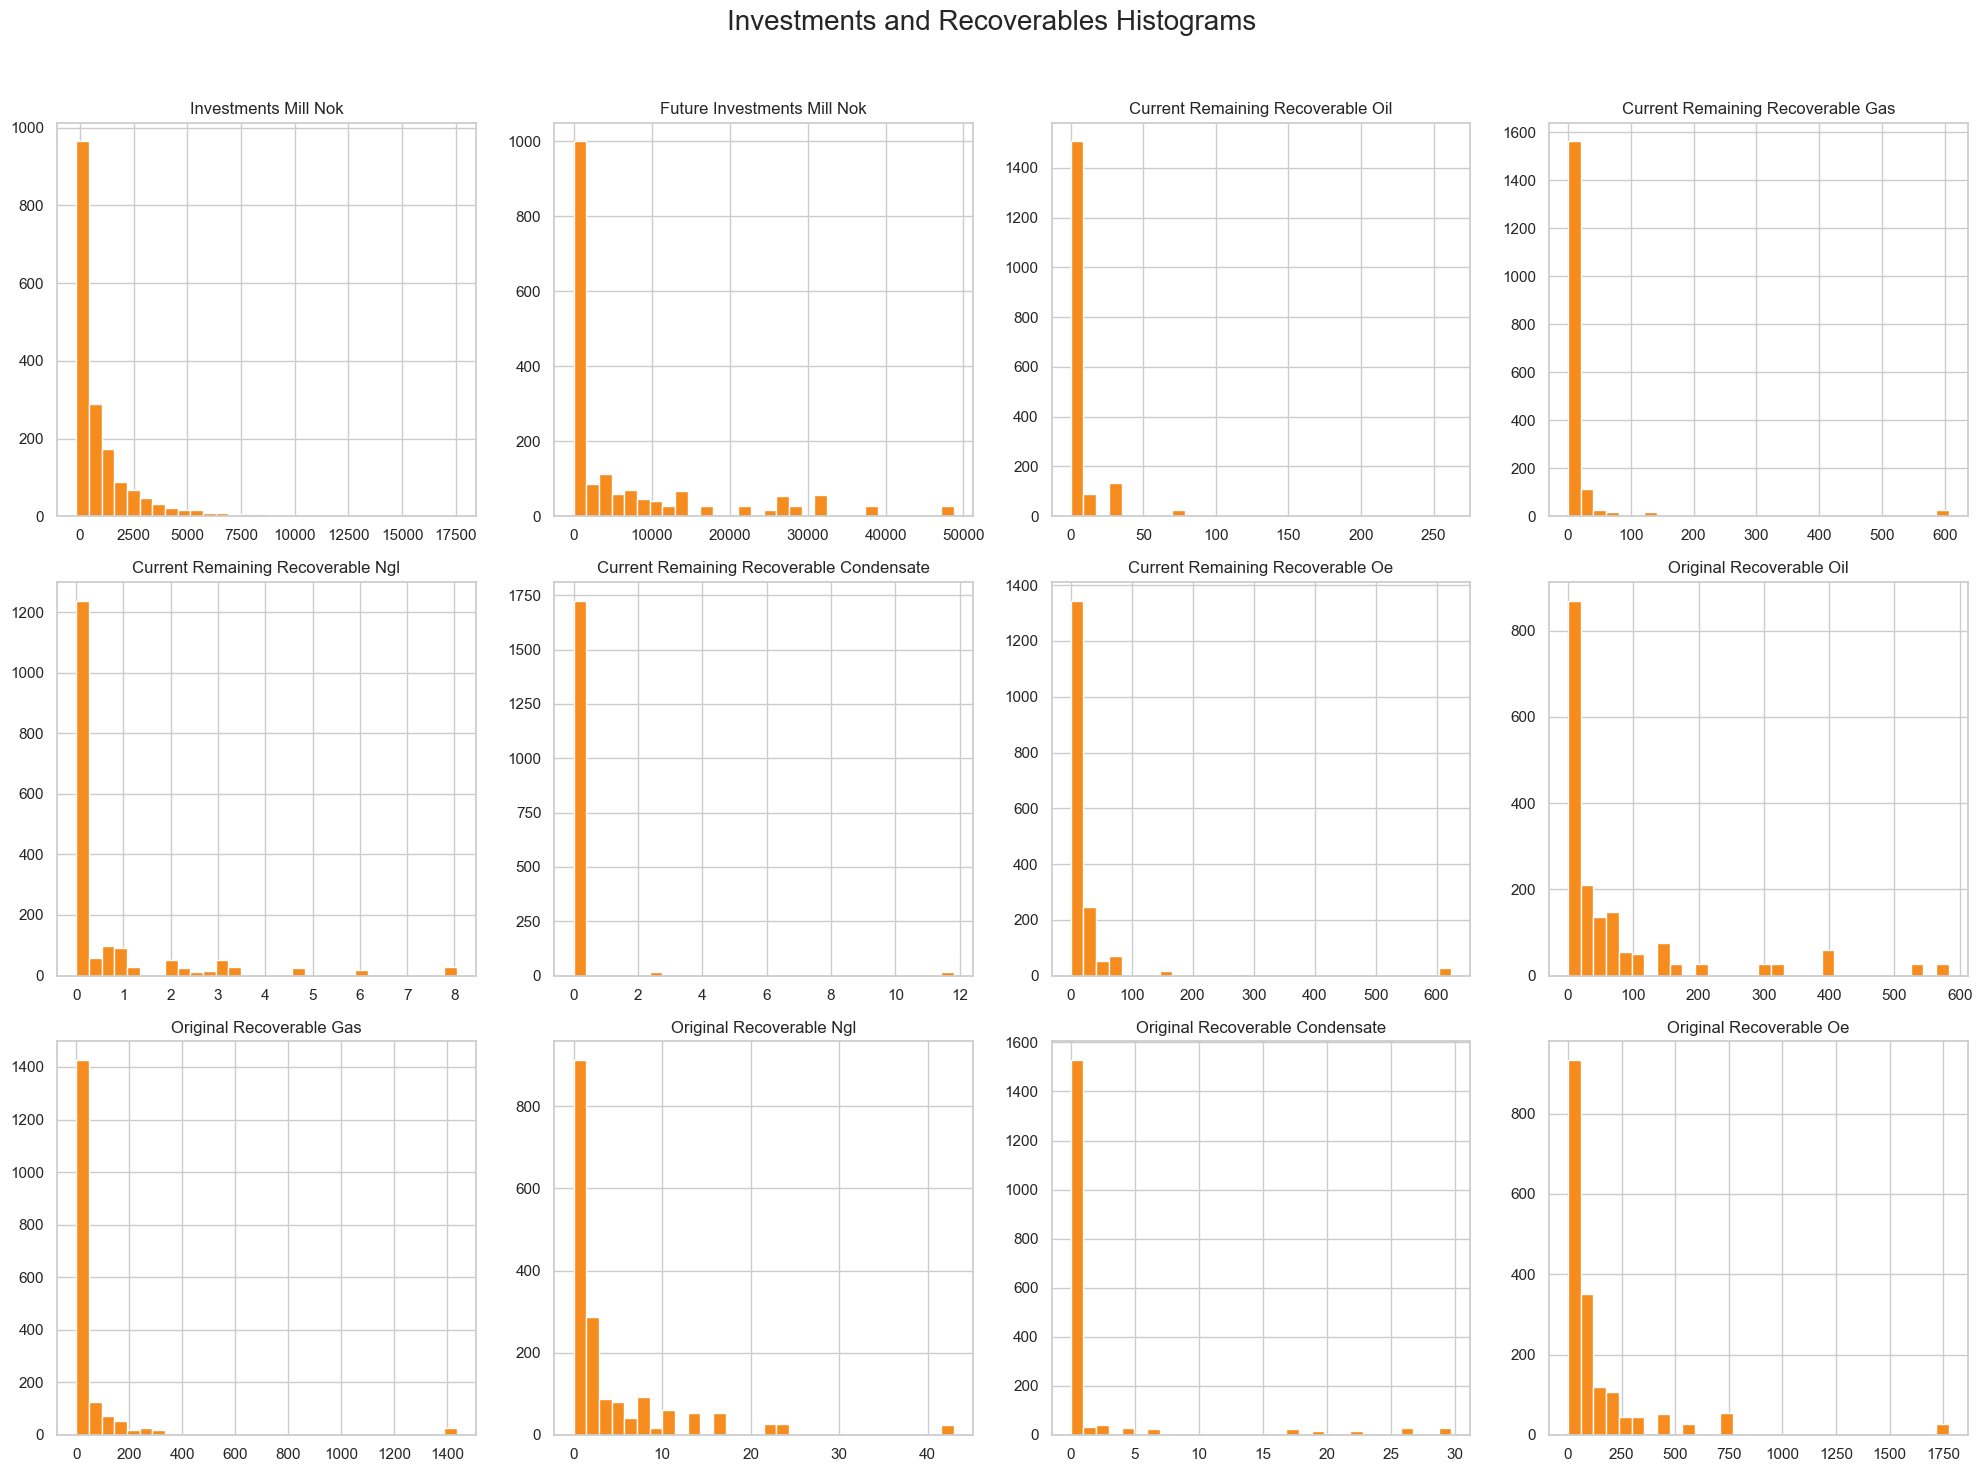

In [121]:
# Plot histograms for investment features
plot_histograms(
    fields_prod_emissions_1997_2023_df,
    investment_features,
    "Investments and Recoverables Histograms",
)

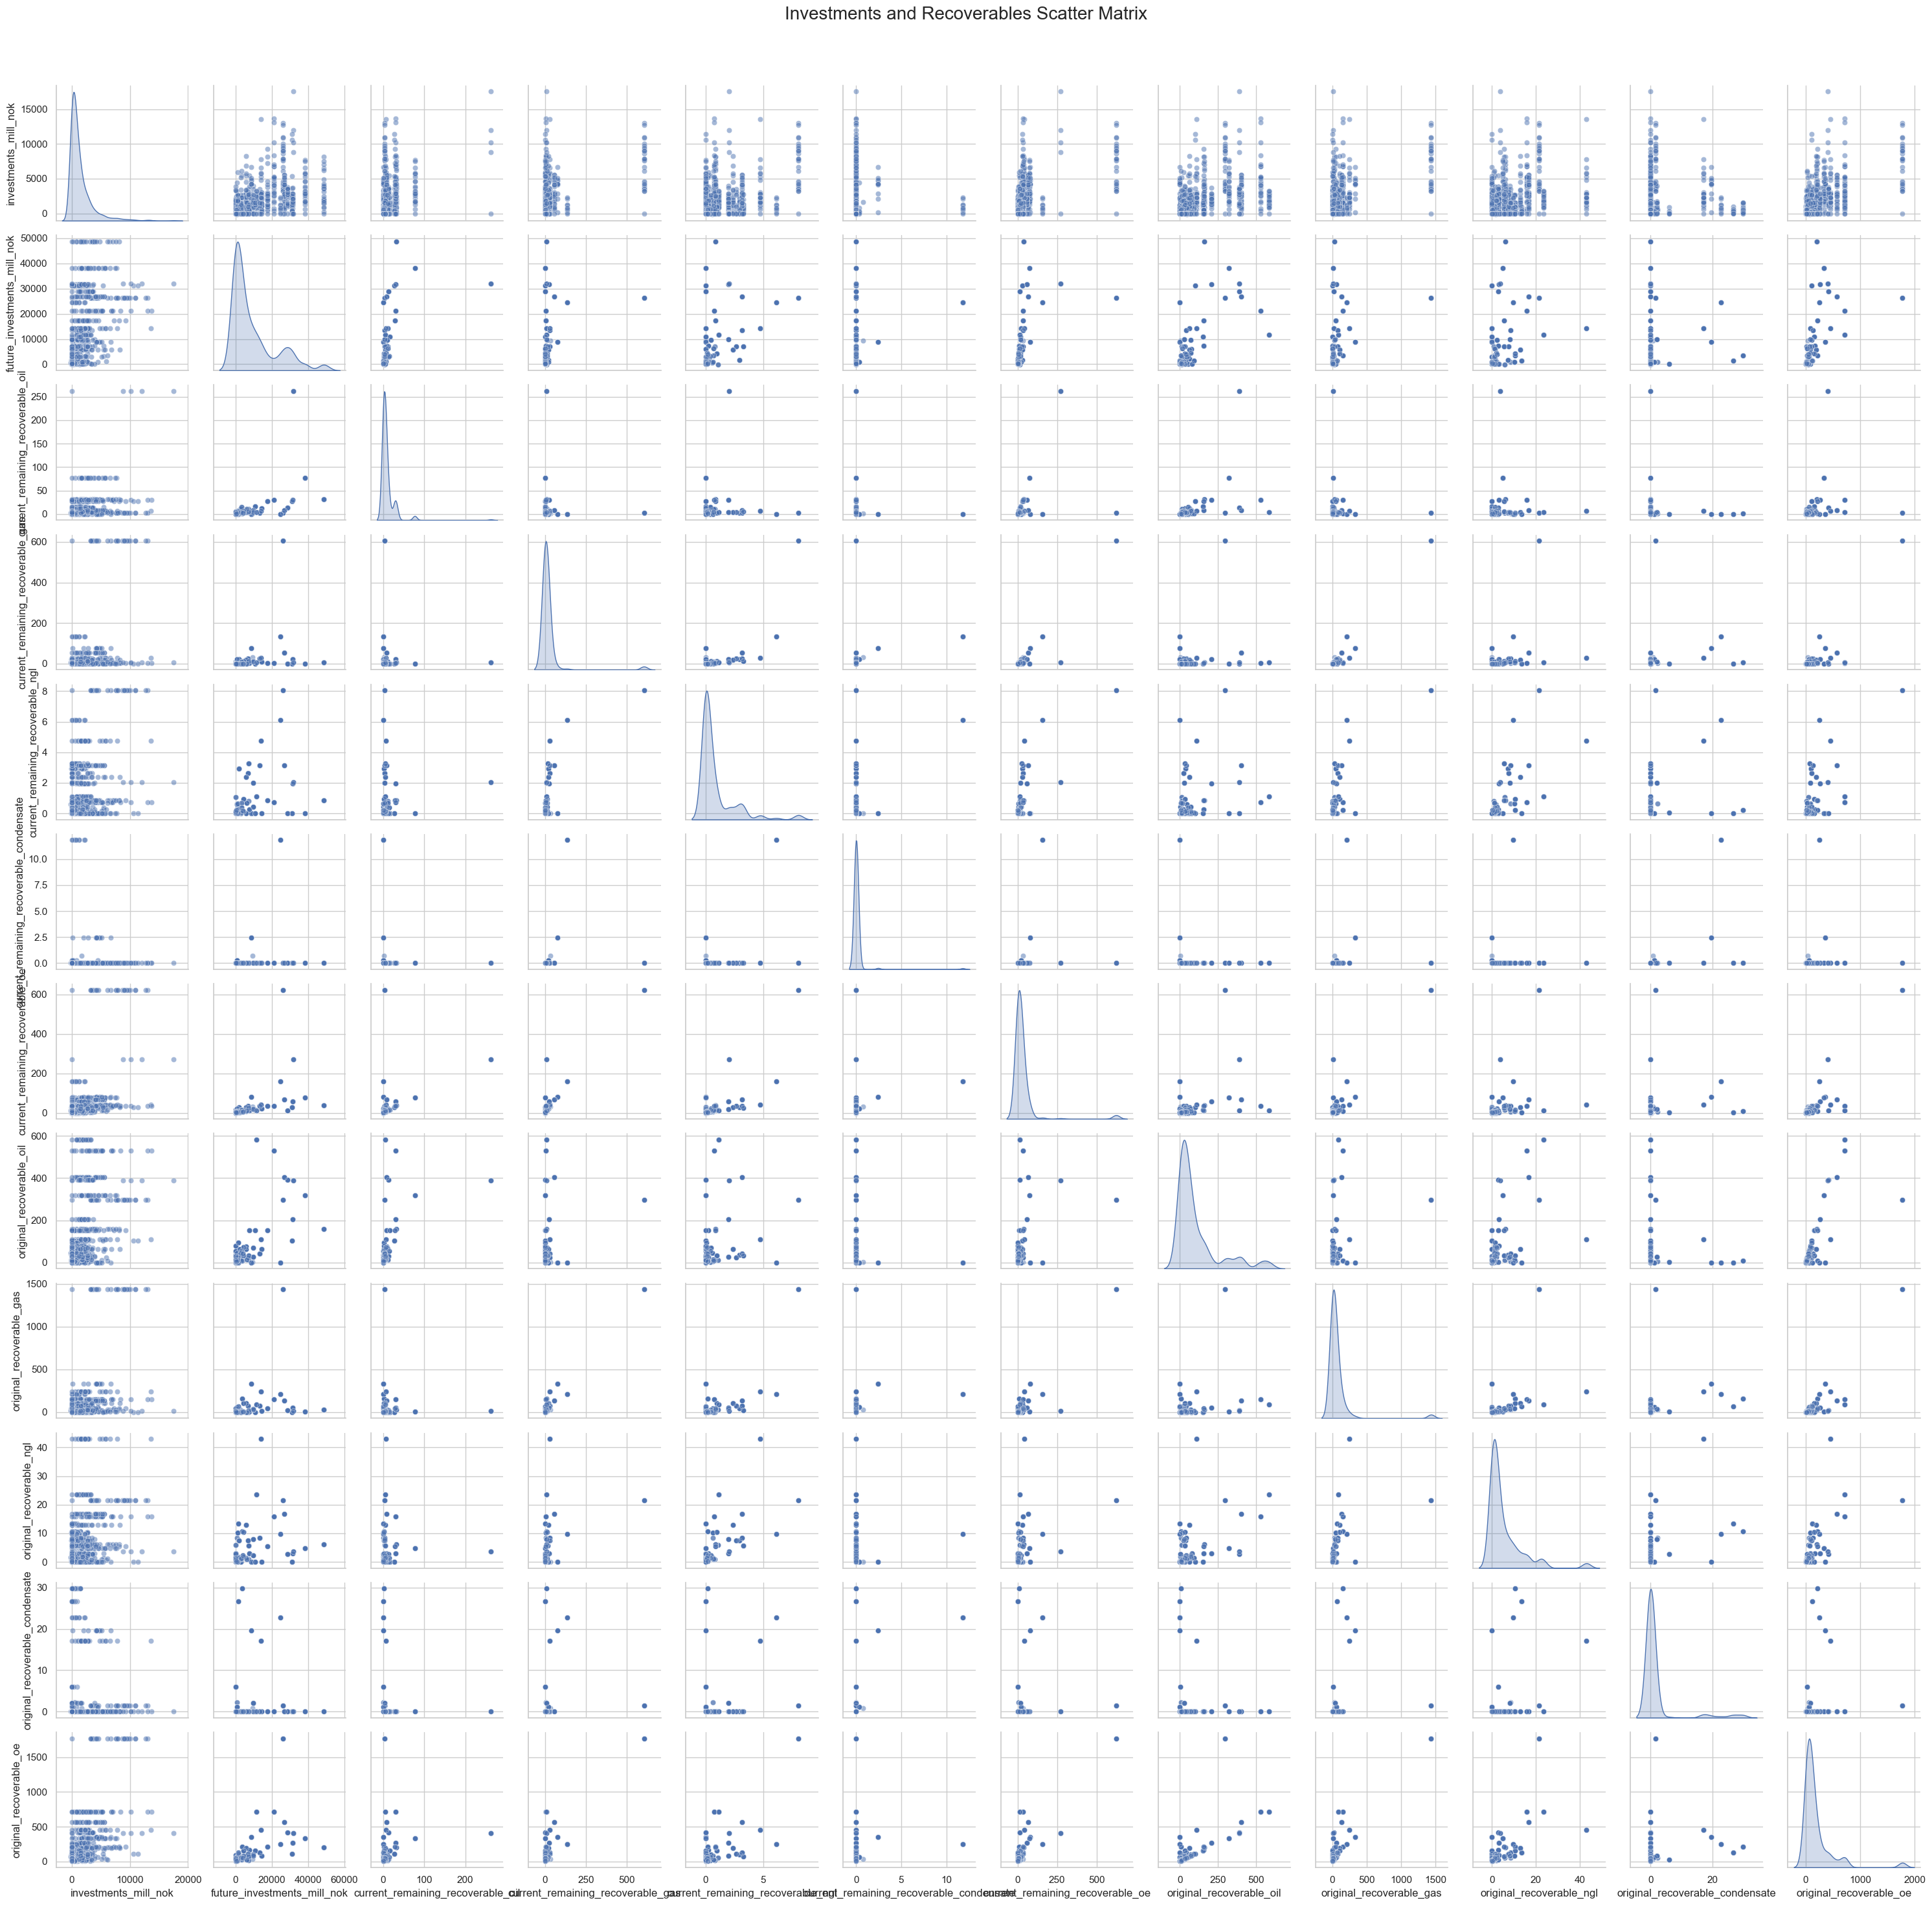

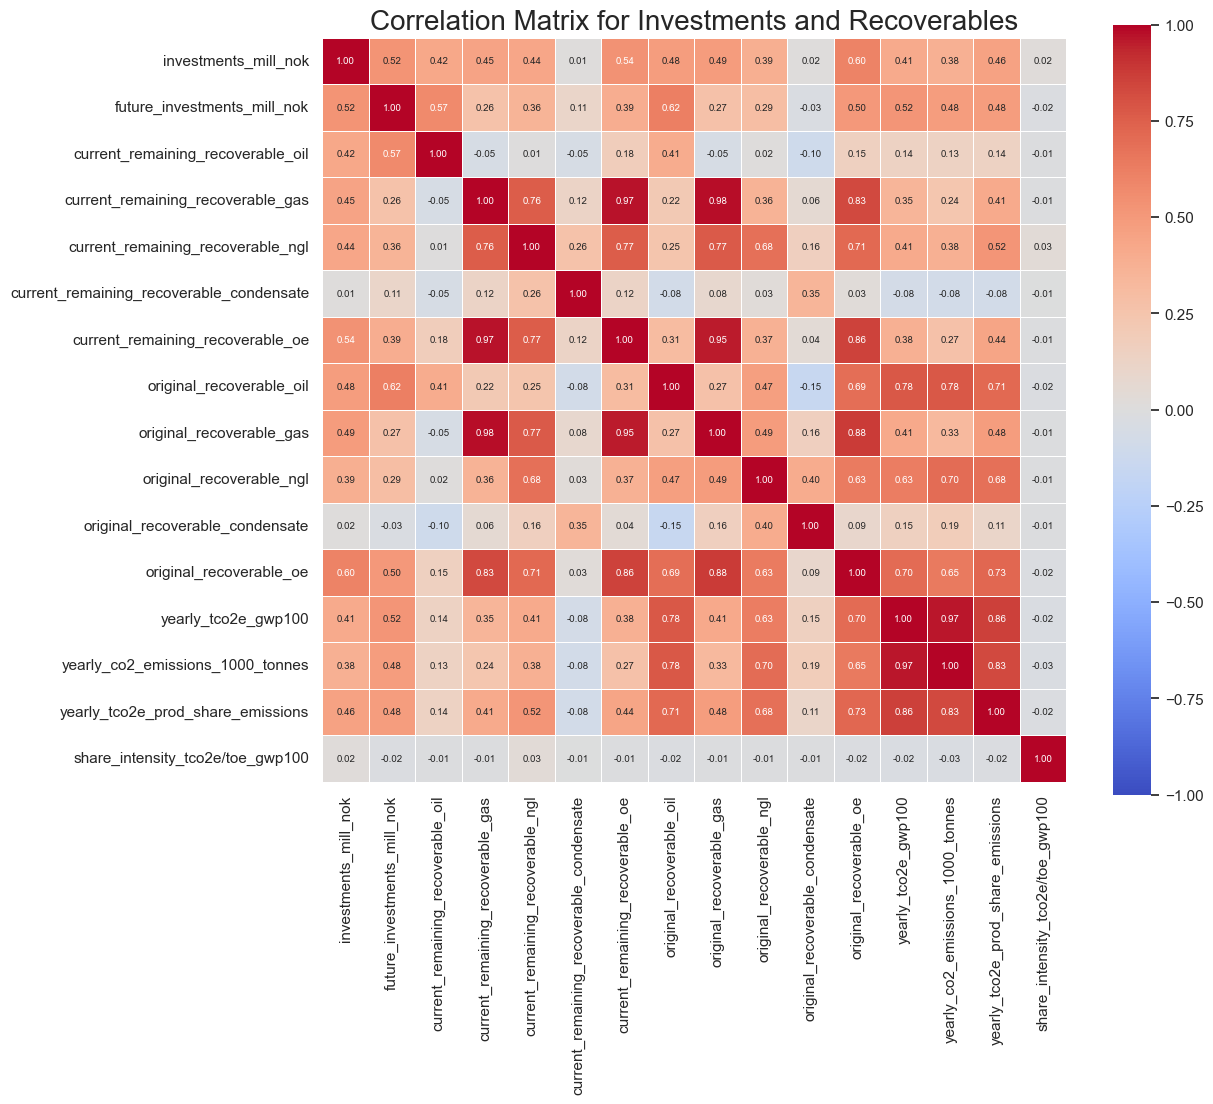

In [122]:
# Drop rows with NaN values in investment features
cleaned_investment_df = fields_prod_emissions_1997_2023_df[
    investment_features + emission_features
].dropna()


# Plot scatter matrix for investment features
plot_scatter_matrix(
    cleaned_investment_df,
    investment_features,
    "Investments and Recoverables Scatter Matrix",
)

# Compute the correlation matrix for investment features
investment_corr_matrix = cleaned_investment_df.corr()

# Plot the correlation matrix for investment features
plot_correlation_matrix(
    investment_corr_matrix,
    "Correlation Matrix for Investments and Recoverables",
)

## Calculate gas reserve ratio of total recoverable


In [125]:
# Calculate gas/oil ratio of reserve for each observation

fields_prod_emissions_1997_2023_dist_df["gas_reserve_ratio"] = (
    fields_prod_emissions_1997_2023_dist_df["original_recoverable_gas"] / 1000
) / fields_prod_emissions_1997_2023_dist_df["original_recoverable_oe"]

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_97842/3157631749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fields_prod_emissions_1997_2023_dist_df["gas_reserve_ratio"] = (


## Calculate oil reserve ratio of total recoverable


In [126]:
# Calculate oil reserve ratio


fields_prod_emissions_1997_2023_dist_df["oil_reserve_ratio"] = (
    fields_prod_emissions_1997_2023_dist_df["original_recoverable_oil"]
    / fields_prod_emissions_1997_2023_dist_df["original_recoverable_oe"]
)

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_97842/1937472219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fields_prod_emissions_1997_2023_dist_df["oil_reserve_ratio"] = (


In [127]:
# Calculate oil/gas reserve ration

fields_prod_emissions_1997_2023_dist_df["oil_gas_reserve_ratio"] = (
    fields_prod_emissions_1997_2023_dist_df["original_recoverable_oil"]
    / fields_prod_emissions_1997_2023_dist_df["original_recoverable_gas"]
)

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_97842/1770434458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fields_prod_emissions_1997_2023_dist_df["oil_gas_reserve_ratio"] = (


In [128]:
fields_prod_emissions_1997_2023_dist_df.head()

field  year  net_oil_prod_yearly_mill_sm3  \
0  statfjord nord  1997                       3.93531   
1      veslefrikk  1997                       3.47468   
2            frøy  1997                       1.39602   
3             hod  1997                       0.46766   
4             yme  1997                       1.97977   

   net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                       0.17288                       0.09230   
1                       0.13919                       0.08596   
2                       0.28878                       0.00000   
3                       0.09469                       0.02645   
4                       0.00000                       0.00000   

   net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                              0.00000                          4.20051   
1                              0.00000                          3.69981   
2                              0.01732                          1.70211   
3                              0.00000                          0.58879   
4                              0.00000                          1.97977   

   produced_water_yearly_mill_sm3  field_id  \
0                             0.0     43679   
1                             0.0     43618   
2                             0.0     43597   
3                             0.0     43485   
4                             0.0     43807   

   net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
0                             0.053898                             0.000405   
1                             0.052851                             0.008952   
2                             0.026260                             0.005287   
3                             0.003632                             0.001044   
4                             0.056455                             0.000000   

   net_ngl_prod_monthly_sm3_volatility  \
0                             0.000334   
1                             0.005461   
2                             0.000000   
3                             0.000238   
4                             0.000000   

   net_condensate_prod_monthly_sm3_volatility  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000942   
3                                    0.000000   
4                                    0.000000   

   net_oil_eq_prod_monthly_sm3_volatility  produced_water_in_field_volatility  \
0                                0.054005                                 0.0   
1                                0.053418                                 0.0   
2                                0.030860                                 0.0   
3                                0.004729                                 0.0   
4                                0.056455                                 0.0   

      status current_status  field_owner processing_field  field_in_emissions  \
0  Producing      Producing      21084.0        statfjord                True   
1  Producing      Shut down      21212.0       veslefrikk                True   
2  Producing      Shut down    3810636.0            frigg               False   
3  Producing      Producing      21052.0          valhall                True   
4  Producing      Producing    2786469.0              yme                True   

   facilities_lifetime_mean  facilities_lifetime_std  \
0                      27.5                15.000000   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                      30.0                 0.000000   
4                      20.0                 7.071068   

   facilities_water_depth_mean  facilities_water_depth_std  \
0                       241.75                   65.030121   
1                          NaN                         NaN   
2                       

In [132]:

data = fields_prod_emissions_1997_2023_dist_df.copy()

data_filtered = data.groupby('field').last().reset_index()

# Sort by biggest used %

# Calculate percentages
data_filtered['used_oe'] = np.round(data_filtered['original_recoverable_oe'] - data_filtered['current_remaining_recoverable_oe'], 0)
data_filtered['remaining_percentage'] = np.round((data_filtered['current_remaining_recoverable_oe'] / data_filtered['original_recoverable_oe']) * 100, 0)
data_filtered['used_percentage'] = np.round((data_filtered['used_oe'] / data_filtered['original_recoverable_oe']) * 100, 0)

data_filtered = data_filtered.sort_values(by='remaining_percentage', ascending=False)

# Prepare data for plotting
plot_data = pd.melt(data_filtered, id_vars=['field'], value_vars=['remaining_percentage', 'used_percentage'], 
                    var_name='Type', value_name='Percentage')

# Create a grouped bar chart
fig = go.Figure()

# Add bars for each type (used and remaining)
fig.add_trace(go.Bar(
    x=plot_data['field'][plot_data['Type'] == 'remaining_percentage'],
    y=plot_data['Percentage'][plot_data['Type'] == 'remaining_percentage'],
    name='Remaining OE',
    marker_color='rgba(0, 47, 95, 0.85)', 
    text=[f'{val}%' for val in plot_data['Percentage'][plot_data['Type'] == 'remaining_percentage']],
    textposition='inside'
))

fig.add_trace(go.Bar(
    x=plot_data['field'][plot_data['Type'] == 'used_percentage'],
    y=plot_data['Percentage'][plot_data['Type'] == 'used_percentage'],
    name='Used OE',
    marker_color='rgba(255, 99, 71, 0.7)',  # semi-transparent red
    text=[f'{val}%' for val in plot_data['Percentage'][plot_data['Type'] == 'used_percentage']],
    textposition='inside'
))

# Update layout for better visualization
fig.update_layout(
    title="Percentage of Original Recoverable Oil Equivalent Used and Remaining by Field",
    xaxis_title="Field",
    yaxis_title="Percentage of Recoverable Oil Equivalent (OE)",
    barmode='stack',  
    legend_title="Type",
    yaxis=dict(tickformat=".2f%", range=[0, 100])  # Format y-axis as percentage and set range from 0 to 100
)

# Show the figure
fig.show()

In [133]:
# Filter to get only one entry per field (taking the last entry for simplicity)
data_filtered = data.groupby('field').last().reset_index()

# Calculate used OE
data_filtered['used_oe'] = np.round(data_filtered['original_recoverable_oe'] - data_filtered['current_remaining_recoverable_oe'], 0)

# Sort by biggest used OE
data_filtered = data_filtered.sort_values(by='original_recoverable_oe', ascending=False)

# Prepare data for plotting
plot_data = pd.melt(data_filtered, id_vars=['field'], value_vars=['current_remaining_recoverable_oe', 'used_oe'], 
                    var_name='Type', value_name='OE')

# Create a grouped bar chart
fig = go.Figure()

# Add bars for each type (used and remaining)
fig.add_trace(go.Bar(
    x=plot_data['field'][plot_data['Type'] == 'current_remaining_recoverable_oe'],
    y=plot_data['OE'][plot_data['Type'] == 'current_remaining_recoverable_oe'],
    name='Remaining OE',
    marker_color='rgba(0, 47, 95, 0.85)',  # McKinsey dark blue
    text=[f'{val:.0f}' for val in plot_data['OE'][plot_data['Type'] == 'current_remaining_recoverable_oe']],
    textposition='inside'
))

fig.add_trace(go.Bar(
    x=plot_data['field'][plot_data['Type'] == 'used_oe'],
    y=plot_data['OE'][plot_data['Type'] == 'used_oe'],
    name='Used OE',
    marker_color='rgba(255, 99, 71, 0.7)',  # semi-transparent red
    text=[f'{val:.0f}' for val in plot_data['OE'][plot_data['Type'] == 'used_oe']],
    textposition='inside'
))

# Update layout for better visualization
fig.update_layout(
    title="Original Recoverable Oil Equivalent Used and Remaining by Field",
    xaxis_title="Field",
    yaxis_title="Million SM3 Oil Equivalent (OE)",
    barmode='stack',  # Use 'group' for grouped bars
    legend_title="Type"
)

# Show the figure
fig.show()

In [142]:
# Get the unique field ids

# Extraxt 10 bigges by original recoverable oe
fields = data.groupby("field").last().sort_values(
	by="original_recoverable_oe", ascending=False
).head(10).index


# Create a plot for each field
fig = go.Figure()

for field in fields:
    field_data = data[data['field'] == field]
    max_production = field_data['net_oil_eq_prod_yearly_mill_sm3'].max()
    field_data['production_percentage'] = (field_data['net_oil_eq_prod_yearly_mill_sm3'] / max_production) * 100
    
    fig.add_trace(go.Scatter(
        x=field_data['year'],
        y=field_data['production_percentage'],
        mode='lines+markers',
        name=f'{field} OE Production',
        text=[f'{val:.2f}%' for val in field_data['production_percentage']],
        textposition='top center'
    ))

# Update layout for better visualization
fig.update_layout(
    title="Oil Equivalent Production Over Time (as % of Maximum Production)",
    xaxis_title="Year",
    yaxis_title="Production (% of Maximum)",
    showlegend=True
)

# Show the figure
fig.show()

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_97842/2564674264.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_97842/2564674264.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_97842/2564674264.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

### Data Export


In [ ]:
# Exporting the dataframe to a csv file unless the file exists, check if the export is successful

filename_path = "../../data/output/emissions_and_production/cleaned/fields_prod_emissions_intensities_share_1997_2023.csv"

if not os.path.exists(filename_path):
    fields_prod_emissions_1997_2023_dist_df.to_csv(filename_path, index=False)
    print("Saved file")
else:
    print("File already exists")